<a href="https://colab.research.google.com/github/ChewPeng/R/blob/main/MST3074_Chapter_7_April23semester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 7 Reinforcement Learning

Reference: https://www.datasciencecentral.com/profiles/blogs/reinforcement-learning-q-learning-implementation-using-r-part-2

1. Import libraries

In [ ]:
install.packages('plot.matrix')
install.packages('RColorBrewer')
library(plot.matrix)
library(RColorBrewer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



2. Matrix Plot Function

In [ ]:
plot_matrix <- function(mat_pot, digits_arg){
 digits_arg <- ifelse(missing(digits_arg),0,digits_arg)
 plot(mat_pot, cex = 1.2, fmt.cell=paste0('%.',digits_arg,'f'),
 col=brewer.pal(3,"Blues"), breaks=c(-500, 0, 0, 500),
 xlab="States", ylab = "States",main = "")
}

3. Define Environment


3.1 States & Actions

Let's consider there are 5 states i.e. 1,2,3,4,5 and possible actions as left, right, up and down.

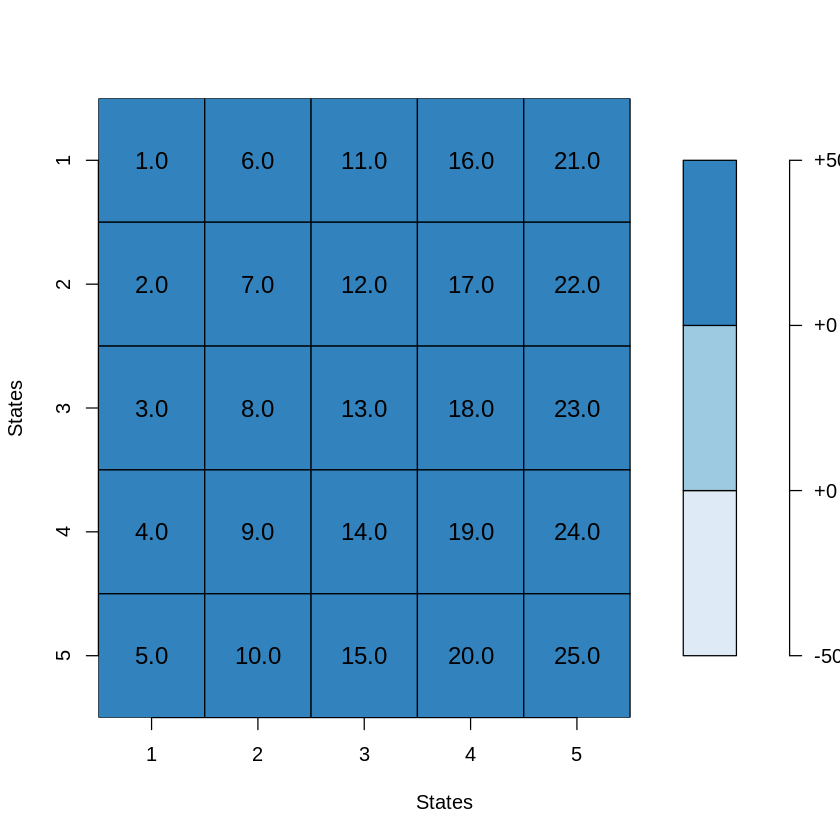

In [ ]:
states <- seq(1, 5, by = 1)
state_seq <- cbind(merge(states,states), state =
 seq(1,length(states)*length(states)))

state_mat <- matrix(state_seq$state, nrow = length(states), ncol= length(states))
plot_matrix(state_mat,1) ## matrix, digits

3.2 Rewards & Goal

Once we have our states and actions are defined, next, we need is the reward for each of the states. This can be negative or positive or any other set of values (numeric) based on the problem you are solving. Here, we have randomly given rewards to various states and creating a matrix.

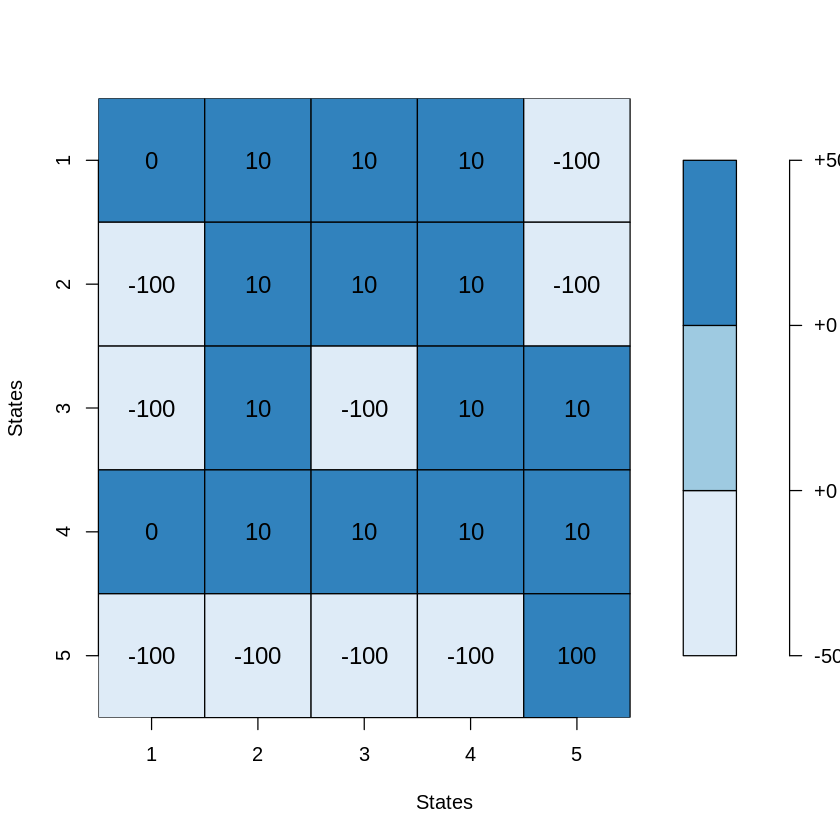

In [ ]:
rewards <- c(0,-100,-100,0,-100,
                    10,10,10,10,-100,
                    10,10,-100,10,-100,
                    10,10,10,10,-100,
                   -100,-100,10,10,100 )

rewards_mat <- matrix(rewards, nrow = length(states), ncol= length(states))

plot_matrix(rewards_mat)

If we compare the rewards matric with the state matrix, the state numbers 2, 3, 5, 10, 13, 15, 20, 21, and 22 have rewards -100 points which means we do not want our Agent to go there or those are dangerous areas. And State 25 has reward 100 points so this would be our Goal state.

In [ ]:
goal <- which(rewards==max(rewards), arr.ind=TRUE)

4. Q-Matrix

Further, we need to create a Q matrix with the same dimensions as the states matrix and initialize it with 0 values.

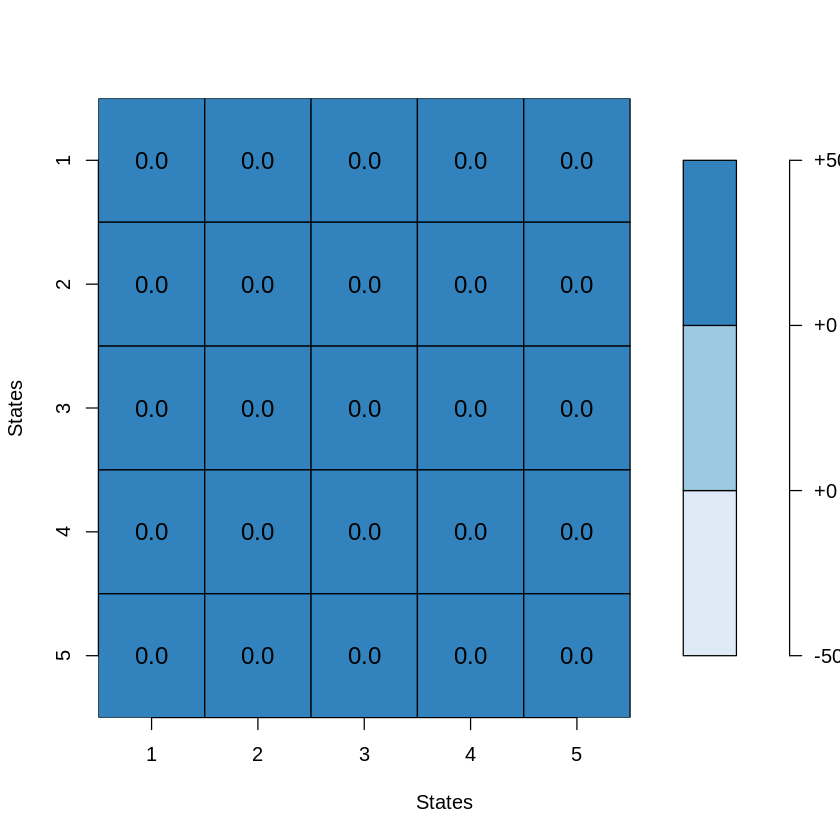

In [ ]:
## Initialize Q-Matrix
Q <- matrix(0, nrow = length(states), ncol= length(states))
plot_matrix(Q,1)

4.1 The Next States

Suppose Agent is at State 3, then based on actions (left, right, up, down) then next possible states will be states 2, 4, and 8. So here we have created a function that would let the Agent know what all are the possible next steps. Also, this will be required when we are calculating Q values using Bellman's equation.

In [ ]:
getNextStates <- function(cs) {
 stalen <- length(states);
 NS <- stalen*stalen

 aa <- state_seq[state_seq$state == cs,]

 if (aa$x == max(states)) {

 ns <- c(cs - 1,

 cs - stalen,

 cs + stalen);

 } else if (aa$x == min(states)) {

 ns <- c(cs + 1,

 cs - stalen,

 cs + stalen);

 } else {

 ns <- c(cs + 1,

 cs - 1,

 cs - stalen,

 cs + stalen);

 }

 nss <- sort(ns[ns > 0 & ns <= NS]);

 return(nss);

}


The above function will return all the possible states that Agent can move based on its current states. Refer the function call example below:

In [ ]:
getNextStates(3)

[1] 2 4 8

In [ ]:
getNextStates(7)

[1]  2  6  8 12

5. Episodes

The episode is an iteration that starts with Agent's initial state to terminal state(Goal). So an agent will start from a random state, learn while moving to various states, collect rewards, and update Q value at each step.


Start Episode:  1
	Current state:  15

	Step no.:  1
		Current State:  15
		Reward CS:  -100
		Possible next states:  10 14 20
		Next state:  14
		New Q-Value:  -80

	Step no.:  2
		Current State:  14
		Reward CS:  10
		Possible next states:  9 13 15 19
		Next state:  13
		New Q-Value:  8

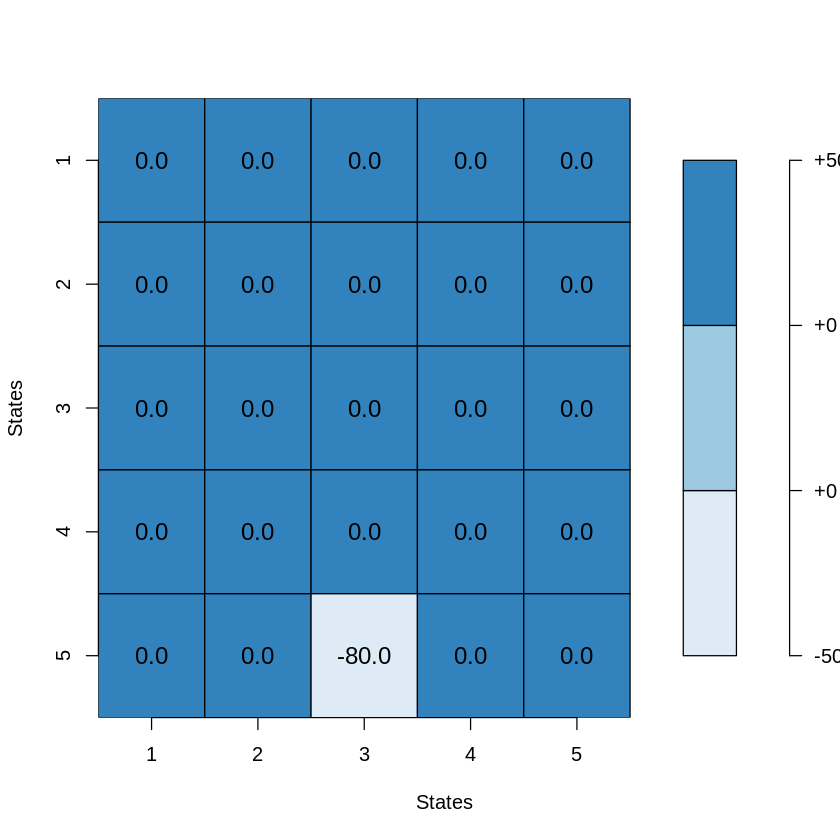



	Step no.:  3
		Current State:  13
		Reward CS:  -100
		Possible next states:  8 12 14 18
		Next state:  12
		New Q-Value:  -80

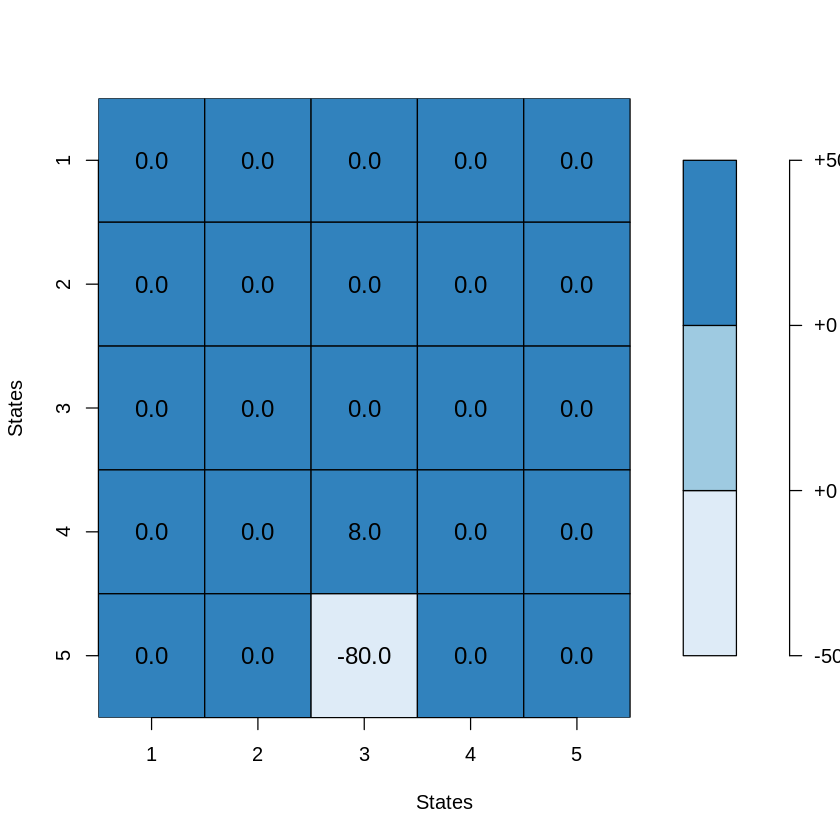



	Step no.:  4
		Current State:  12
		Reward CS:  10
		Possible next states:  7 11 13 17
		Next state:  13
		New Q-Value:  12.5

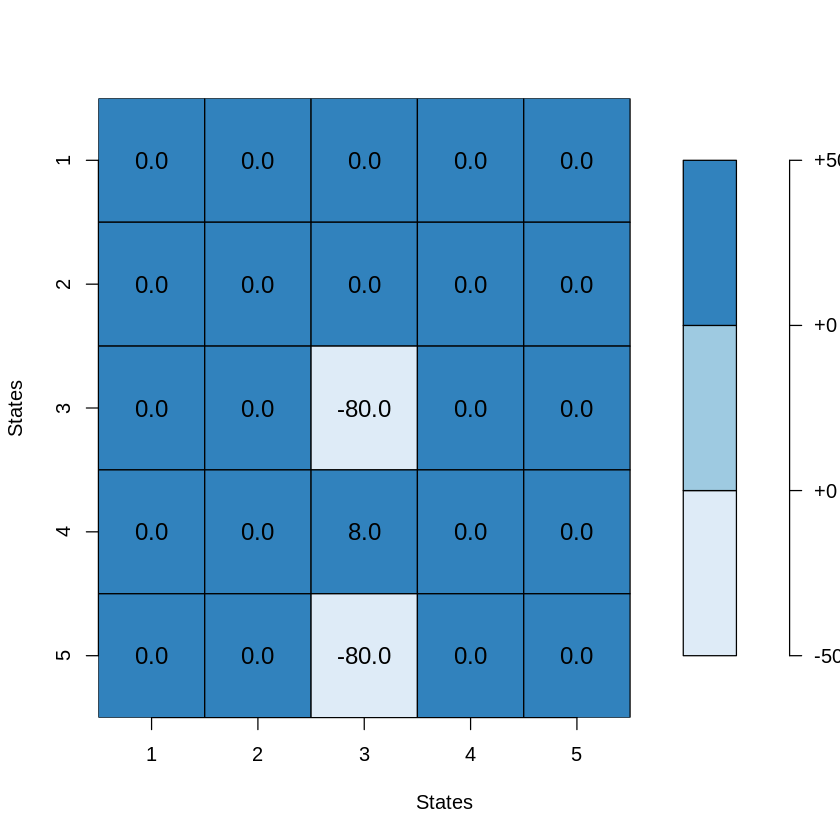



	Step no.:  5
		Current State:  13
		Reward CS:  -100
		Possible next states:  8 12 14 18
		Next state:  14
		New Q-Value:  -96

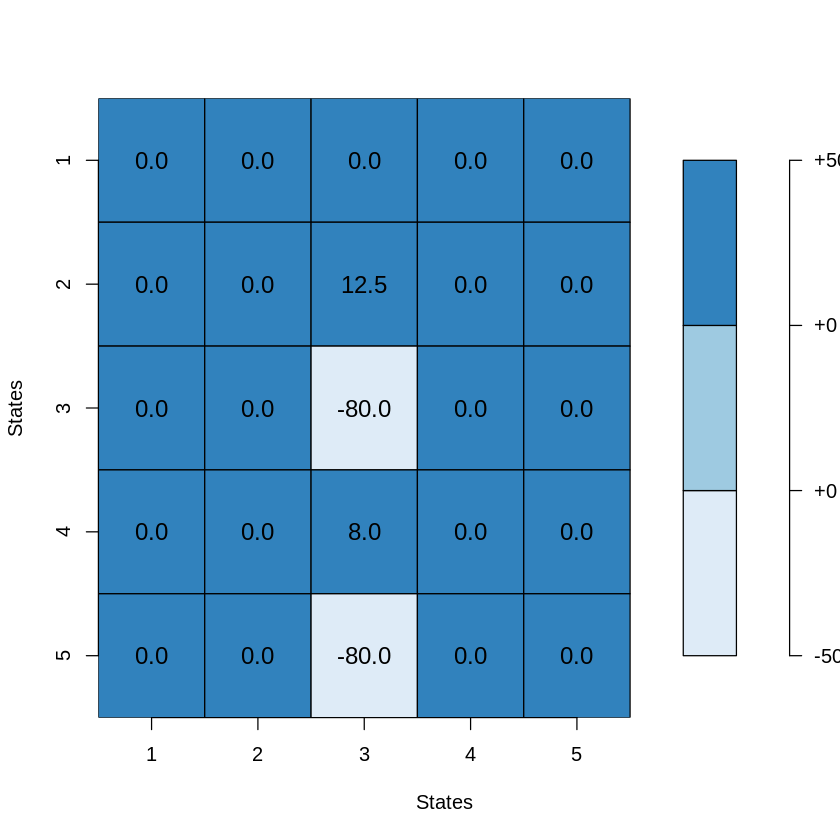



	Step no.:  6
		Current State:  14
		Reward CS:  10
		Possible next states:  9 13 15 19
		Next state:  15
		New Q-Value:  14.1

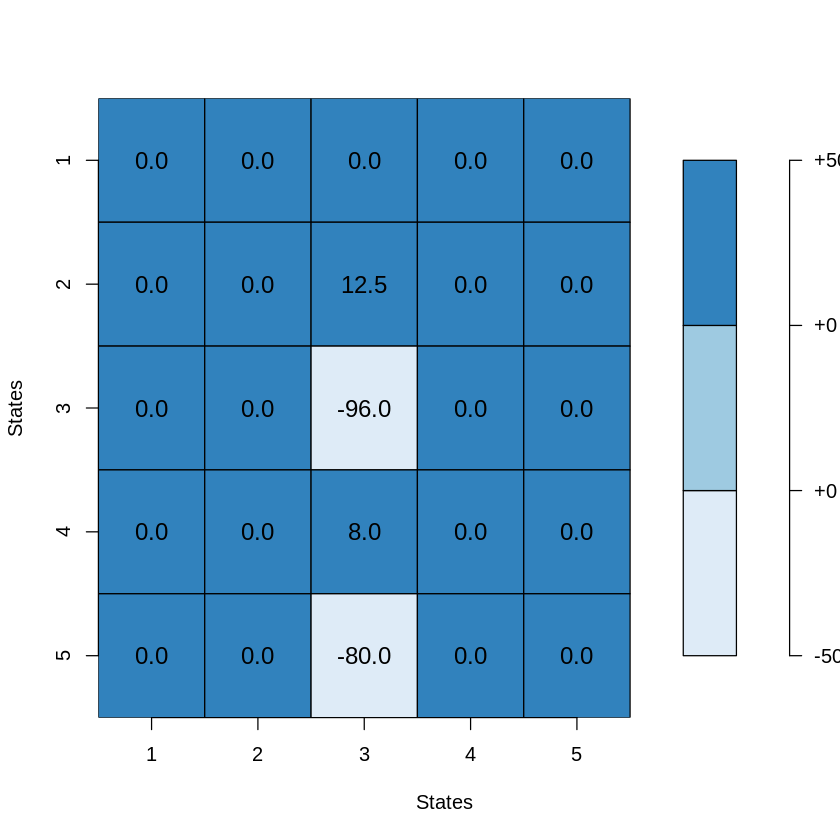



	Step no.:  7
		Current State:  15
		Reward CS:  -100
		Possible next states:  10 14 20
		Next state:  20
		New Q-Value:  -96

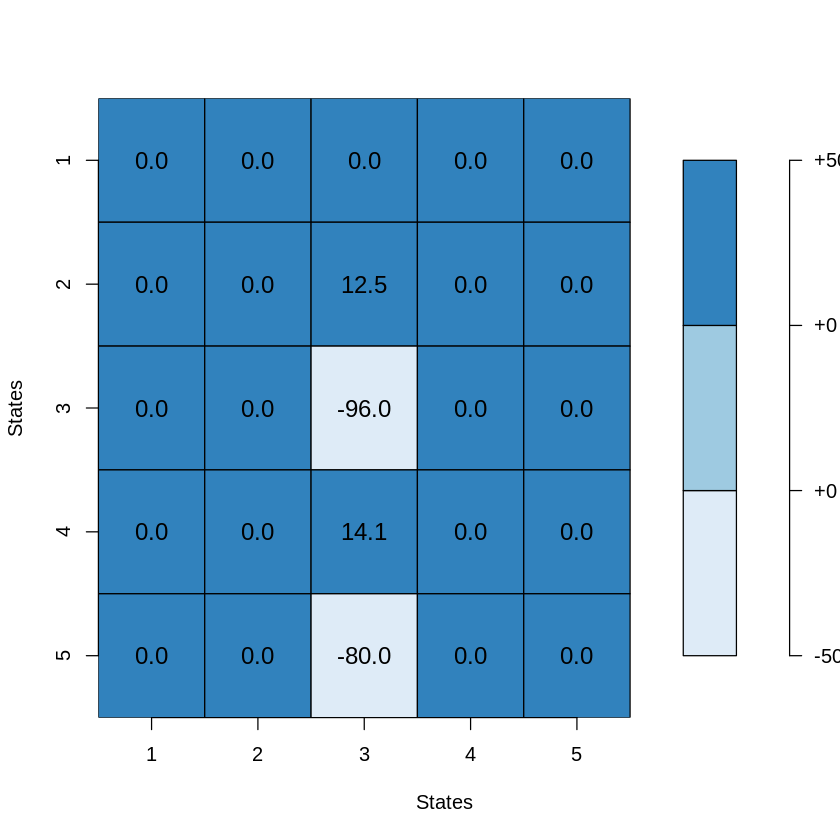



	Step no.:  8
		Current State:  20
		Reward CS:  -100
		Possible next states:  15 19 25
		Next state:  15
		New Q-Value:  -72.1

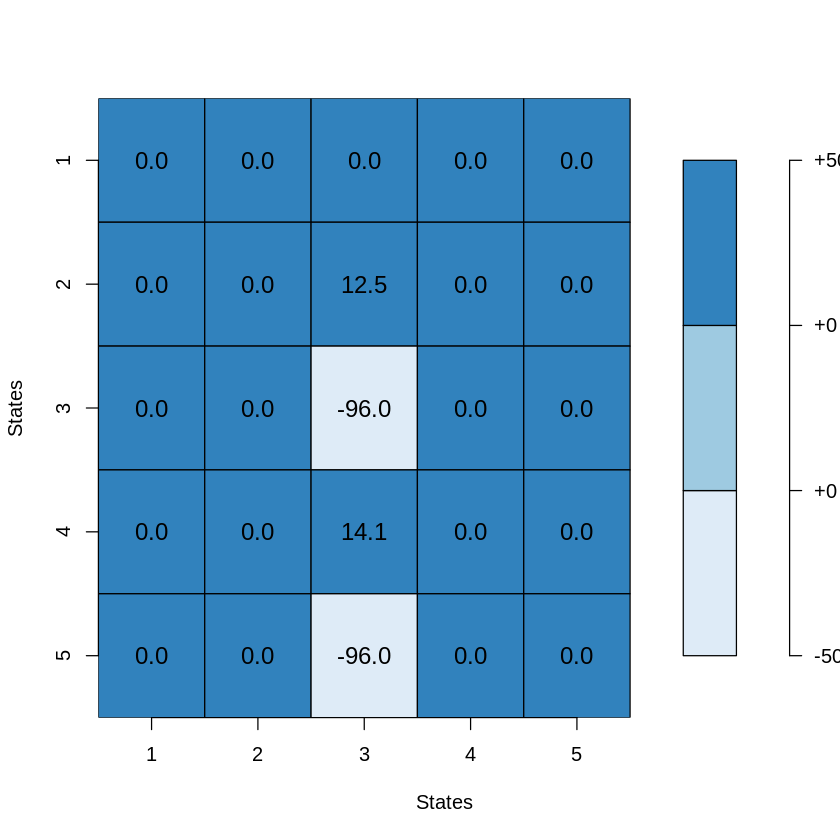



	Step no.:  9
		Current State:  15
		Reward CS:  -100
		Possible next states:  10 14 20
		Next state:  20
		New Q-Value:  -99.2

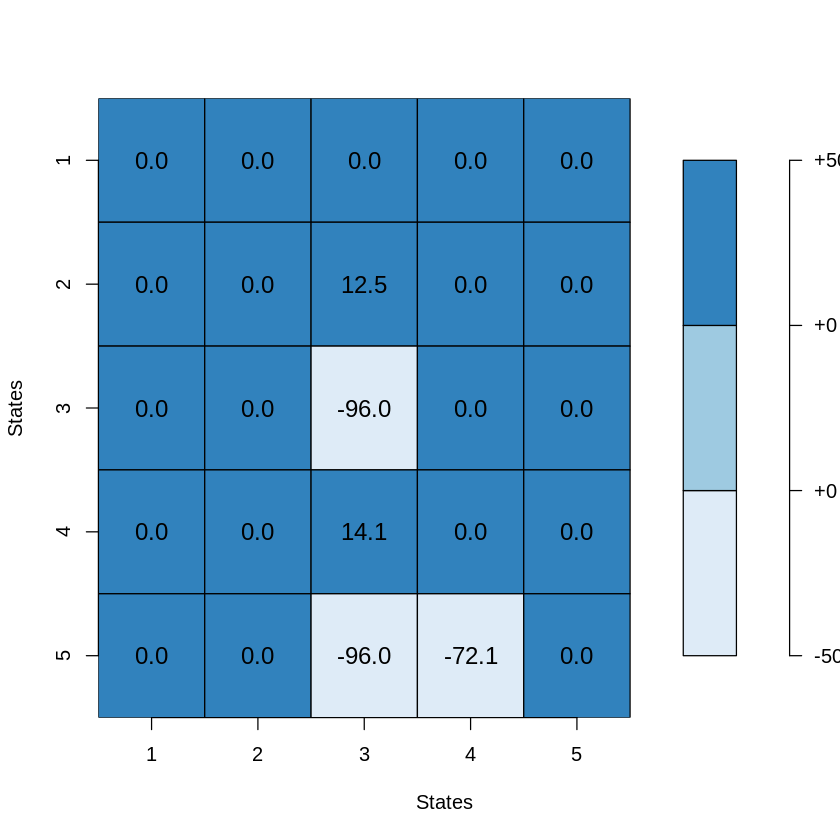



	Step no.:  10
		Current State:  20
		Reward CS:  -100
		Possible next states:  15 19 25
		Next state:  15
		New Q-Value:  -86.5

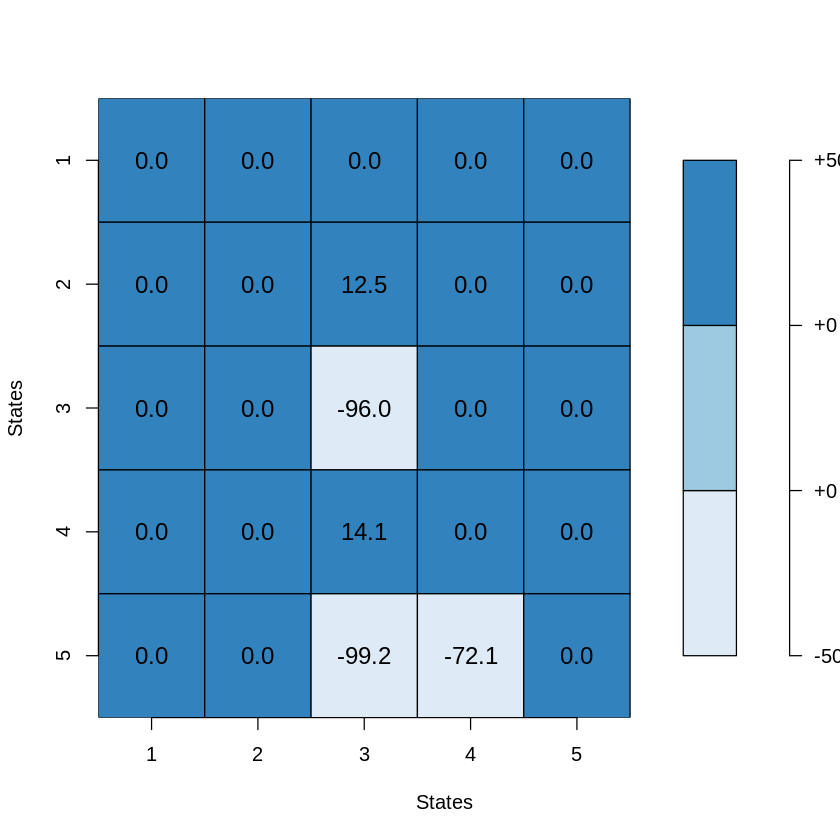



	Step no.:  11
		Current State:  15
		Reward CS:  -100
		Possible next states:  10 14 20
		Next state:  20
		New Q-Value:  -99.8

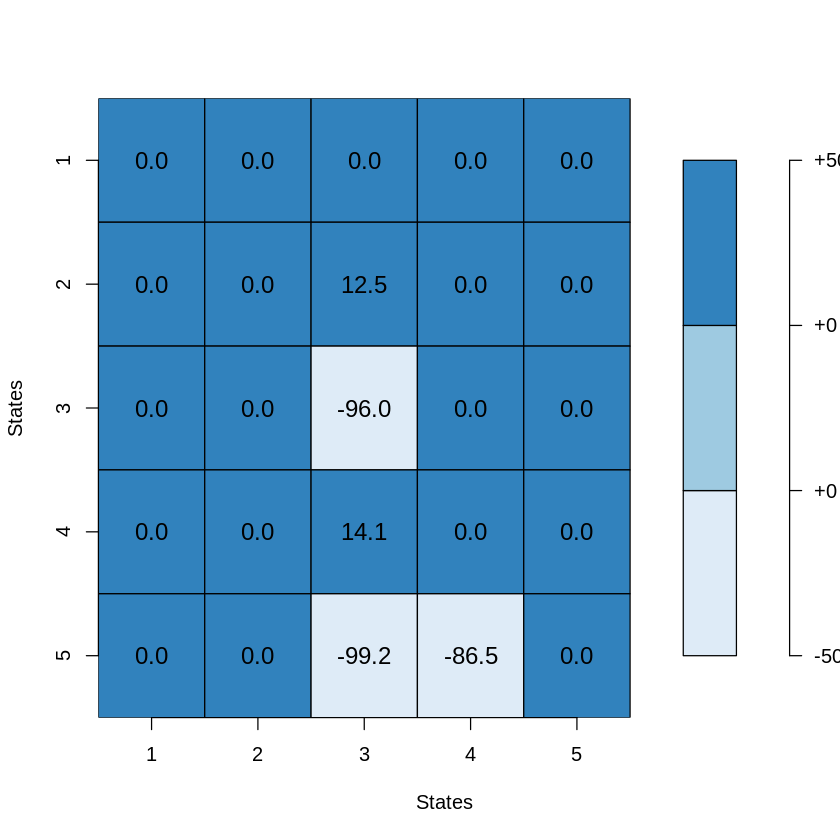



	Step no.:  12
		Current State:  20
		Reward CS:  -100
		Possible next states:  15 19 25
		Next state:  25
		New Q-Value:  -97.3

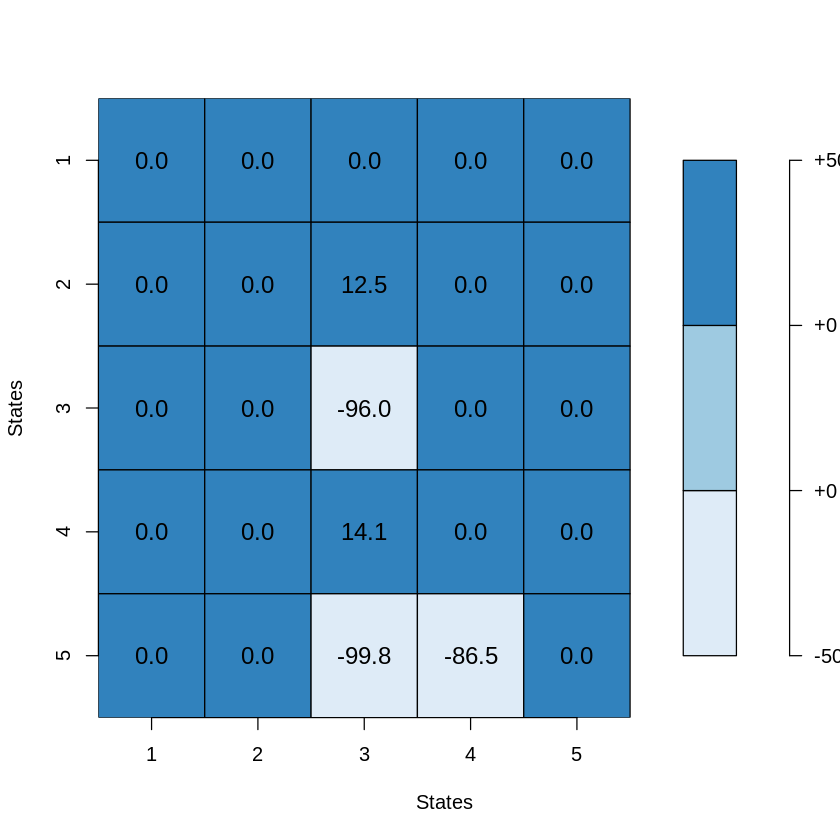



	Step no.:  13
		Current State:  25
		Reward CS:  100
		Possible next states:  20 24
		Next state:  20
		New Q-Value:  80

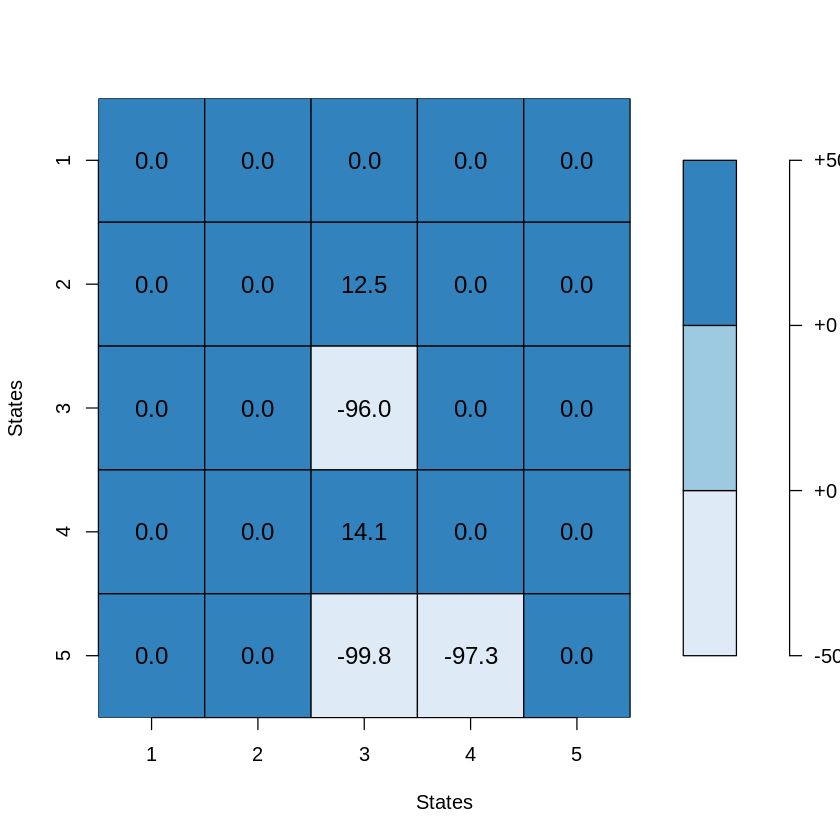


End Episode:  1
Start Episode:  2
	Current state:  24

	Step no.:  1
		Current State:  24
		Reward CS:  10
		Possible next states:  19 23 25
		Next state:  19
		New Q-Value:  15.9

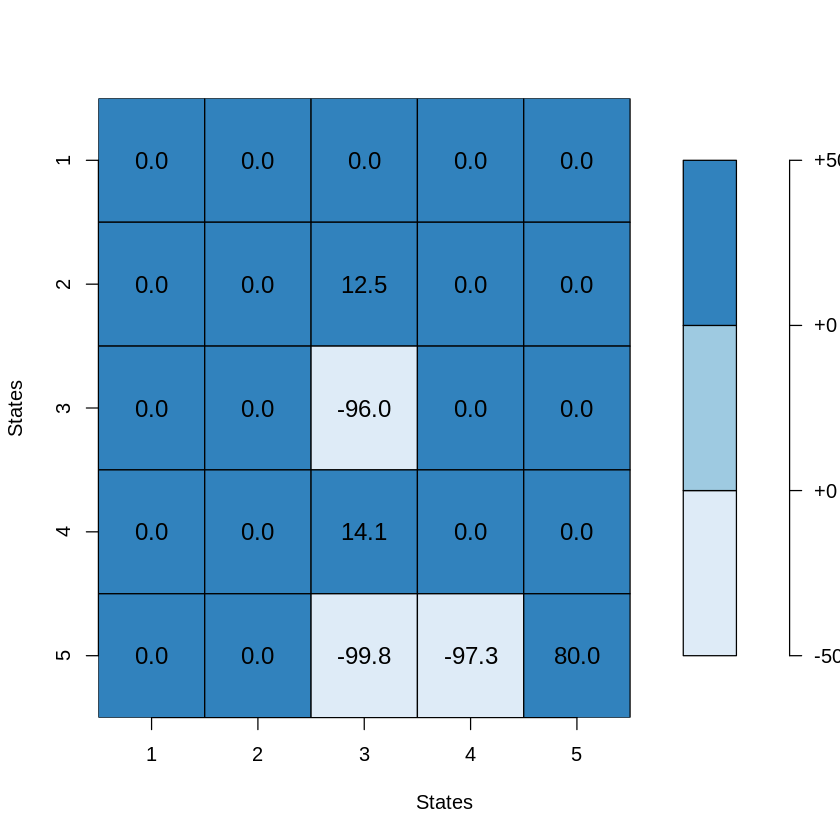



	Step no.:  2
		Current State:  19
		Reward CS:  10
		Possible next states:  14 18 20 24
		Next state:  20
		New Q-Value:  52.8

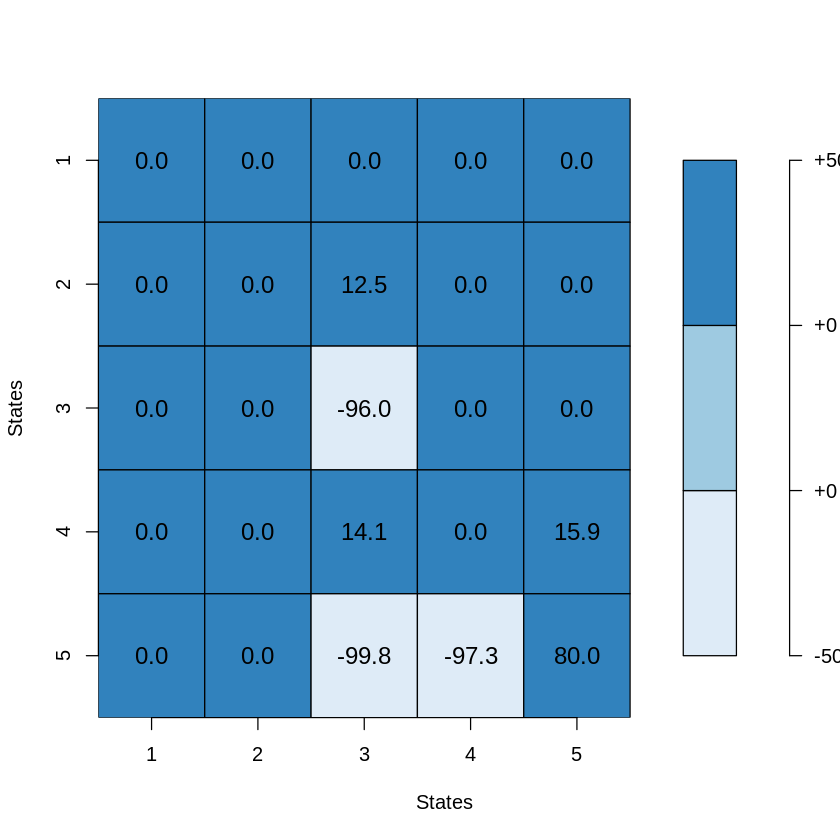



	Step no.:  3
		Current State:  20
		Reward CS:  -100
		Possible next states:  15 19 25
		Next state:  15
		New Q-Value:  -91.6

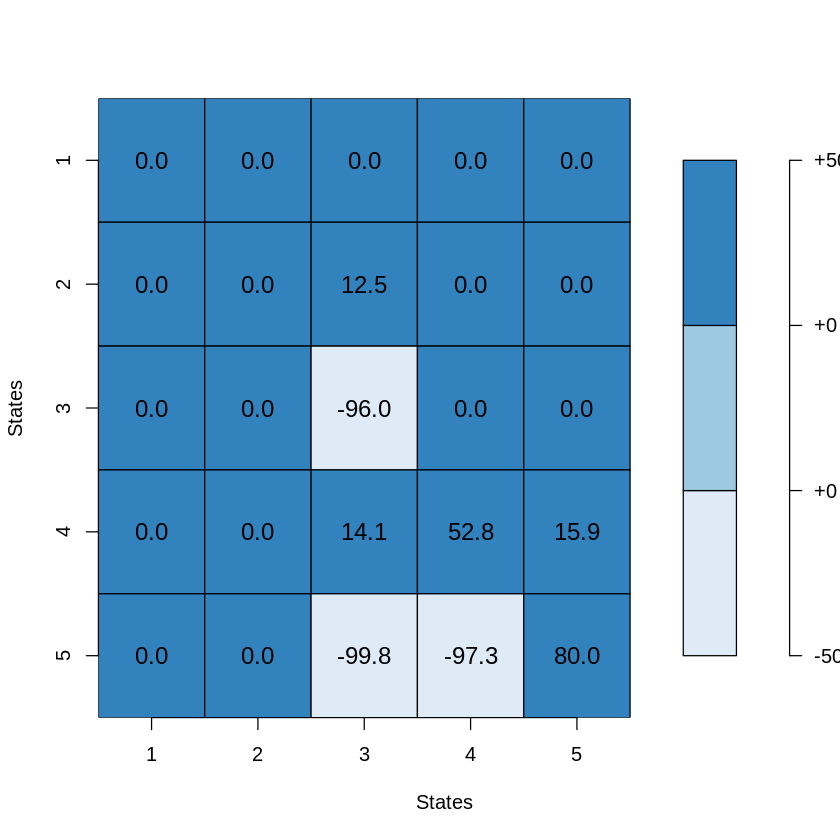



	Step no.:  4
		Current State:  15
		Reward CS:  -100
		Possible next states:  10 14 20
		Next state:  14
		New Q-Value:  -70.4

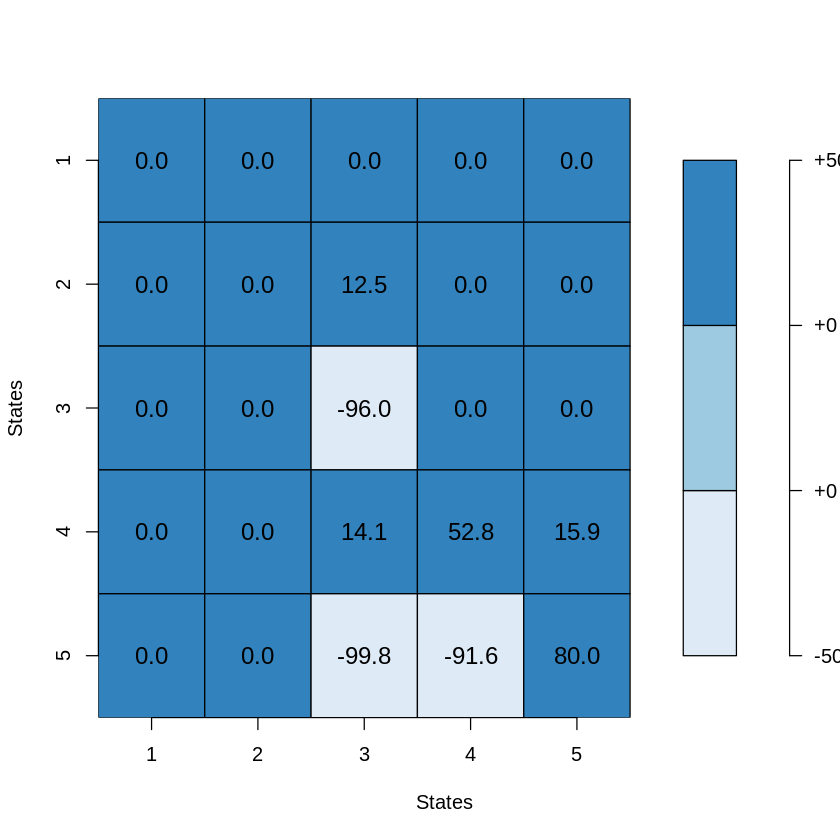



	Step no.:  5
		Current State:  14
		Reward CS:  10
		Possible next states:  9 13 15 19
		Next state:  15
		New Q-Value:  18.7

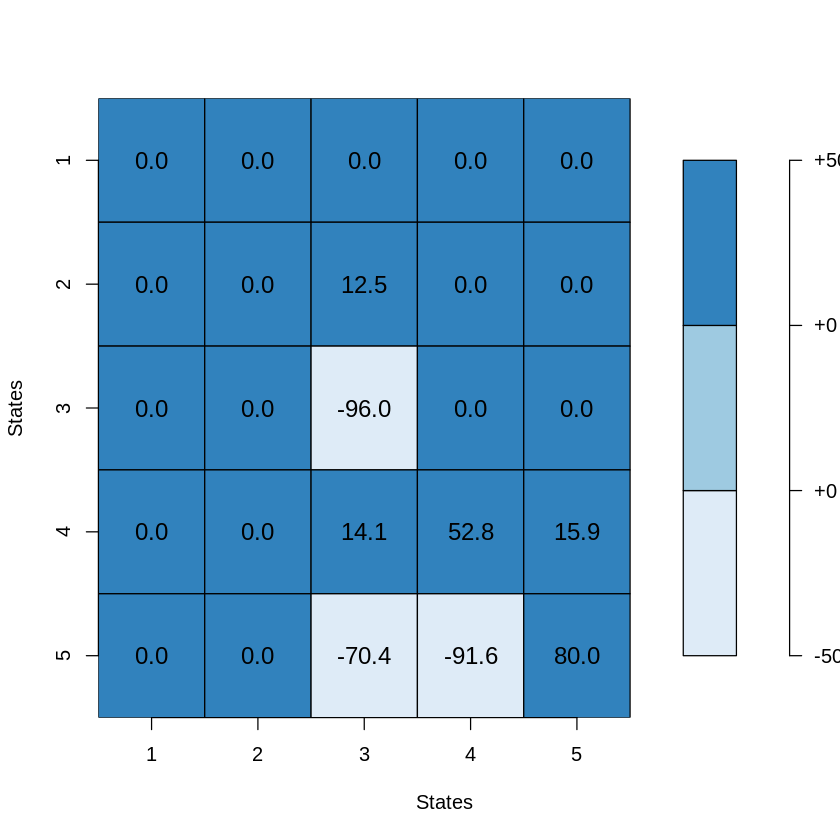



	Step no.:  6
		Current State:  15
		Reward CS:  -100
		Possible next states:  10 14 20
		Next state:  20
		New Q-Value:  -49.3

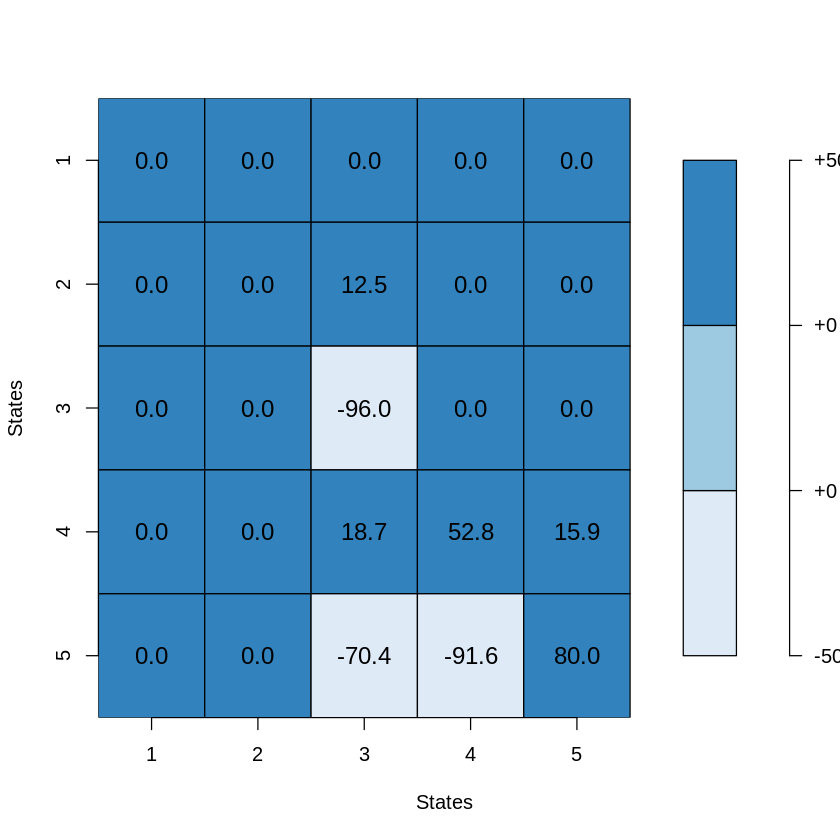



	Step no.:  7
		Current State:  20
		Reward CS:  -100
		Possible next states:  15 19 25
		Next state:  25
		New Q-Value:  -89.4

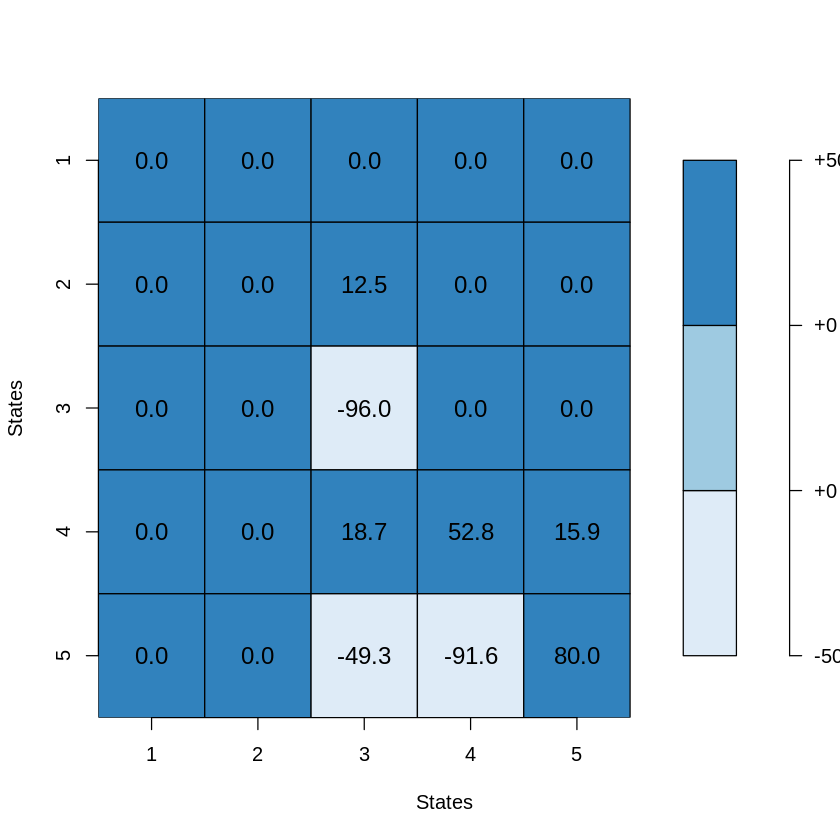



	Step no.:  8
		Current State:  25
		Reward CS:  100
		Possible next states:  20 24
		Next state:  20
		New Q-Value:  140.8

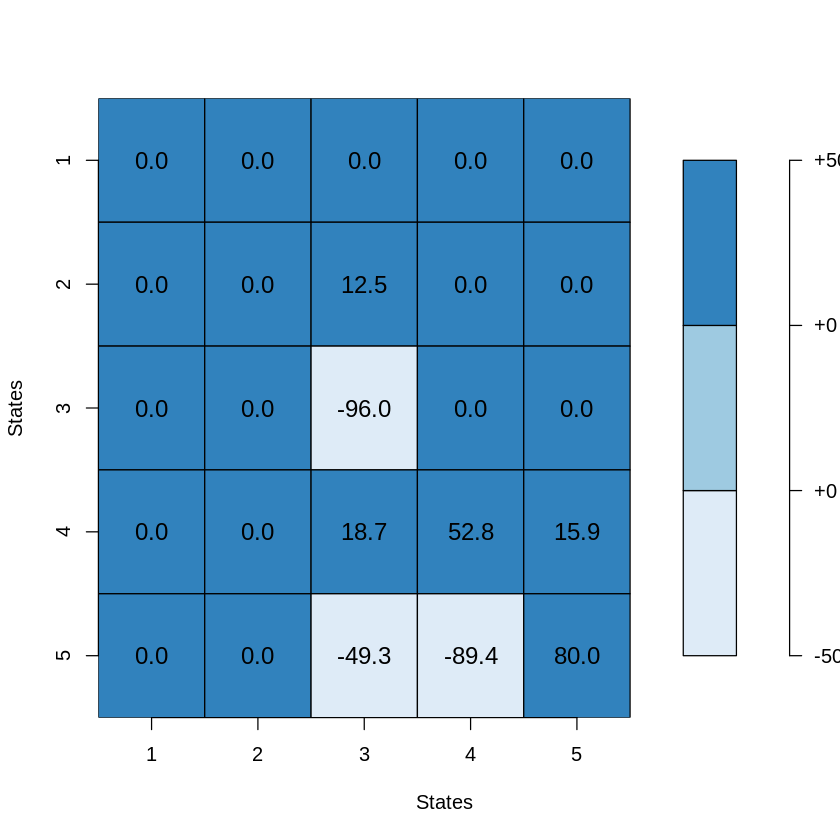


End Episode:  2
Start Episode:  3
	Current state:  14

	Step no.:  1
		Current State:  14
		Reward CS:  10
		Possible next states:  9 13 15 19
		Next state:  9
		New Q-Value:  22.2

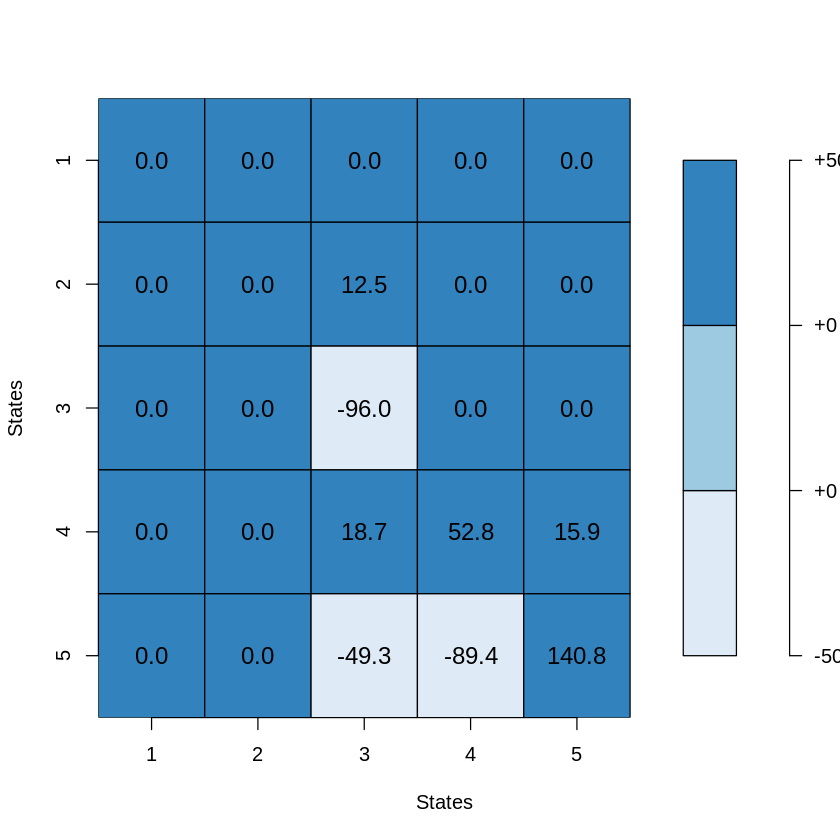



	Step no.:  2
		Current State:  9
		Reward CS:  10
		Possible next states:  4 8 10 14
		Next state:  4
		New Q-Value:  8

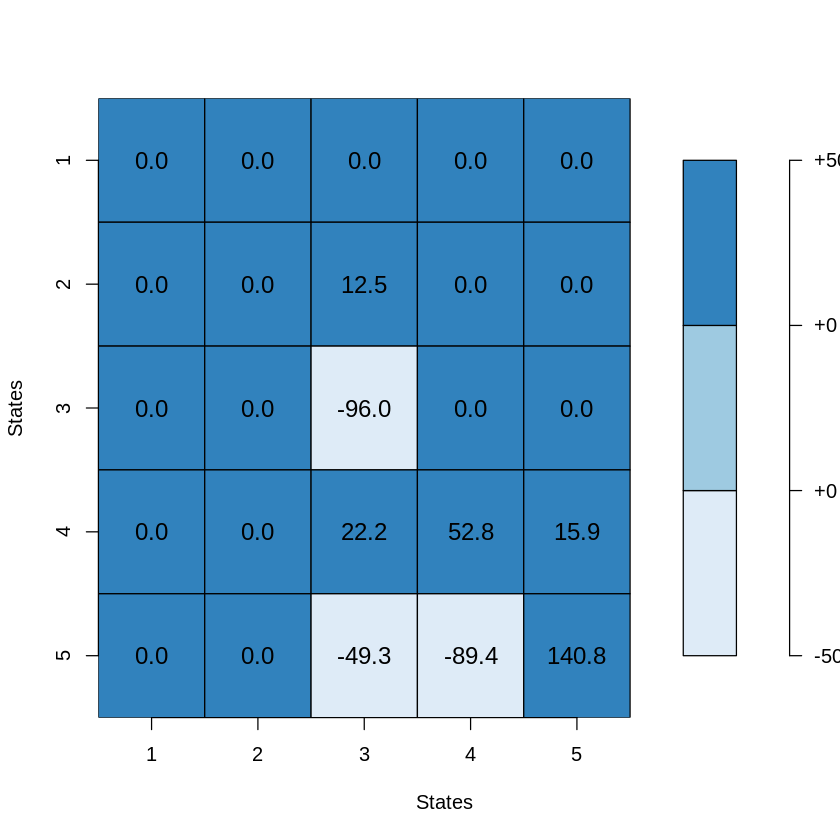



	Step no.:  3
		Current State:  4
		Reward CS:  0
		Possible next states:  3 5 9
		Next state:  9
		New Q-Value:  12.4

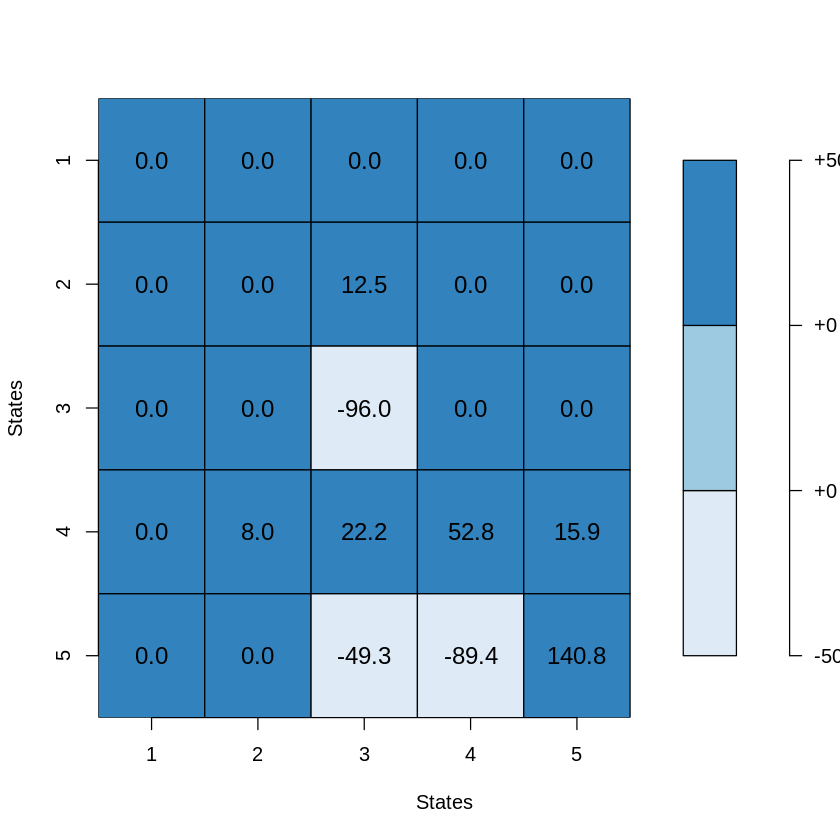



	Step no.:  4
		Current State:  9
		Reward CS:  10
		Possible next states:  4 8 10 14
		Next state:  8
		New Q-Value:  14.1

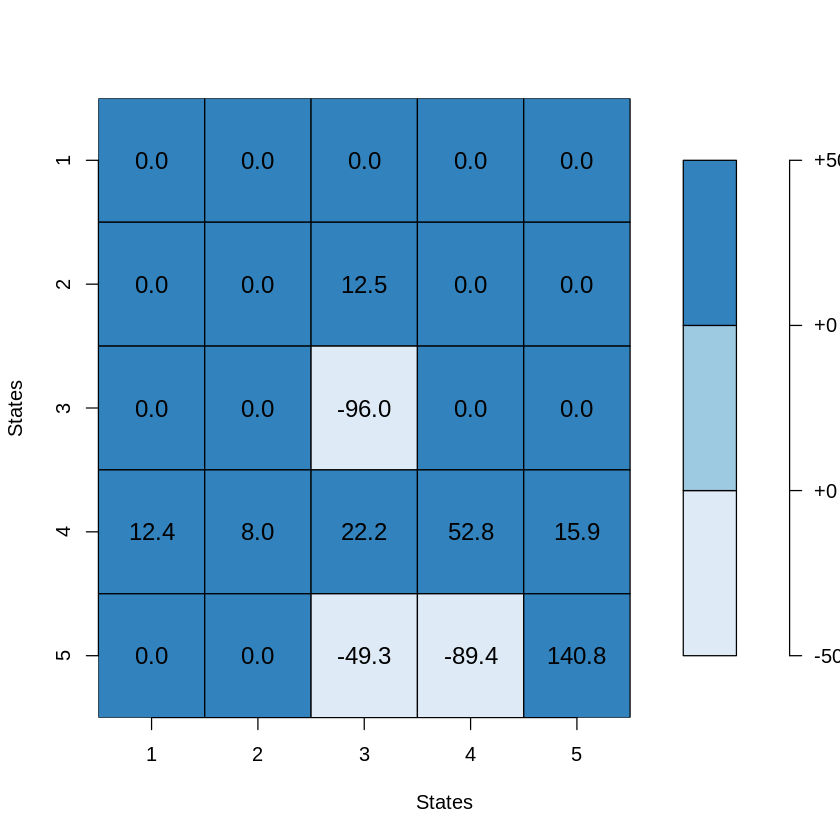



	Step no.:  5
		Current State:  8
		Reward CS:  10
		Possible next states:  3 7 9 13
		Next state:  9
		New Q-Value:  20.4

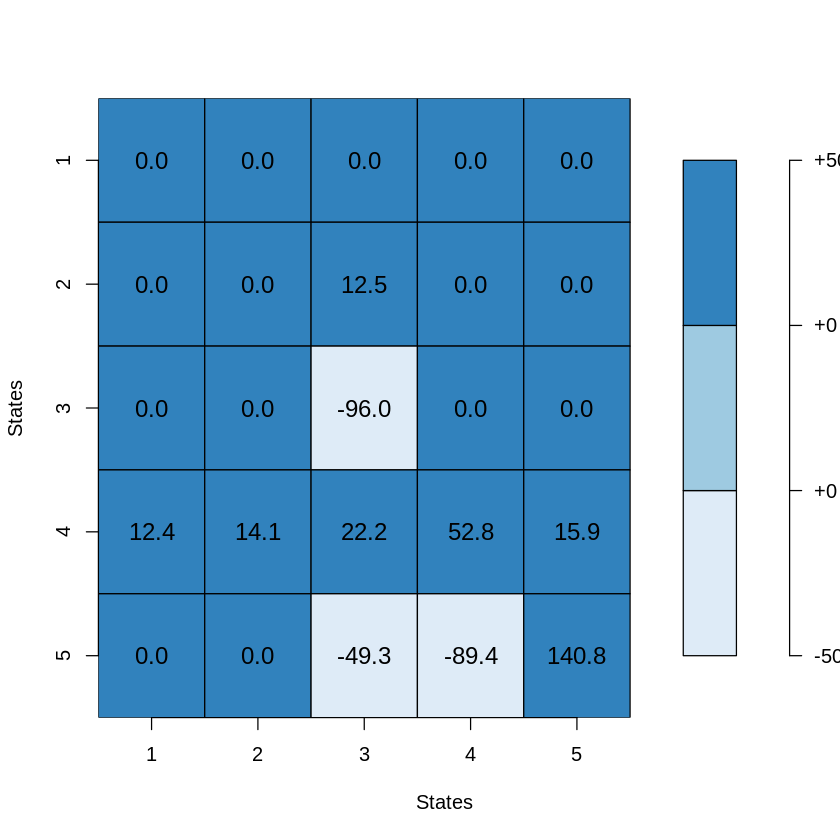



	Step no.:  6
		Current State:  9
		Reward CS:  10
		Possible next states:  4 8 10 14
		Next state:  4
		New Q-Value:  18.7

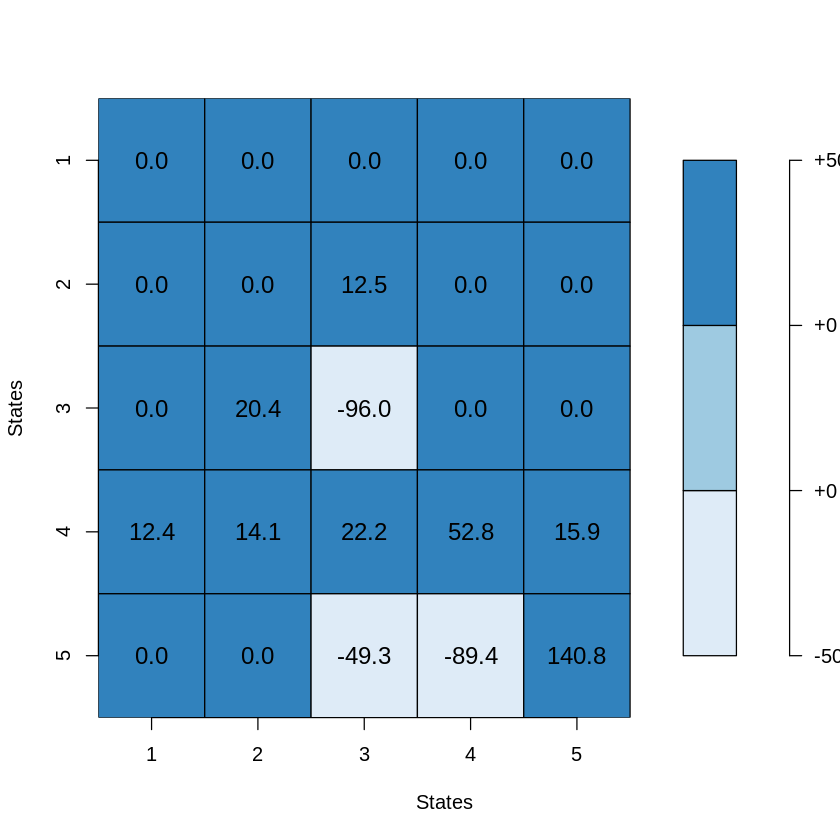



	Step no.:  7
		Current State:  4
		Reward CS:  0
		Possible next states:  3 5 9
		Next state:  5
		New Q-Value:  9.4

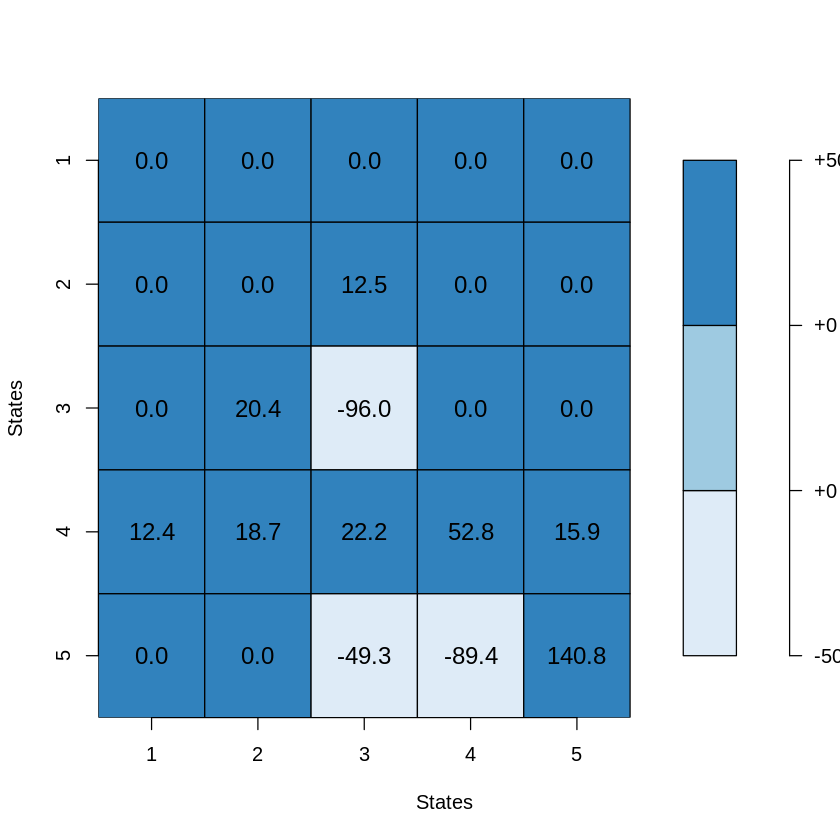



	Step no.:  8
		Current State:  5
		Reward CS:  -100
		Possible next states:  4 10
		Next state:  4
		New Q-Value:  -69.5

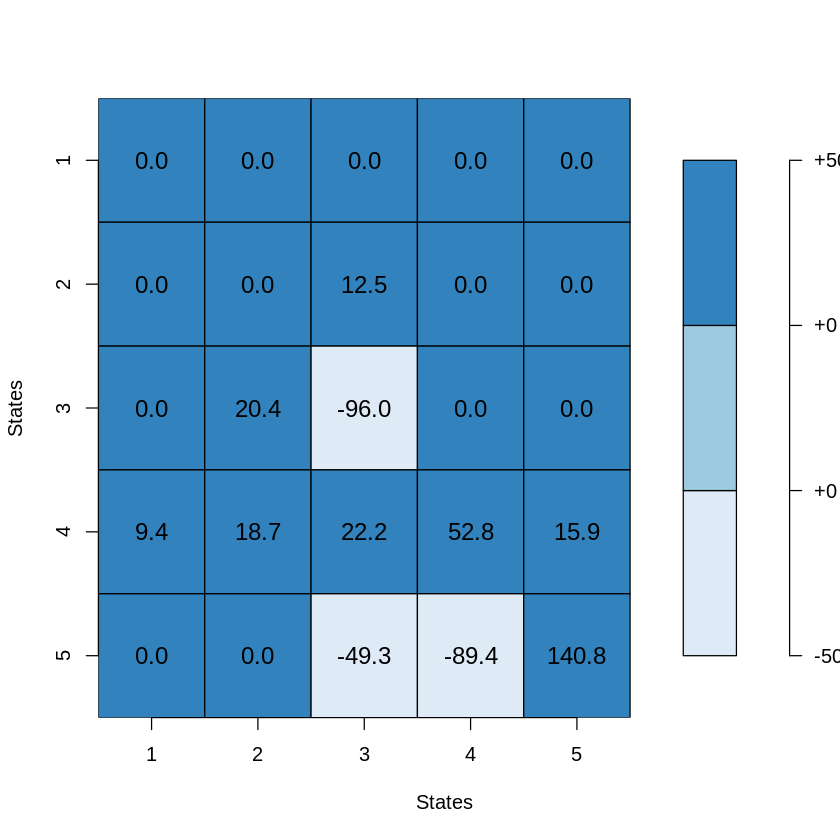



	Step no.:  9
		Current State:  4
		Reward CS:  0
		Possible next states:  3 5 9
		Next state:  5
		New Q-Value:  7.1

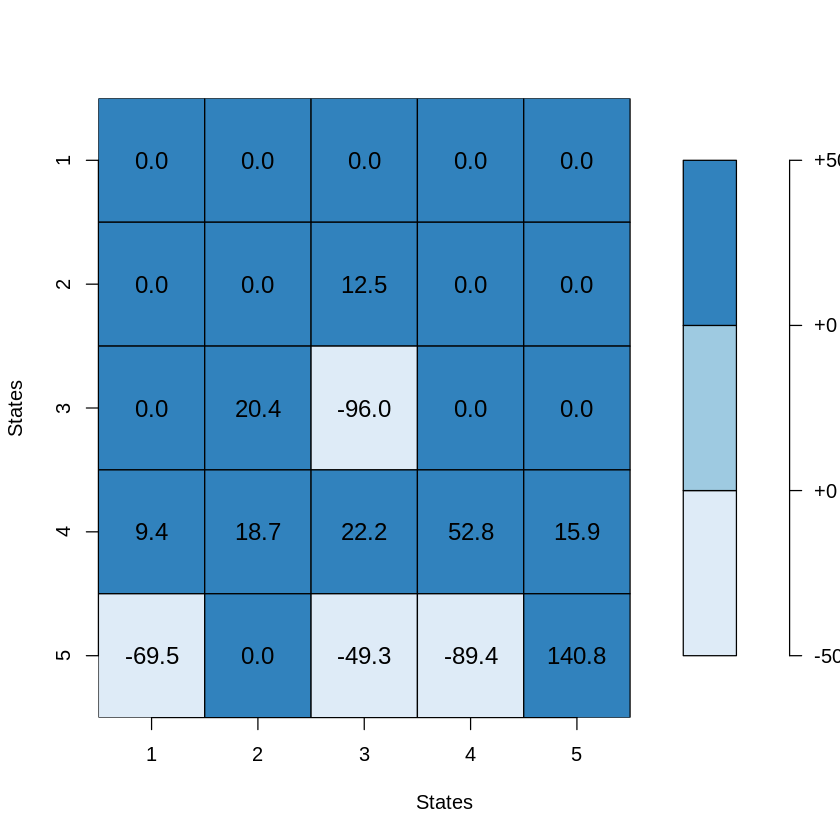



	Step no.:  10
		Current State:  5
		Reward CS:  -100
		Possible next states:  4 10
		Next state:  4
		New Q-Value:  -83.4

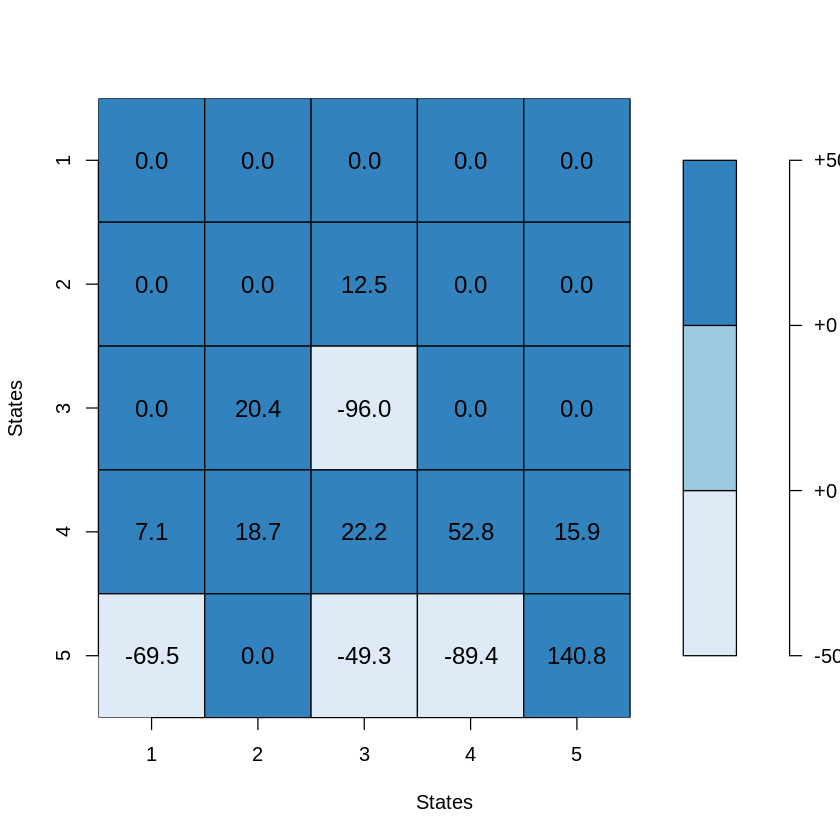



	Step no.:  11
		Current State:  4
		Reward CS:  0
		Possible next states:  3 5 9
		Next state:  3
		New Q-Value:  12.8

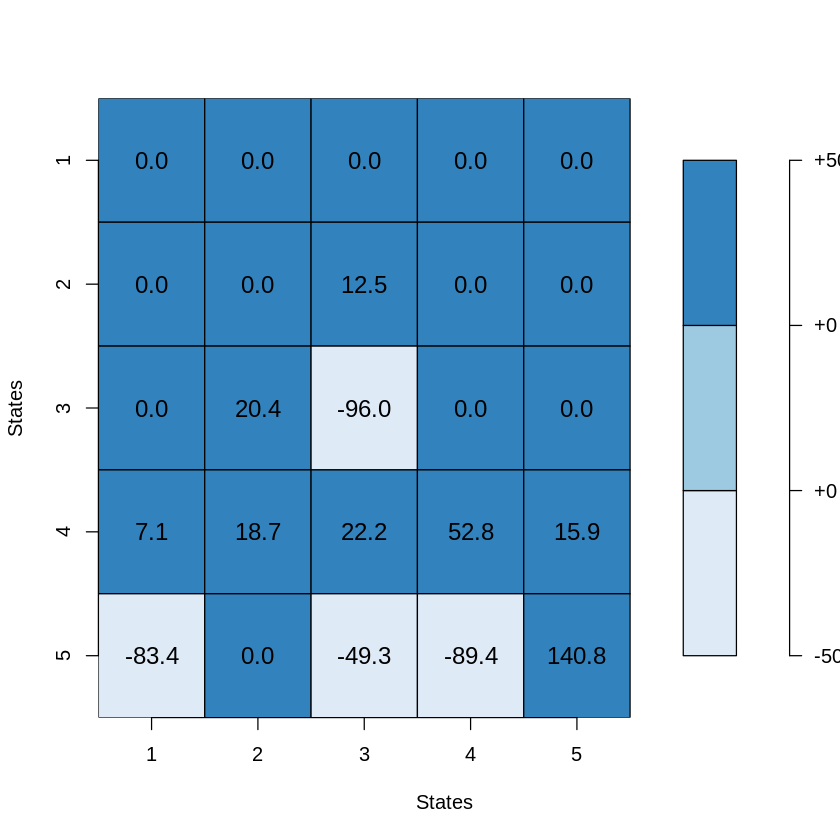



	Step no.:  12
		Current State:  3
		Reward CS:  -100
		Possible next states:  2 4 8
		Next state:  4
		New Q-Value:  -69.5

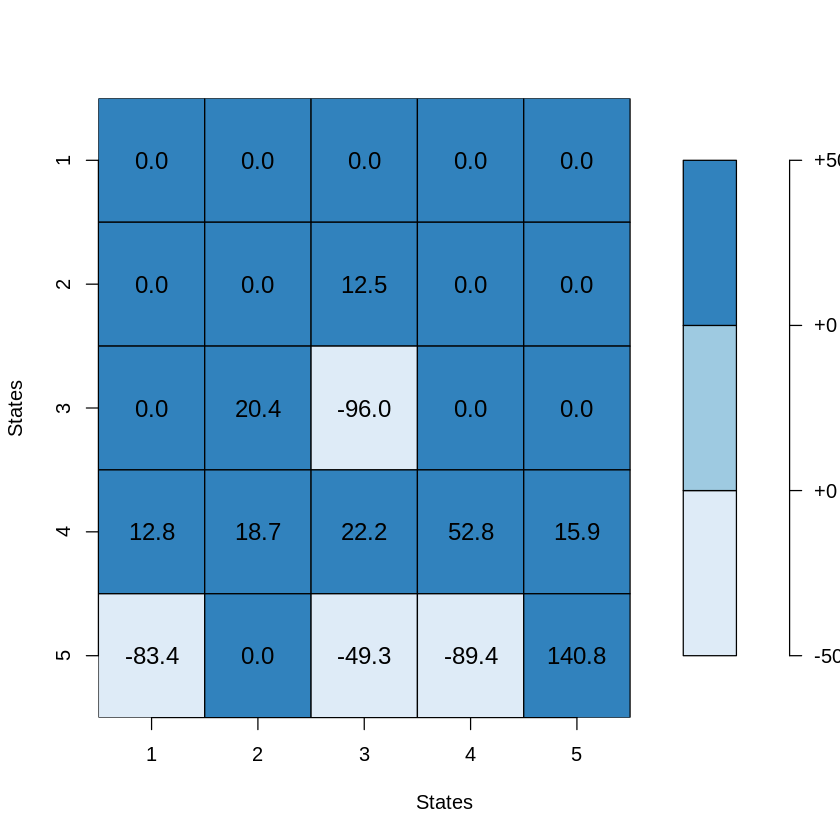



	Step no.:  13
		Current State:  4
		Reward CS:  0
		Possible next states:  3 5 9
		Next state:  3
		New Q-Value:  14

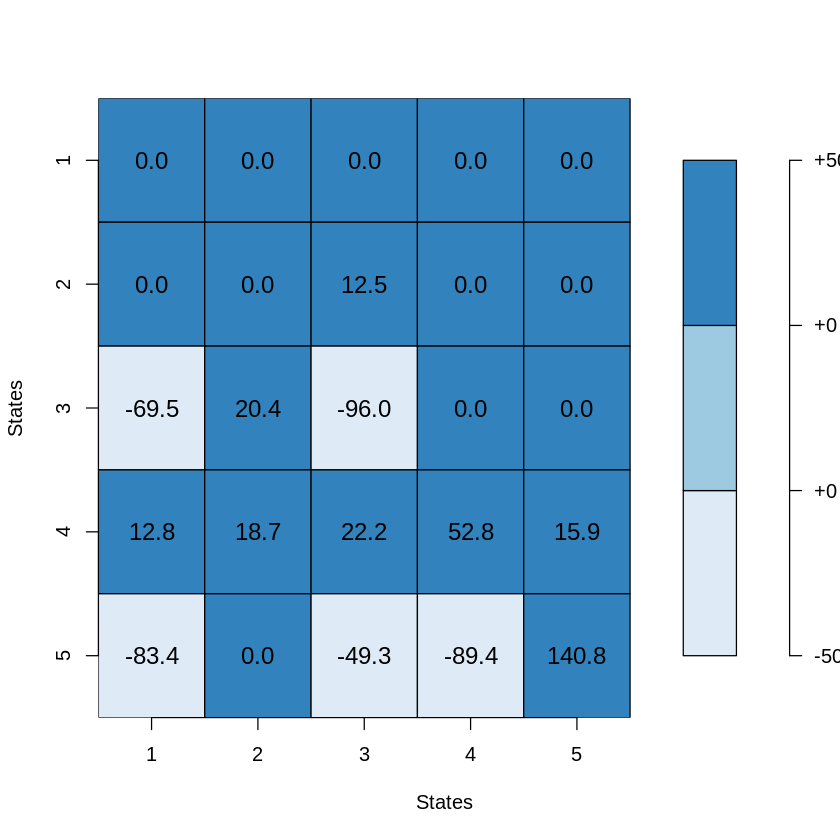



	Step no.:  14
		Current State:  3
		Reward CS:  -100
		Possible next states:  2 4 8
		Next state:  4
		New Q-Value:  -83.4

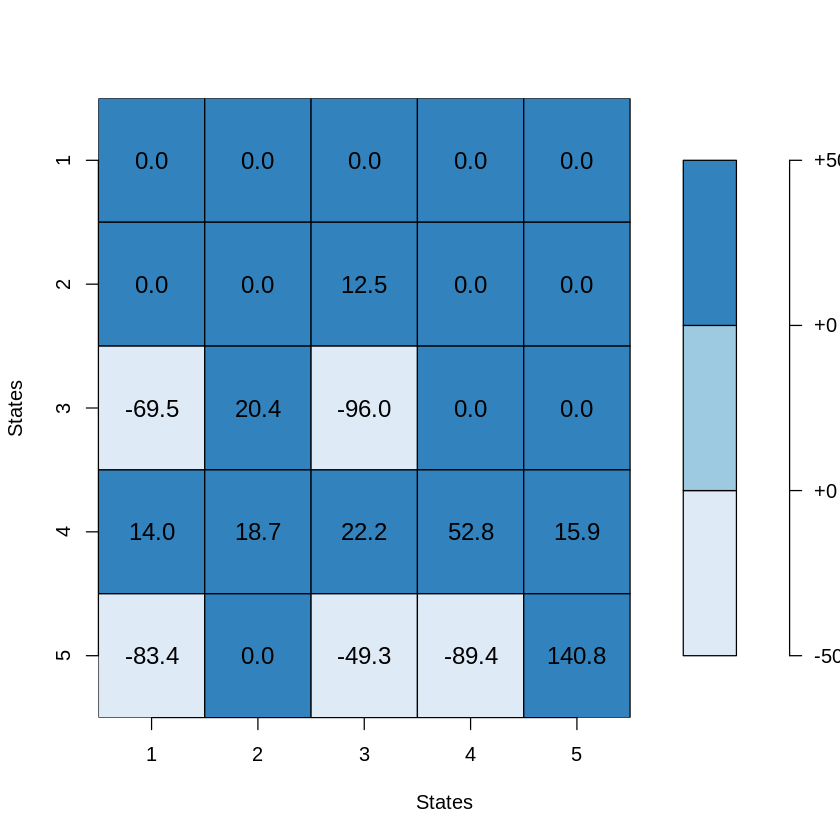



	Step no.:  15
		Current State:  4
		Reward CS:  0
		Possible next states:  3 5 9
		Next state:  5
		New Q-Value:  10.6

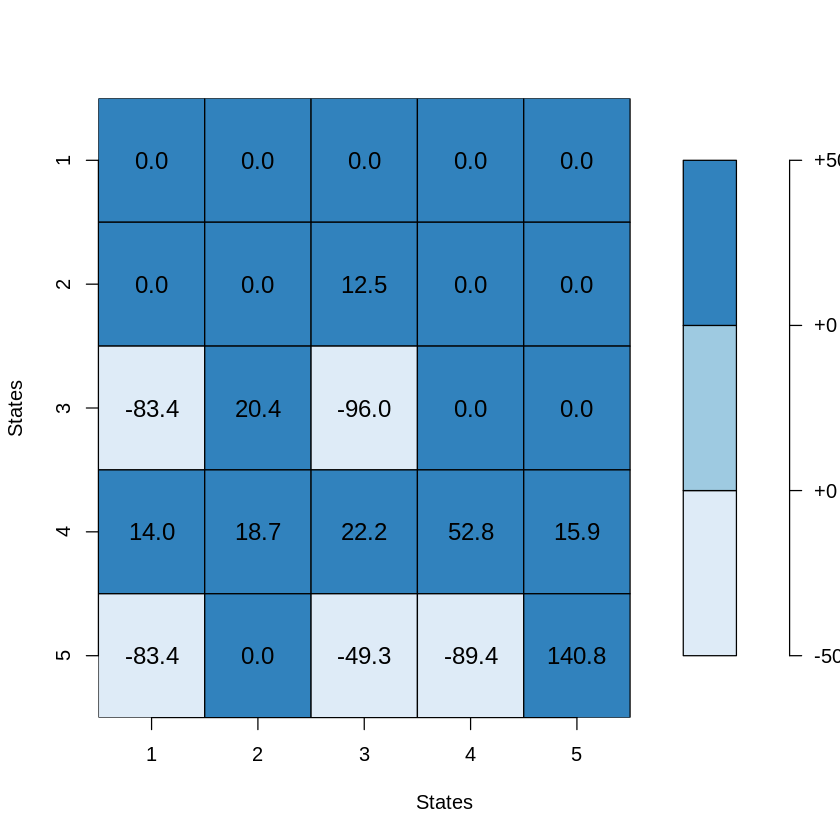



	Step no.:  16
		Current State:  5
		Reward CS:  -100
		Possible next states:  4 10
		Next state:  4
		New Q-Value:  -86.2

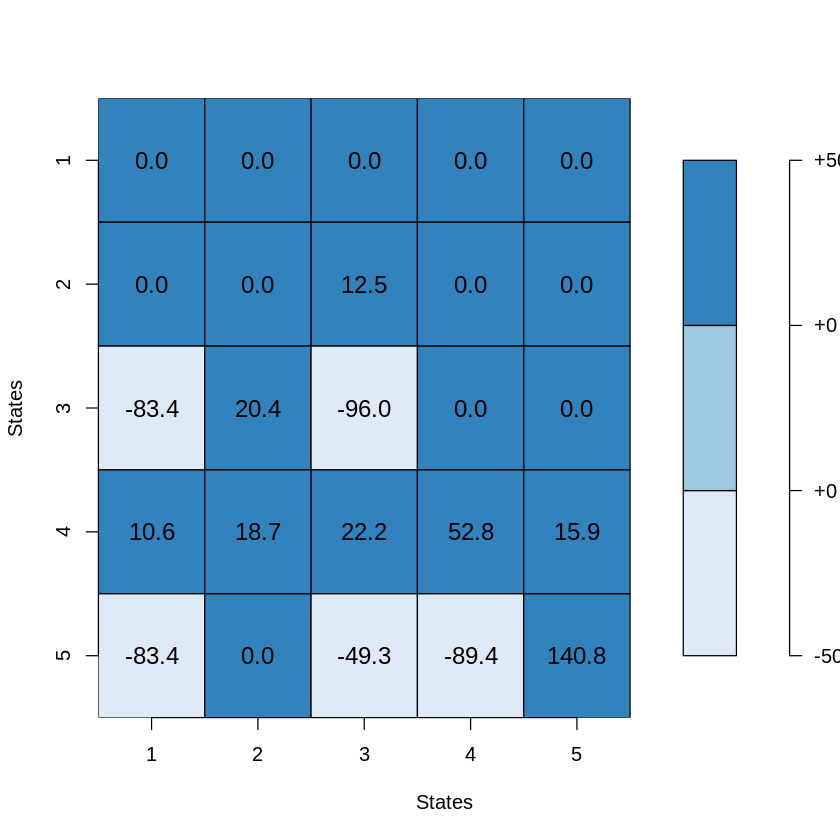



	Step no.:  17
		Current State:  4
		Reward CS:  0
		Possible next states:  3 5 9
		Next state:  5
		New Q-Value:  8.1

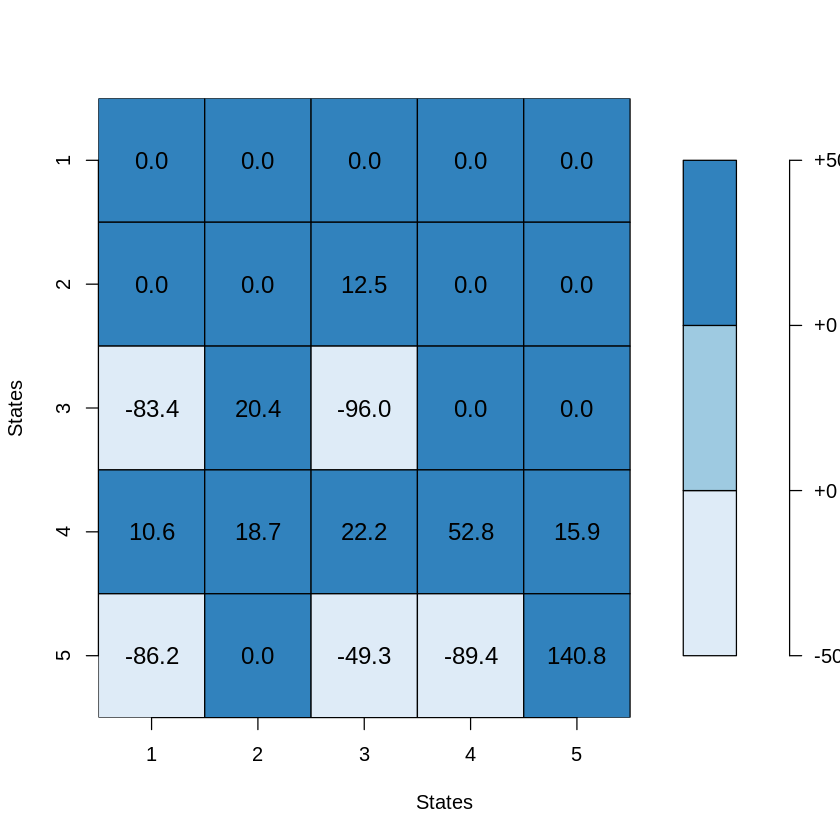



	Step no.:  18
		Current State:  5
		Reward CS:  -100
		Possible next states:  4 10
		Next state:  10
		New Q-Value:  -86.8

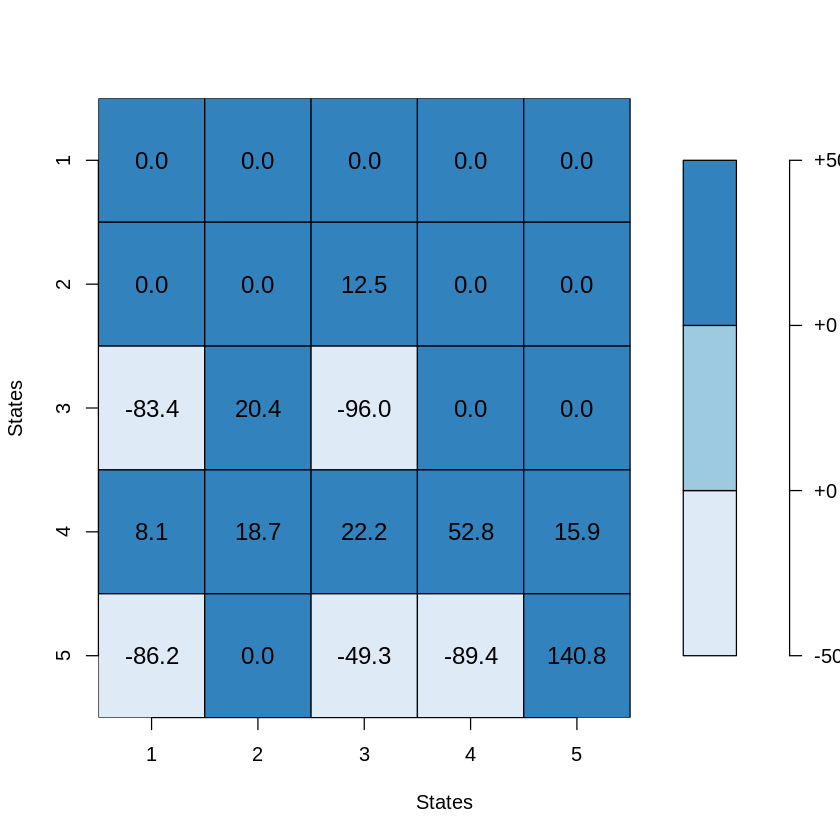



	Step no.:  19
		Current State:  10
		Reward CS:  -100
		Possible next states:  5 9 15
		Next state:  5
		New Q-Value:  -75.5

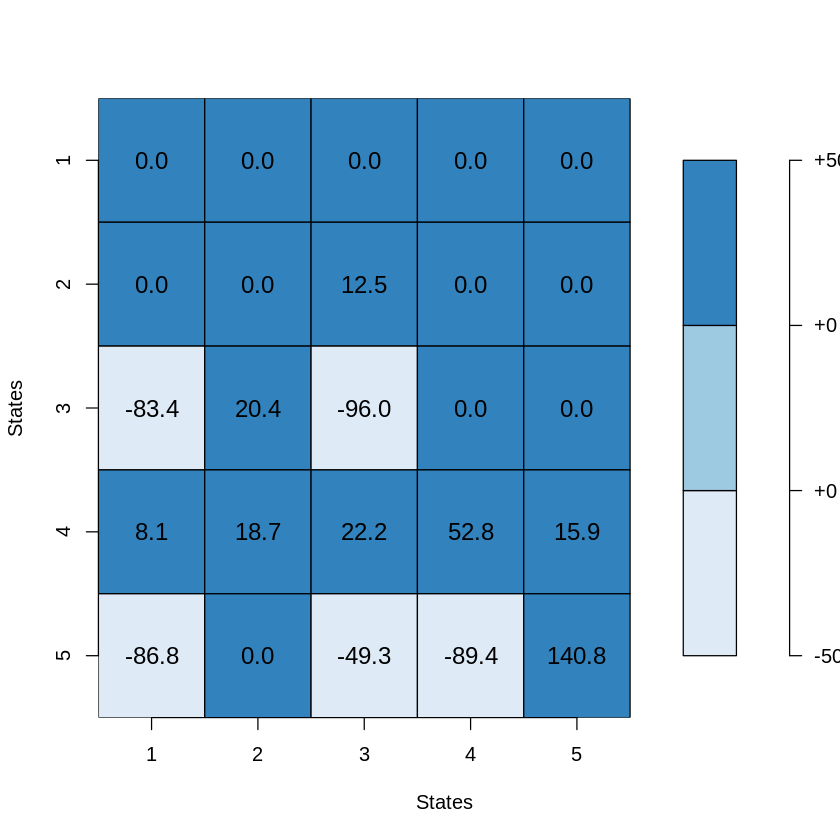



	Step no.:  20
		Current State:  5
		Reward CS:  -100
		Possible next states:  4 10
		Next state:  10
		New Q-Value:  -86.9

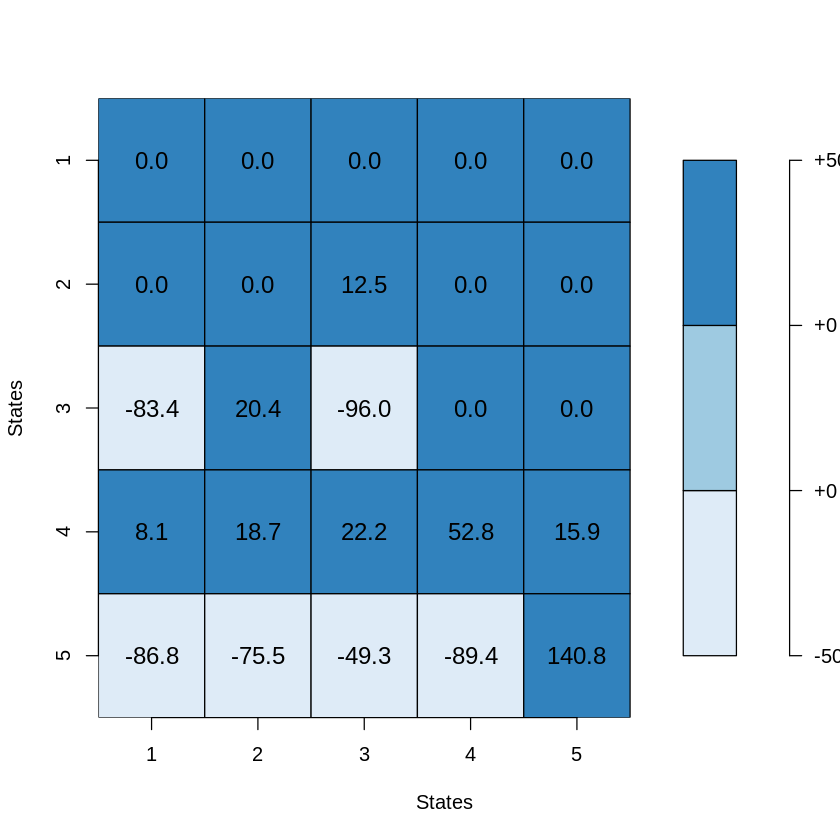



	Step no.:  21
		Current State:  10
		Reward CS:  -100
		Possible next states:  5 9 15
		Next state:  5
		New Q-Value:  -90.6

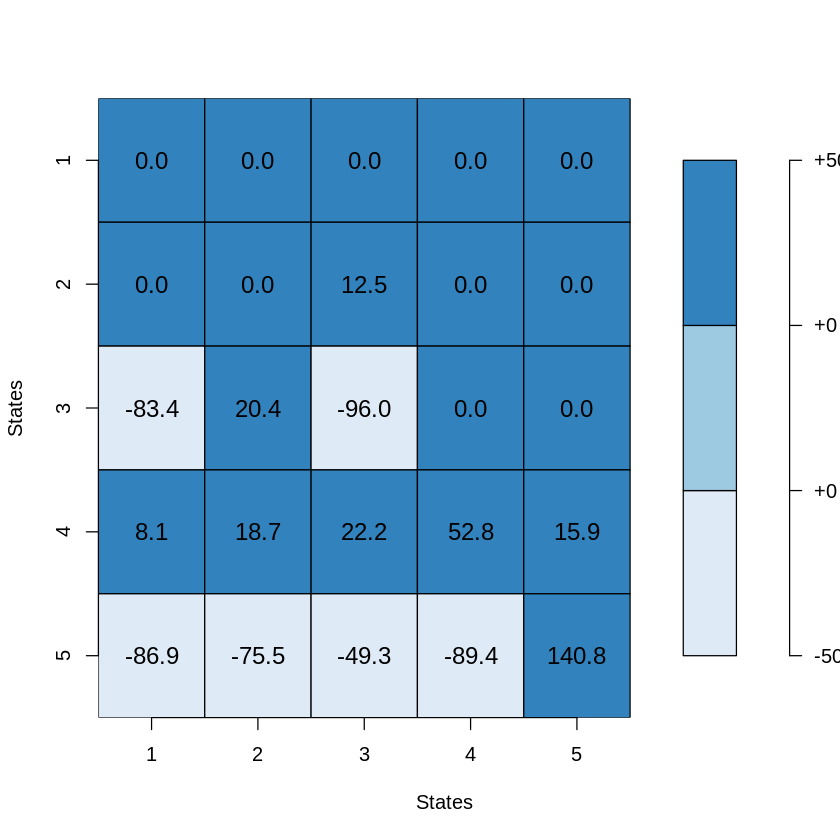


End Episode:  3
Start Episode:  4
	Current state:  13

	Step no.:  1
		Current State:  13
		Reward CS:  -100
		Possible next states:  8 12 14 18
		Next state:  8
		New Q-Value:  -88.7

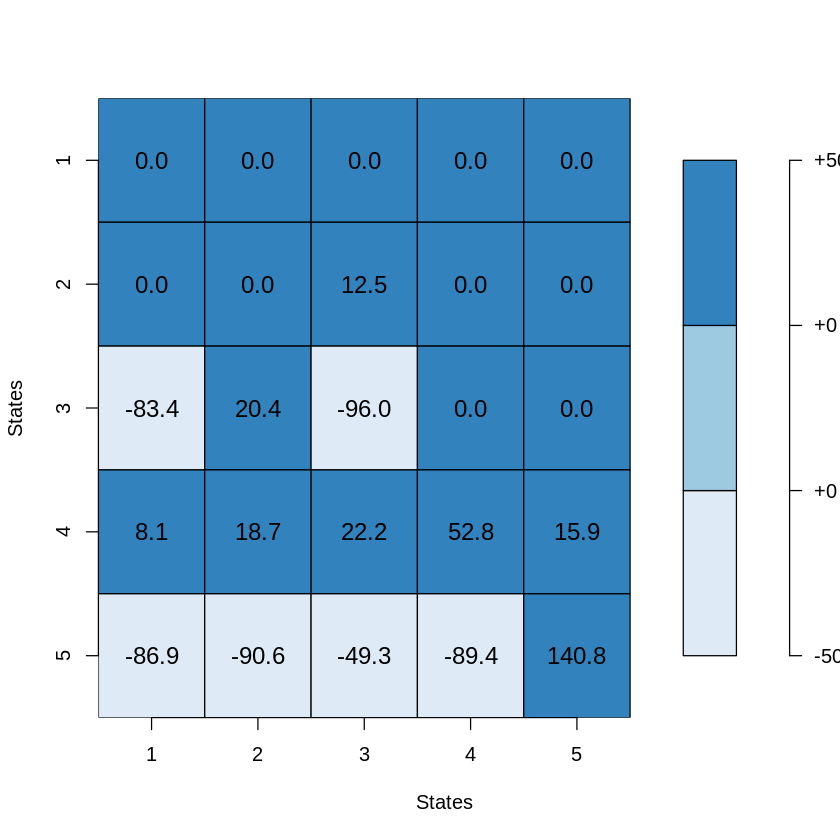



	Step no.:  2
		Current State:  8
		Reward CS:  10
		Possible next states:  3 7 9 13
		Next state:  7
		New Q-Value:  23.5

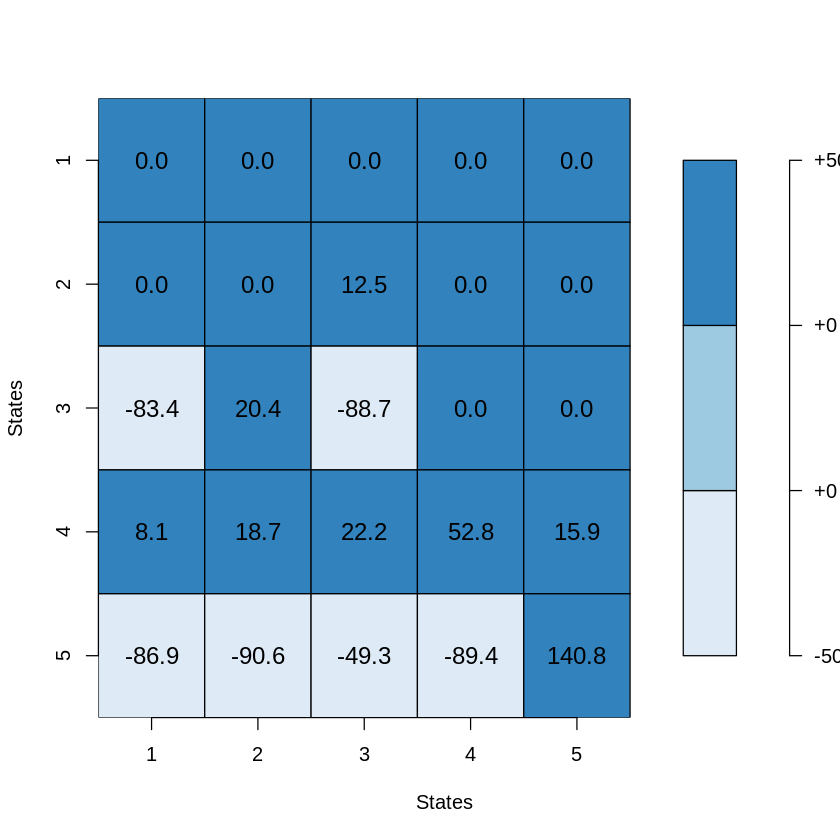



	Step no.:  3
		Current State:  7
		Reward CS:  10
		Possible next states:  2 6 8 12
		Next state:  8
		New Q-Value:  18.5

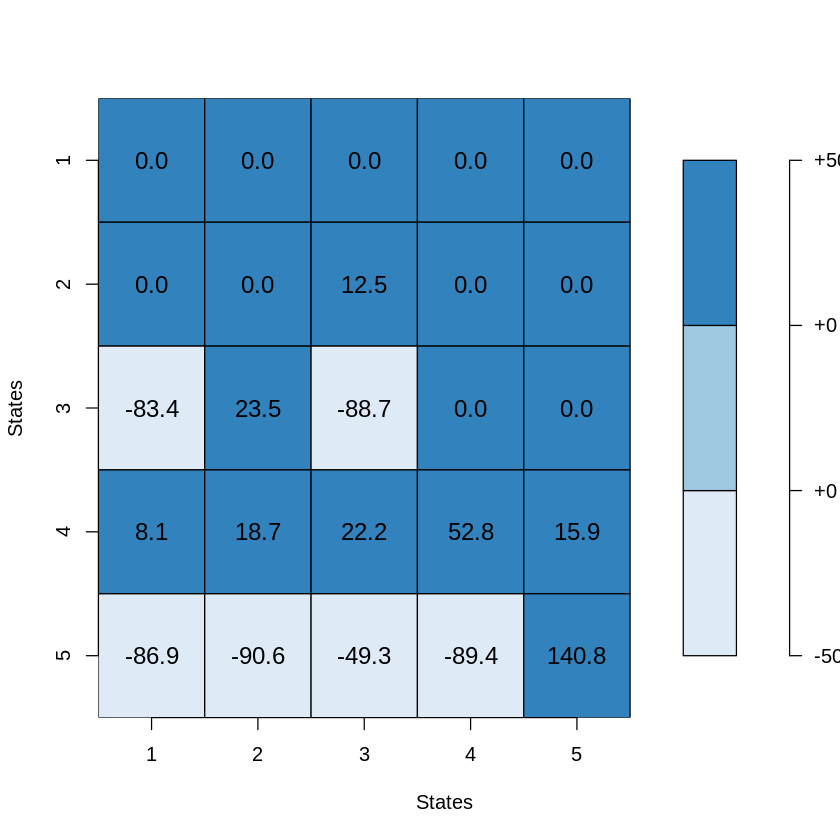



	Step no.:  4
		Current State:  8
		Reward CS:  10
		Possible next states:  3 7 9 13
		Next state:  9
		New Q-Value:  25.9

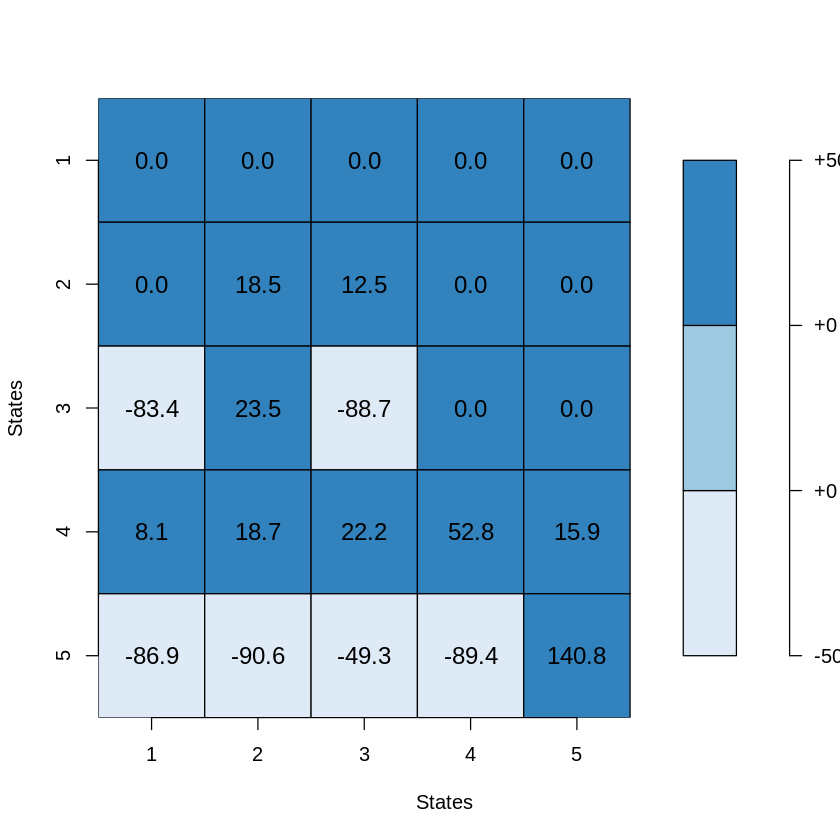



	Step no.:  5
		Current State:  9
		Reward CS:  10
		Possible next states:  4 8 10 14
		Next state:  8
		New Q-Value:  22.2

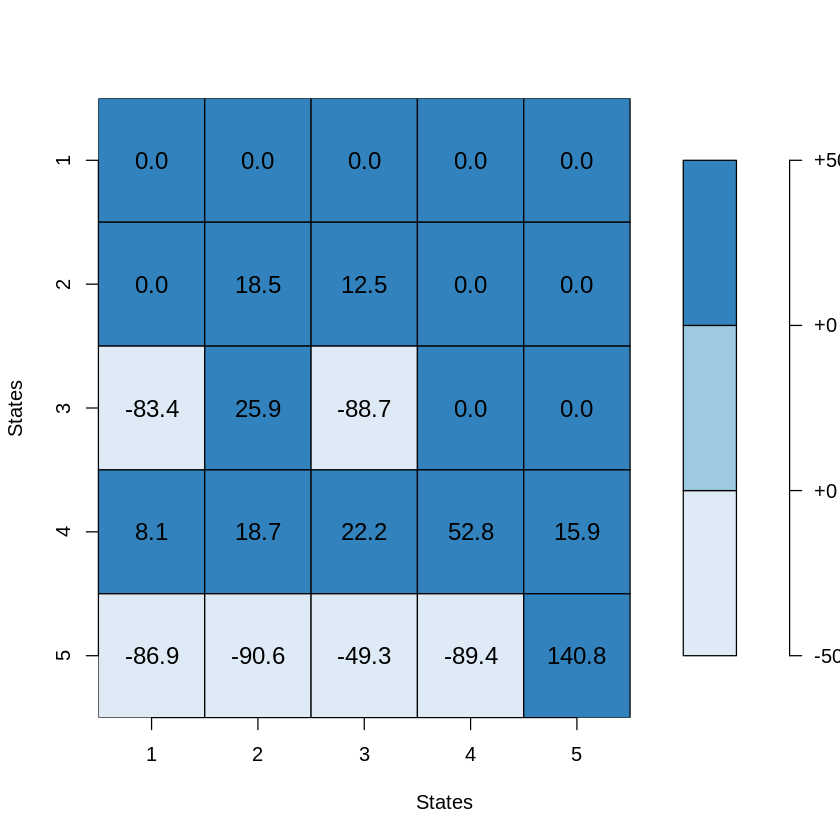



	Step no.:  6
		Current State:  8
		Reward CS:  10
		Possible next states:  3 7 9 13
		Next state:  3
		New Q-Value:  27.7

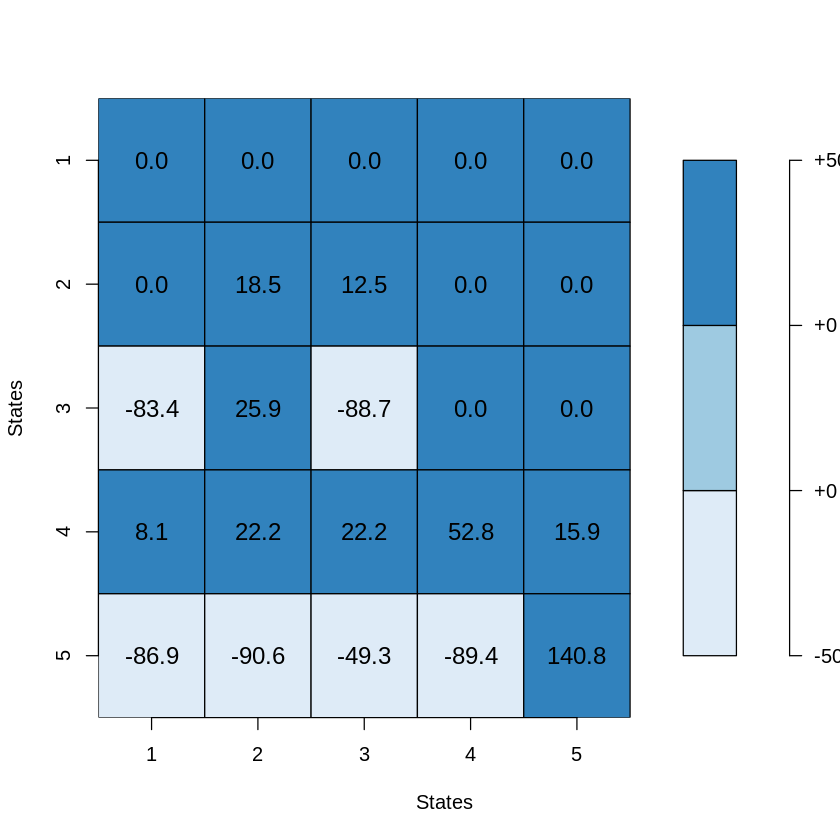



	Step no.:  7
		Current State:  3
		Reward CS:  -100
		Possible next states:  2 4 8
		Next state:  4
		New Q-Value:  -84.2

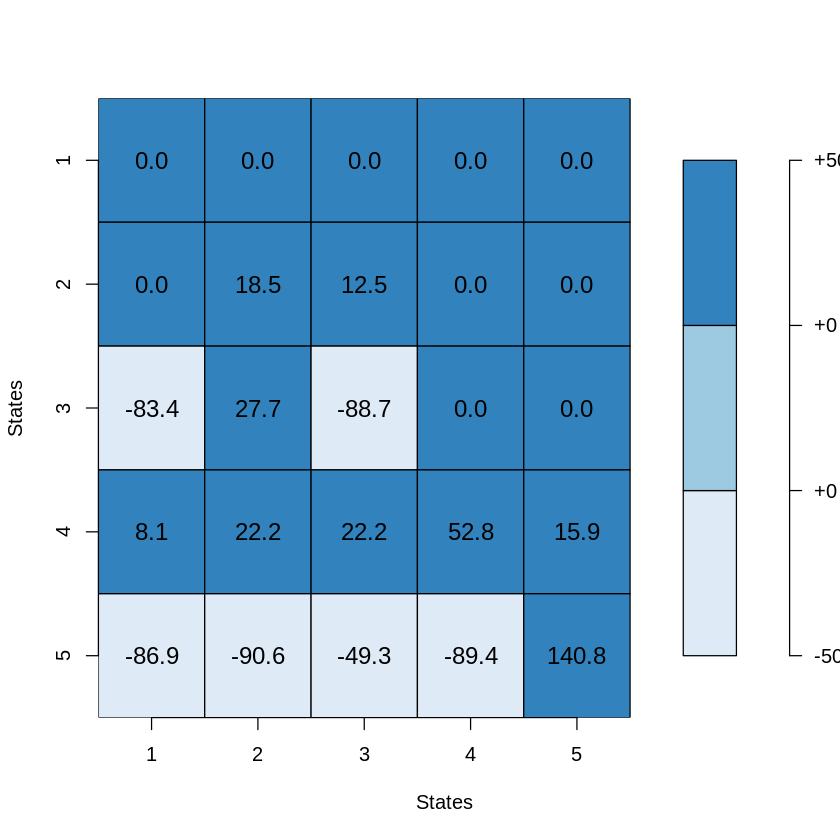



	Step no.:  8
		Current State:  4
		Reward CS:  0
		Possible next states:  3 5 9
		Next state:  3
		New Q-Value:  17.1

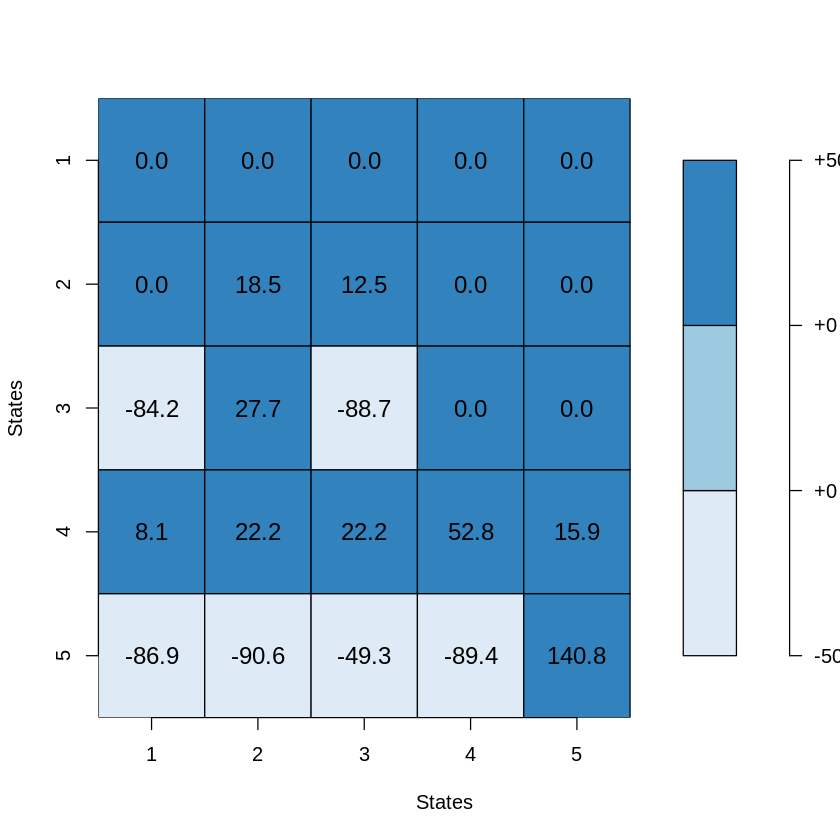



	Step no.:  9
		Current State:  3
		Reward CS:  -100
		Possible next states:  2 4 8
		Next state:  8
		New Q-Value:  -84.4

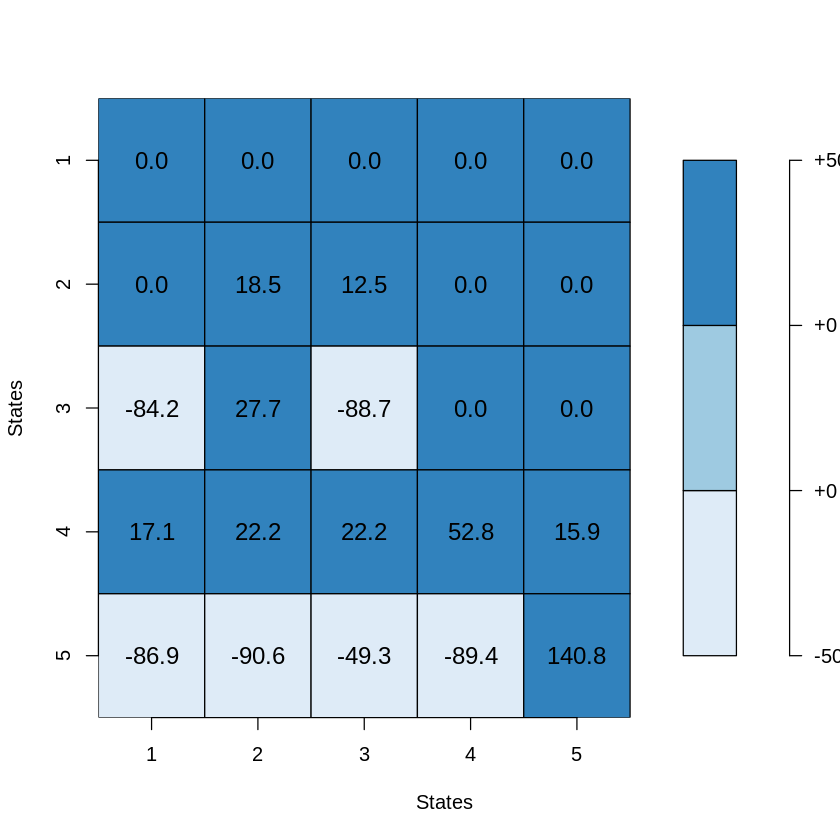



	Step no.:  10
		Current State:  8
		Reward CS:  10
		Possible next states:  3 7 9 13
		Next state:  13
		New Q-Value:  29.1

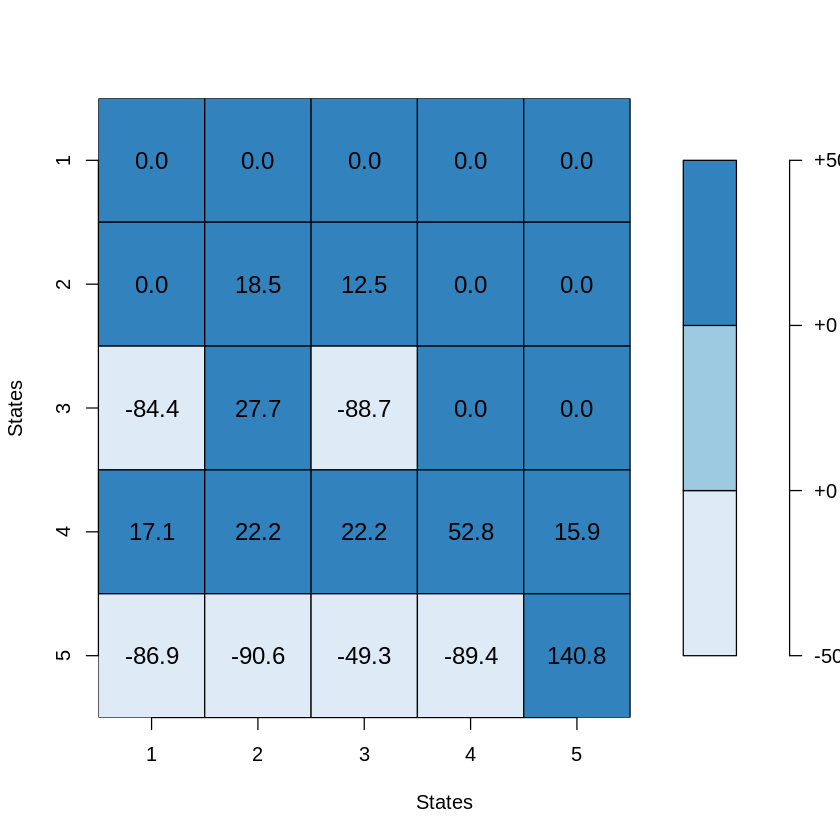



	Step no.:  11
		Current State:  13
		Reward CS:  -100
		Possible next states:  8 12 14 18
		Next state:  8
		New Q-Value:  -85.3

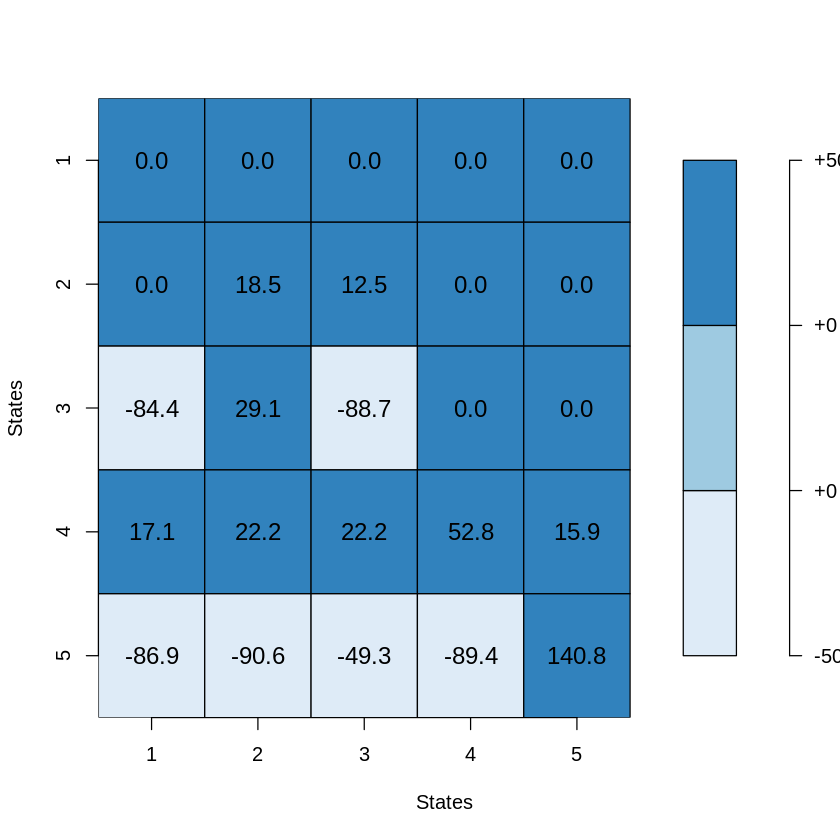



	Step no.:  12
		Current State:  8
		Reward CS:  10
		Possible next states:  3 7 9 13
		Next state:  13
		New Q-Value:  30.1

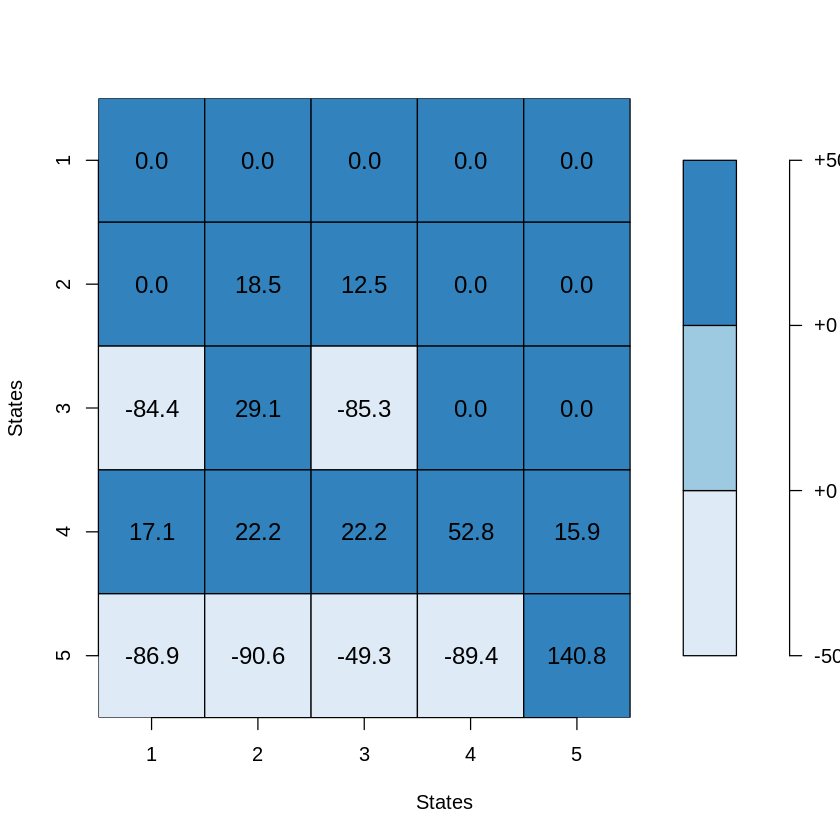



	Step no.:  13
		Current State:  13
		Reward CS:  -100
		Possible next states:  8 12 14 18
		Next state:  8
		New Q-Value:  -84.6

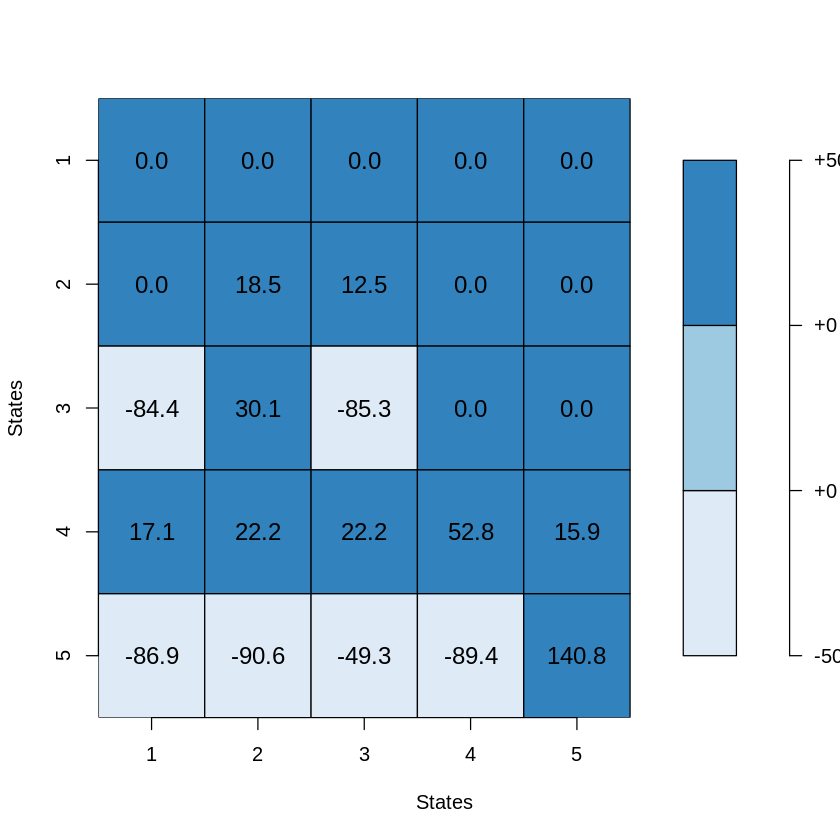



	Step no.:  14
		Current State:  8
		Reward CS:  10
		Possible next states:  3 7 9 13
		Next state:  7
		New Q-Value:  30.9

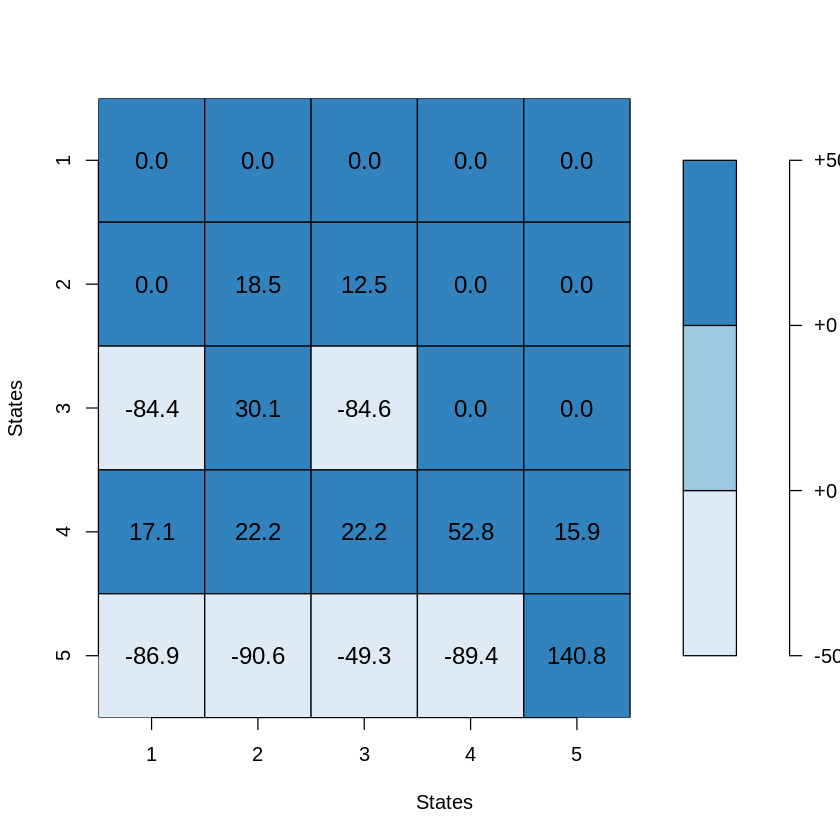



	Step no.:  15
		Current State:  7
		Reward CS:  10
		Possible next states:  2 6 8 12
		Next state:  8
		New Q-Value:  24.1

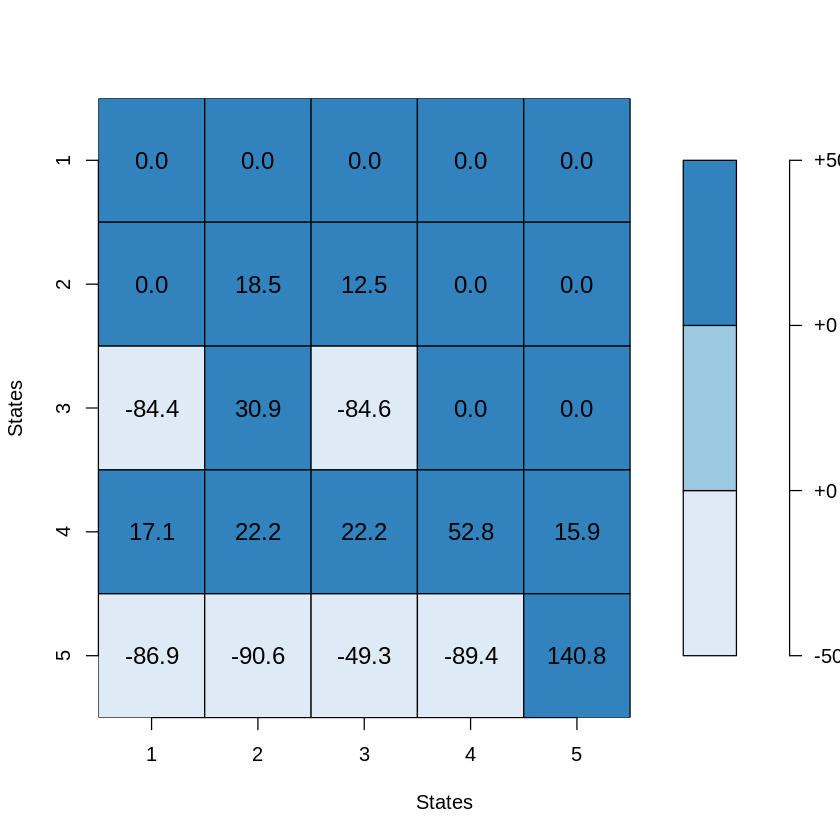



	Step no.:  16
		Current State:  8
		Reward CS:  10
		Possible next states:  3 7 9 13
		Next state:  9
		New Q-Value:  31.5

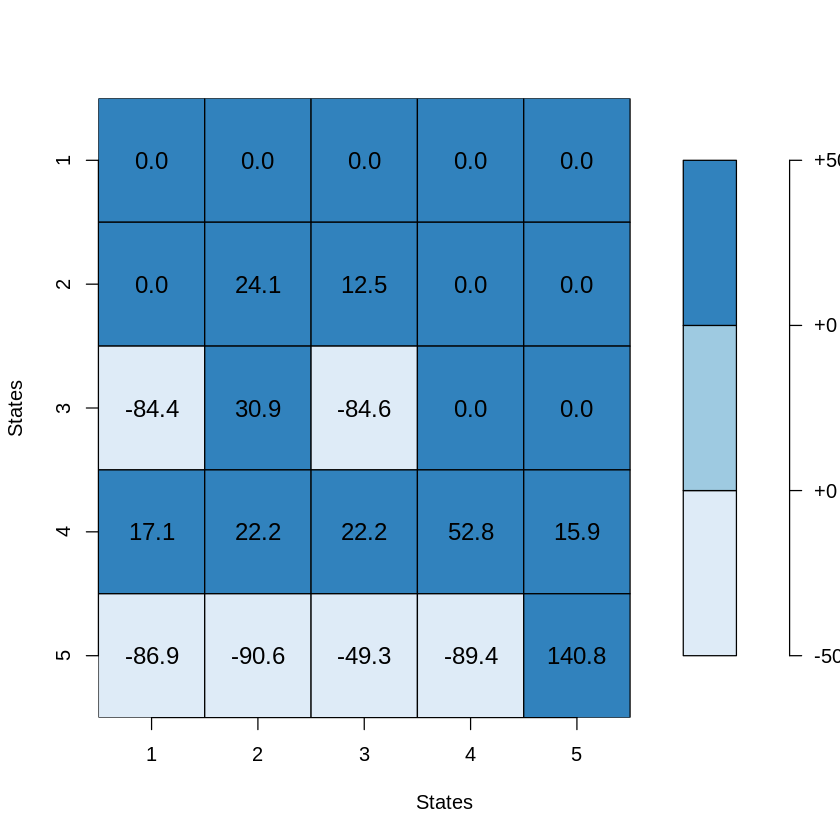



	Step no.:  17
		Current State:  9
		Reward CS:  10
		Possible next states:  4 8 10 14
		Next state:  10
		New Q-Value:  24.9

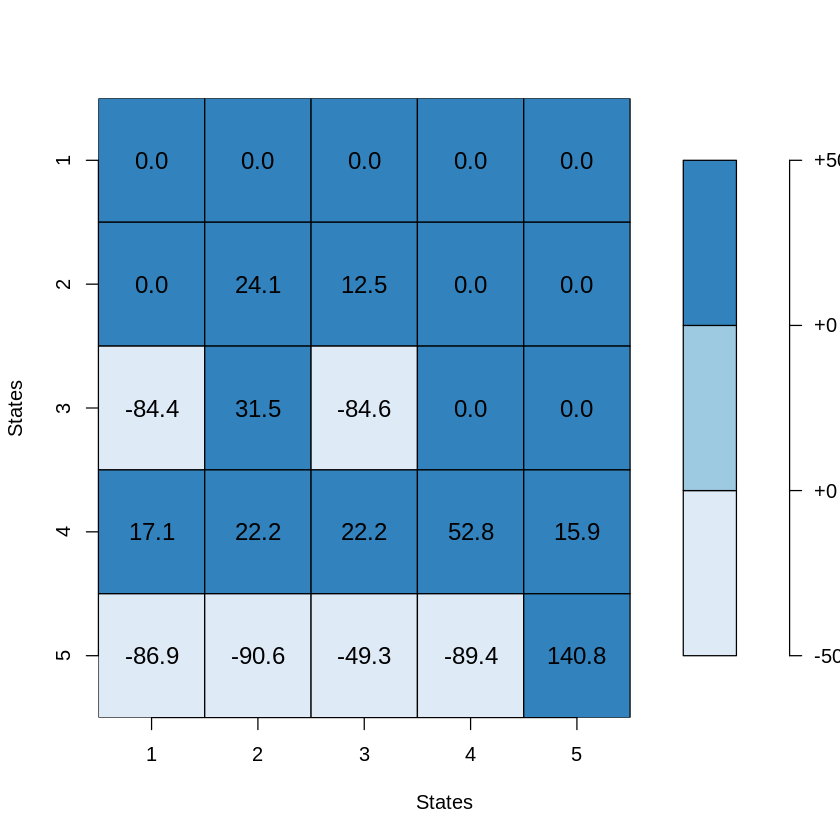



	Step no.:  18
		Current State:  10
		Reward CS:  -100
		Possible next states:  5 9 15
		Next state:  15
		New Q-Value:  -85.7

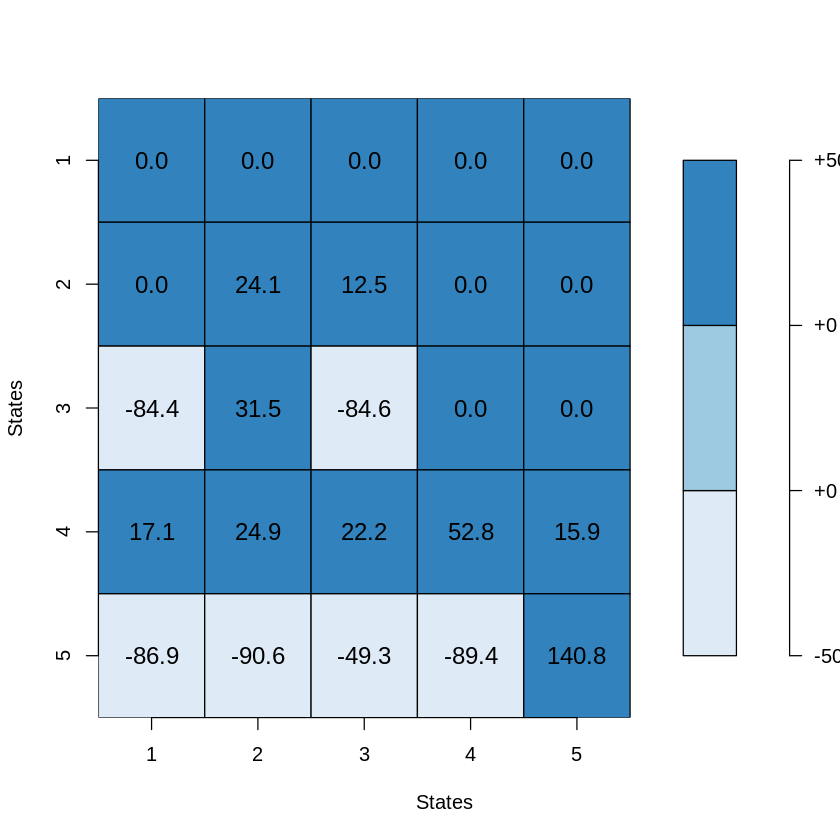



	Step no.:  19
		Current State:  15
		Reward CS:  -100
		Possible next states:  10 14 20
		Next state:  20
		New Q-Value:  -11

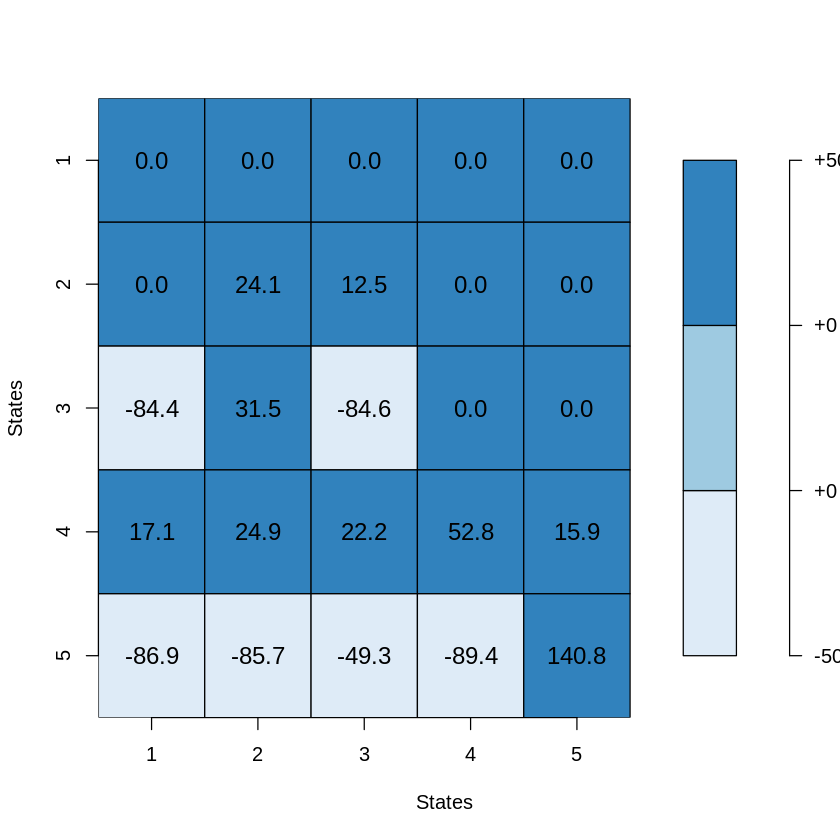



	Step no.:  20
		Current State:  20
		Reward CS:  -100
		Possible next states:  15 19 25
		Next state:  15
		New Q-Value:  -85.4

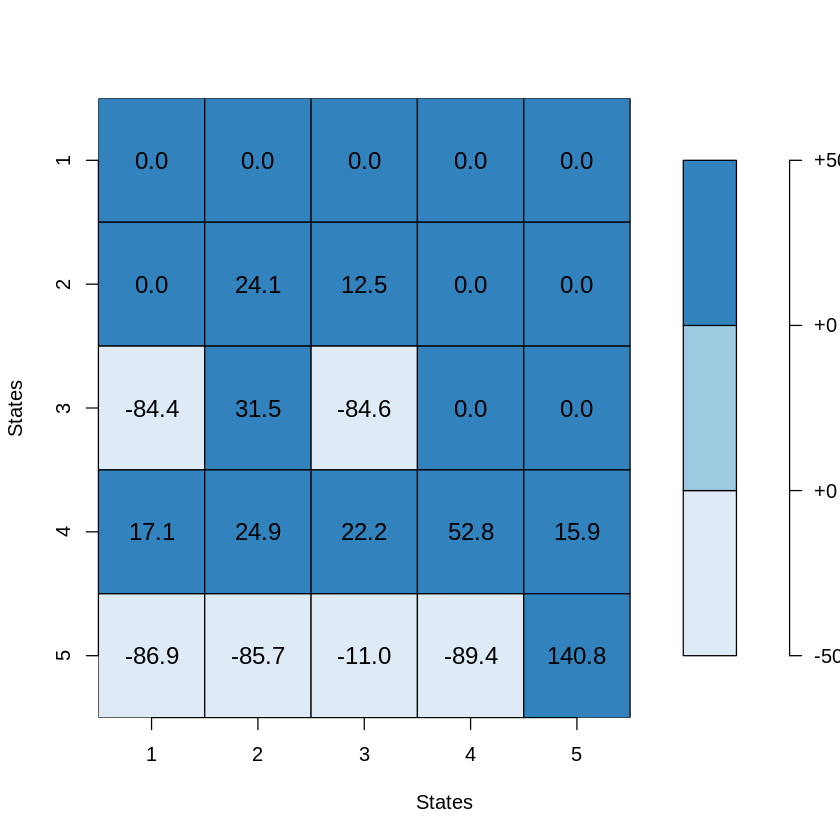



	Step no.:  21
		Current State:  15
		Reward CS:  -100
		Possible next states:  10 14 20
		Next state:  14
		New Q-Value:  -52.6

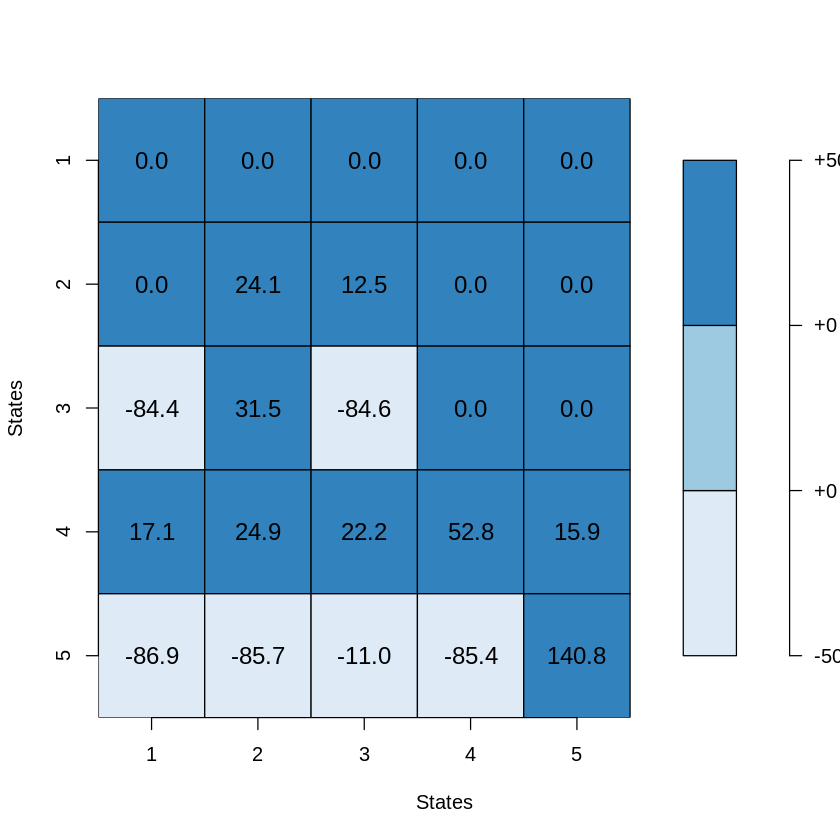


End Episode:  4
Start Episode:  5
	Current state:  8

	Step no.:  1
		Current State:  8
		Reward CS:  10
		Possible next states:  3 7 9 13
		Next state:  7
		New Q-Value:  31.9

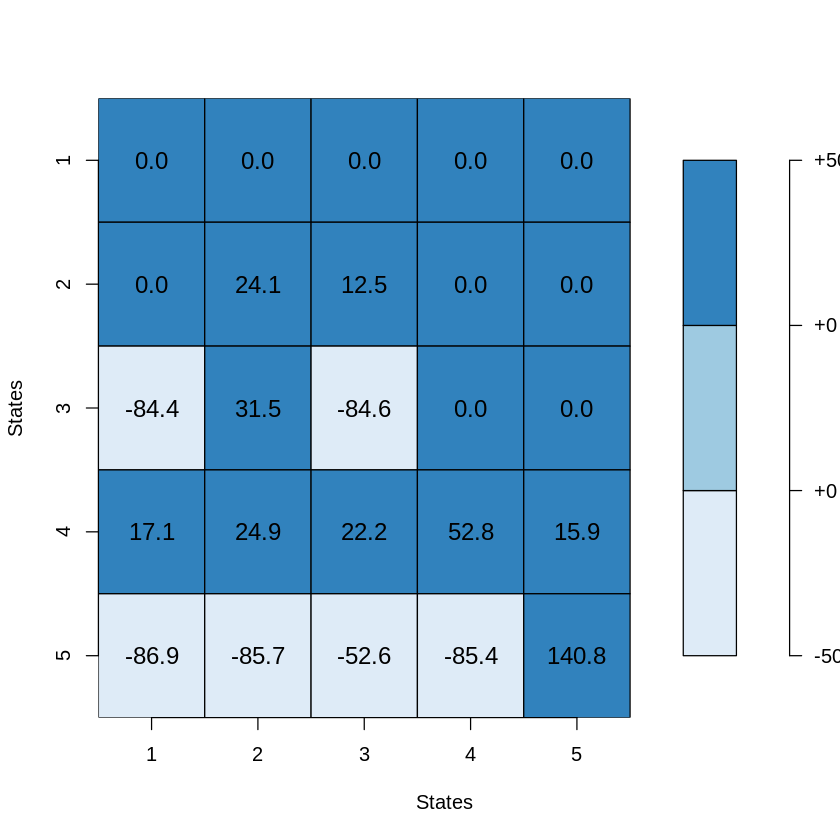



	Step no.:  2
		Current State:  7
		Reward CS:  10
		Possible next states:  2 6 8 12
		Next state:  6
		New Q-Value:  26.3

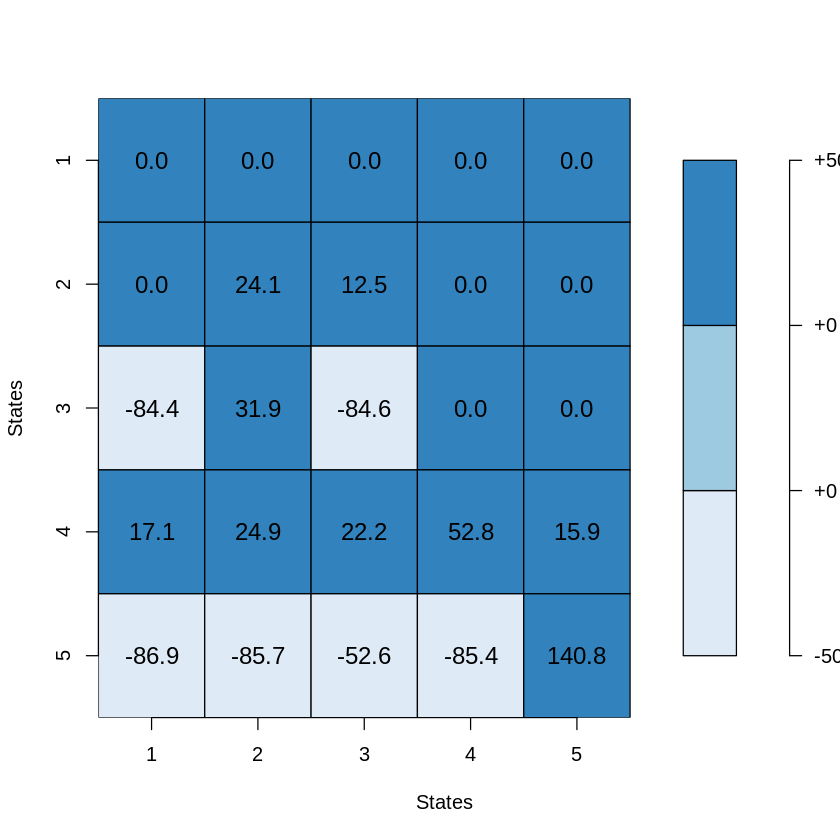



	Step no.:  3
		Current State:  6
		Reward CS:  10
		Possible next states:  1 7 11
		Next state:  7
		New Q-Value:  25.9

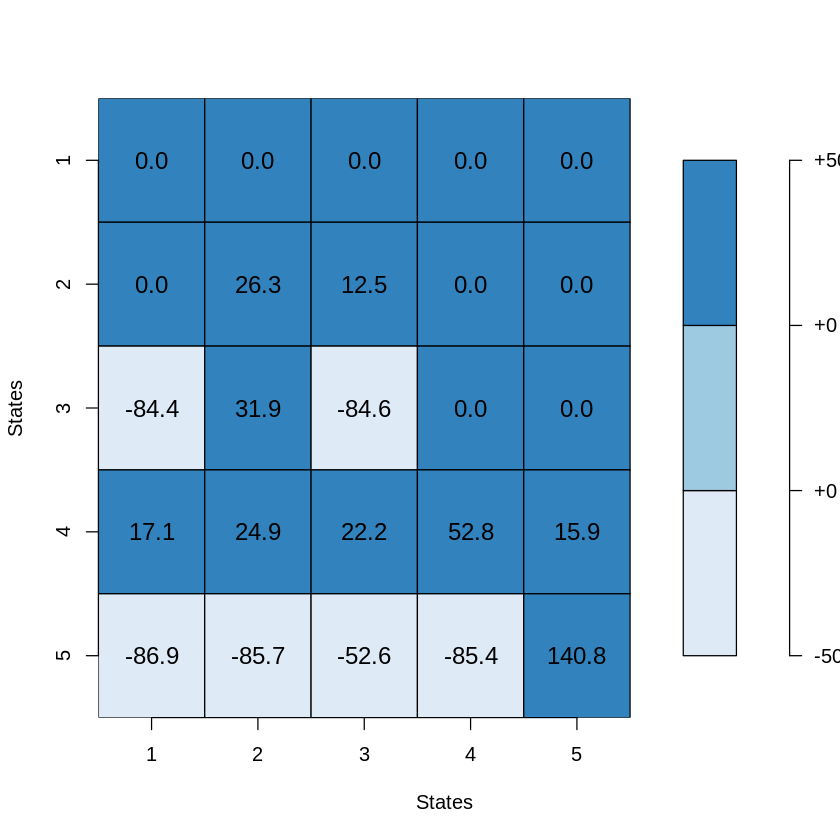



	Step no.:  4
		Current State:  7
		Reward CS:  10
		Possible next states:  2 6 8 12
		Next state:  12
		New Q-Value:  28

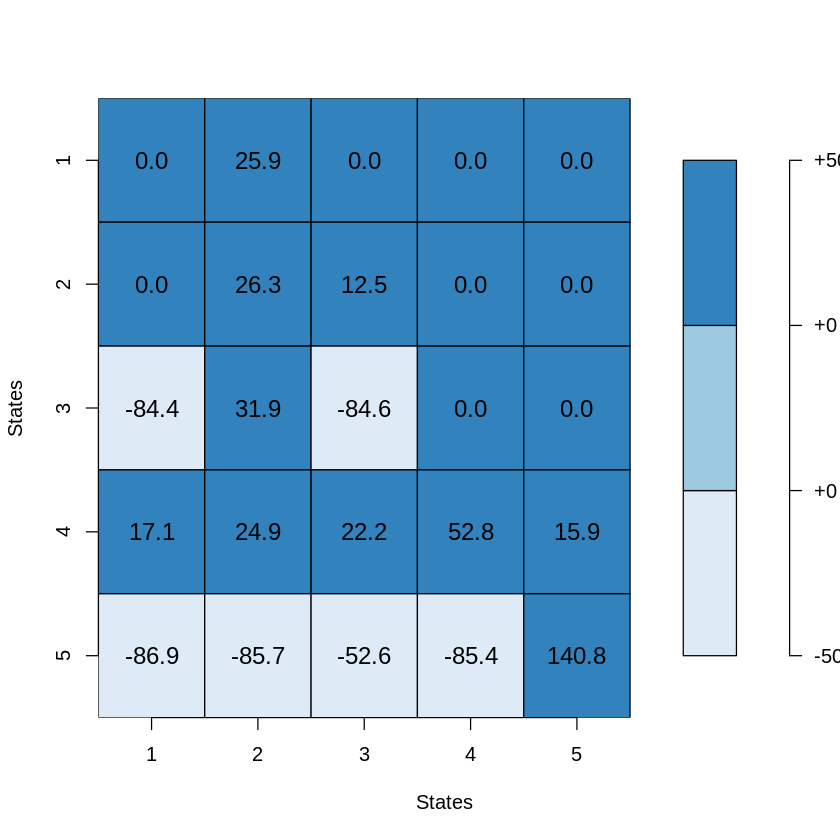



	Step no.:  5
		Current State:  12
		Reward CS:  10
		Possible next states:  7 11 13 17
		Next state:  7
		New Q-Value:  28.4

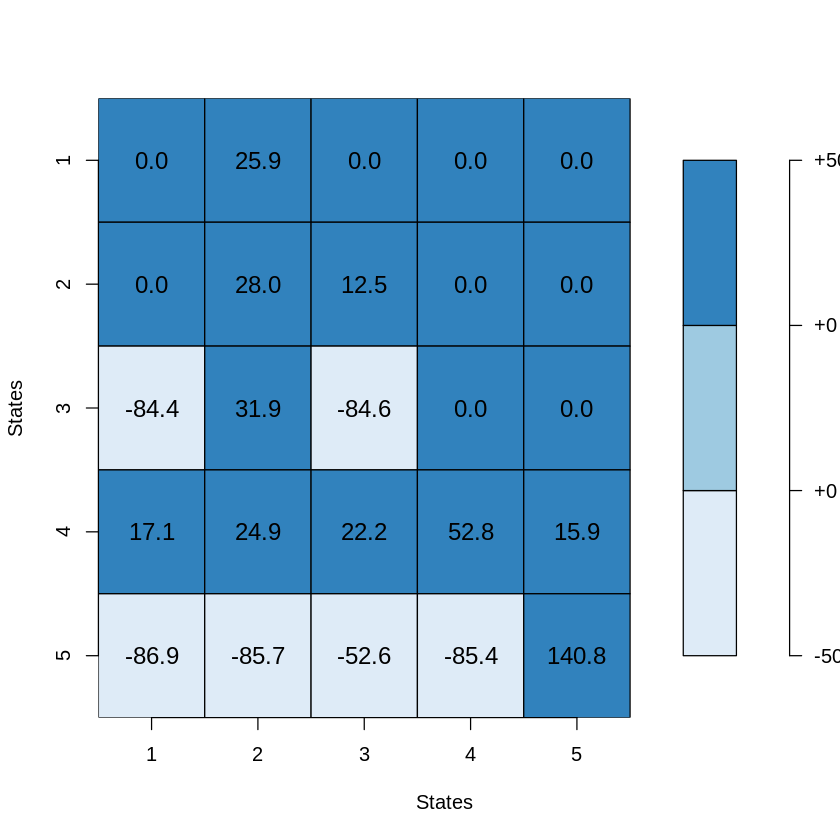



	Step no.:  6
		Current State:  7
		Reward CS:  10
		Possible next states:  2 6 8 12
		Next state:  12
		New Q-Value:  29.3

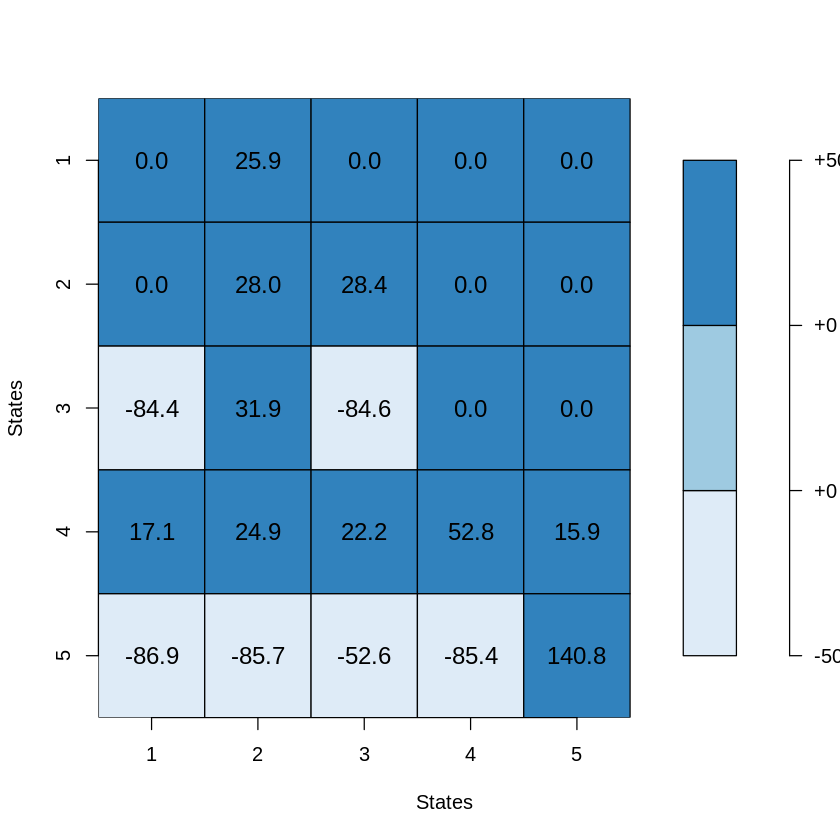



	Step no.:  7
		Current State:  12
		Reward CS:  10
		Possible next states:  7 11 13 17
		Next state:  11
		New Q-Value:  29.6

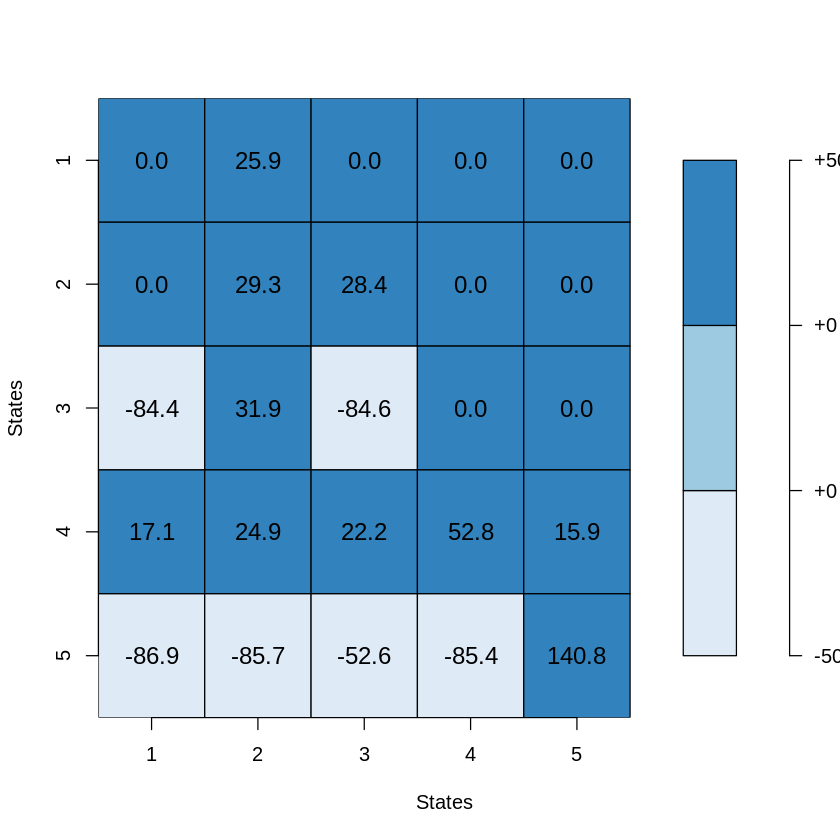



	Step no.:  8
		Current State:  11
		Reward CS:  10
		Possible next states:  6 12 16
		Next state:  16
		New Q-Value:  8

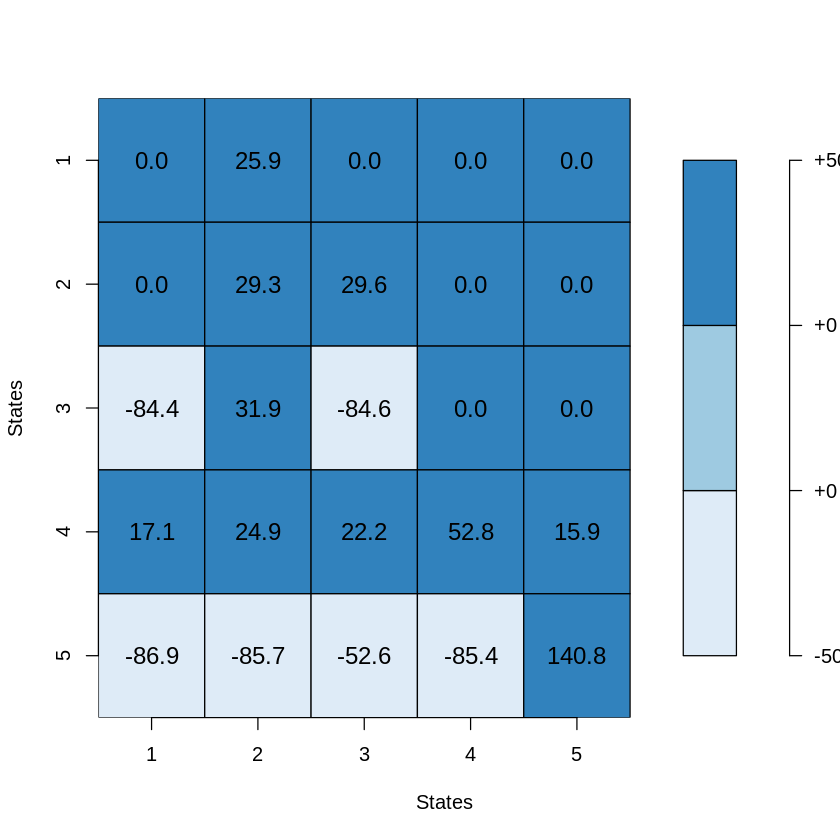



	Step no.:  9
		Current State:  16
		Reward CS:  10
		Possible next states:  11 17 21
		Next state:  11
		New Q-Value:  24.6

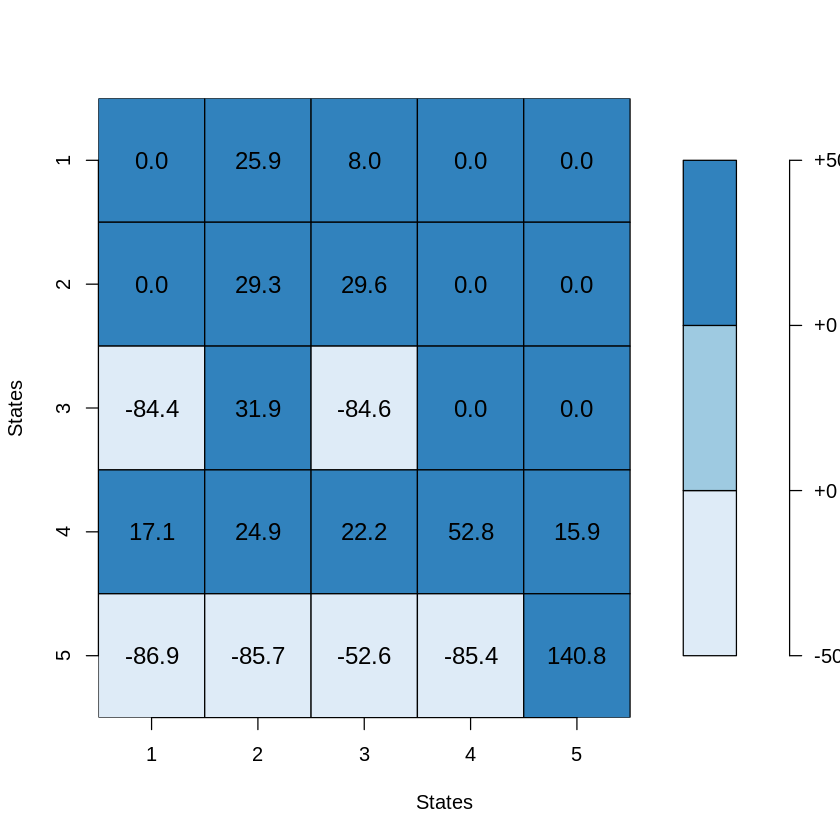



	Step no.:  10
		Current State:  11
		Reward CS:  10
		Possible next states:  6 12 16
		Next state:  16
		New Q-Value:  14.1

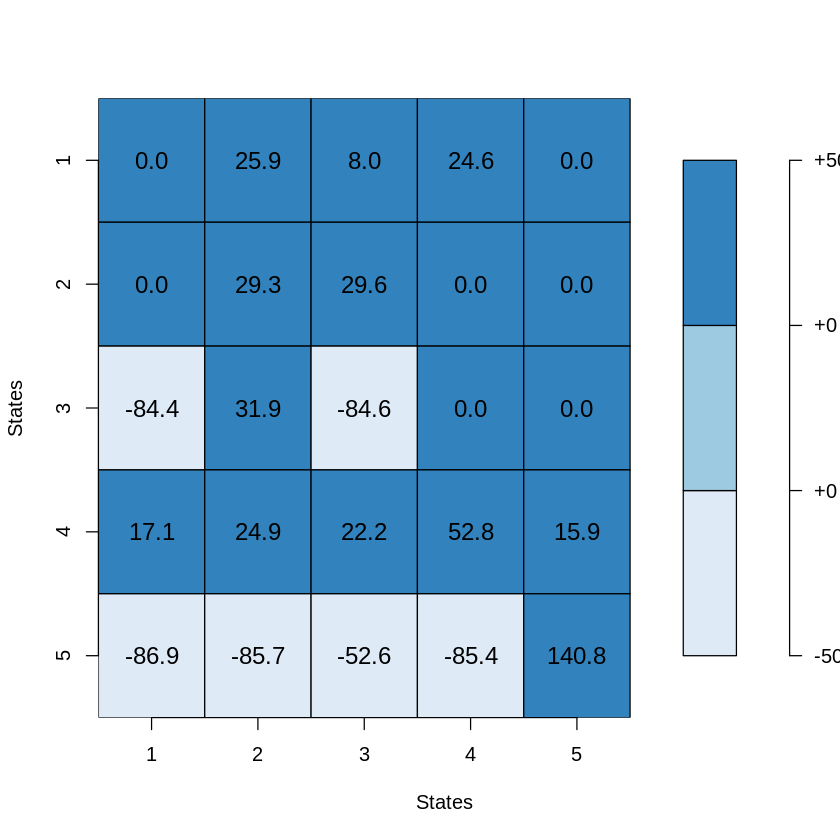



	Step no.:  11
		Current State:  16
		Reward CS:  10
		Possible next states:  11 17 21
		Next state:  17
		New Q-Value:  29.5

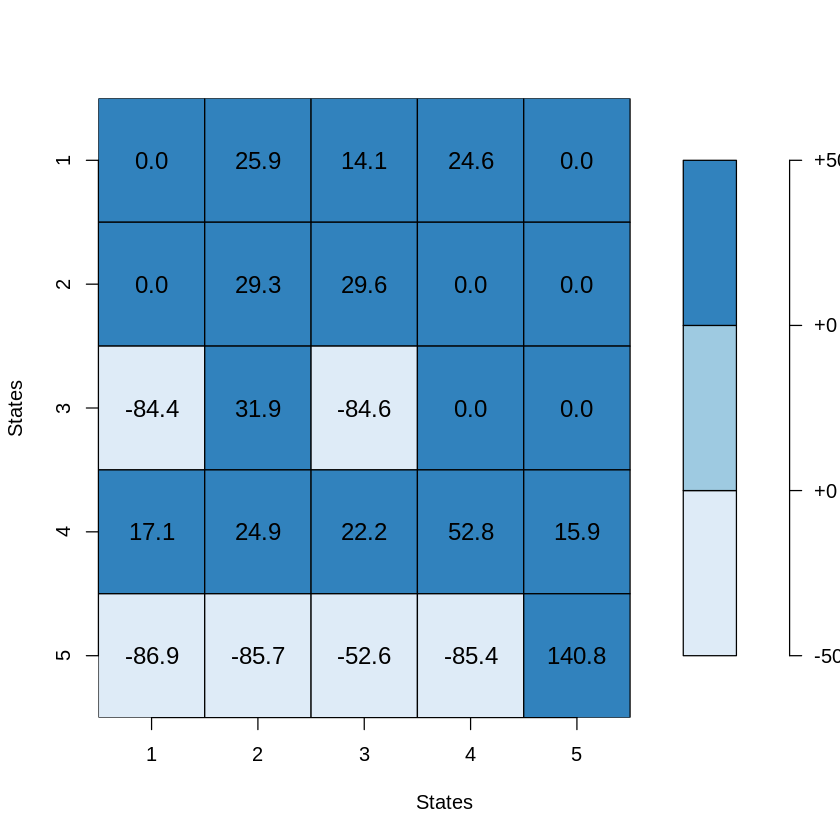



	Step no.:  12
		Current State:  17
		Reward CS:  10
		Possible next states:  12 16 18 22
		Next state:  22
		New Q-Value:  8

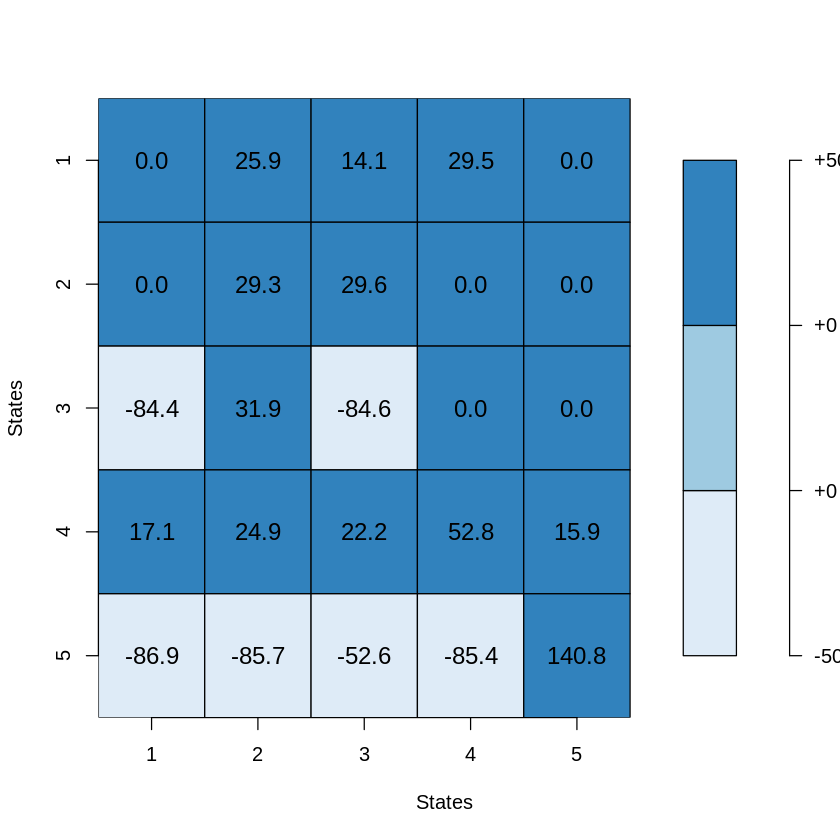



	Step no.:  13
		Current State:  22
		Reward CS:  -100
		Possible next states:  17 21 23
		Next state:  17
		New Q-Value:  -63.4

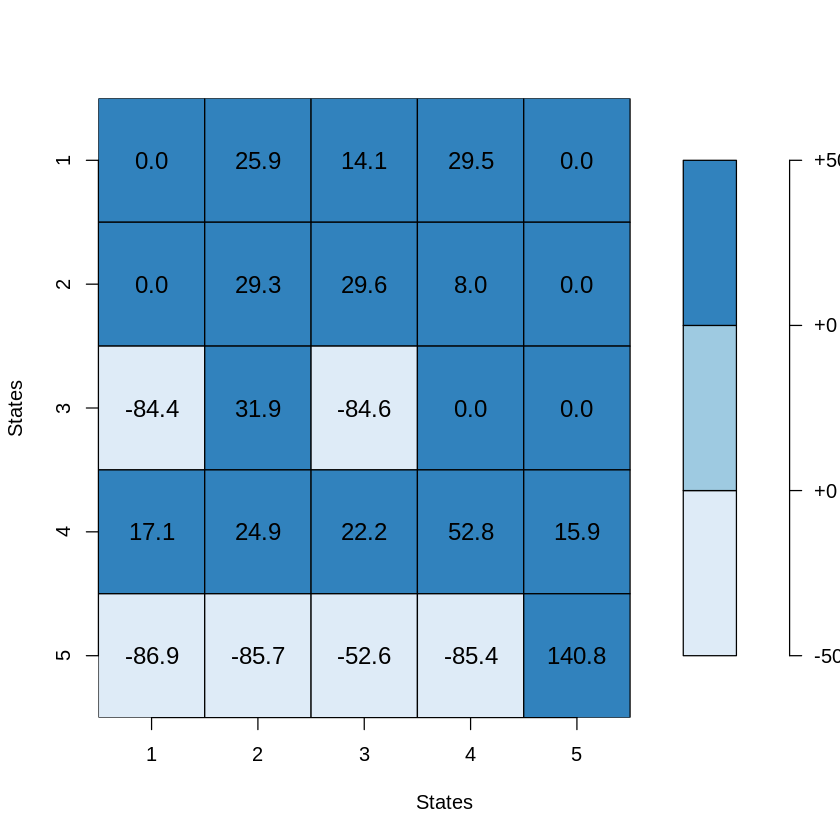



	Step no.:  14
		Current State:  17
		Reward CS:  10
		Possible next states:  12 16 18 22
		Next state:  22
		New Q-Value:  14.1

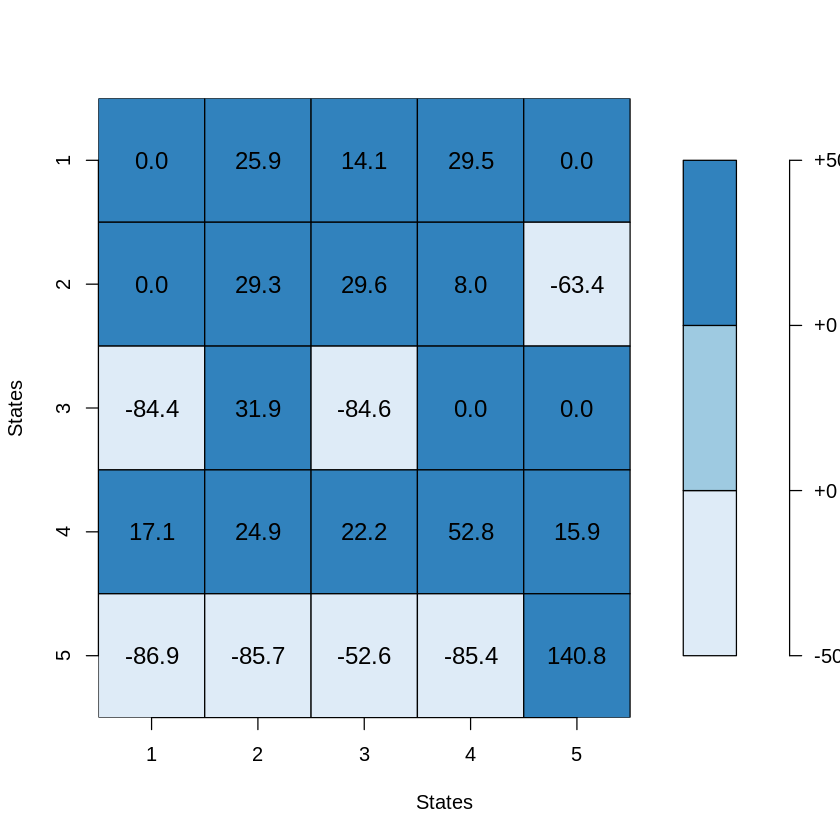



	Step no.:  15
		Current State:  22
		Reward CS:  -100
		Possible next states:  17 21 23
		Next state:  17
		New Q-Value:  -76.1

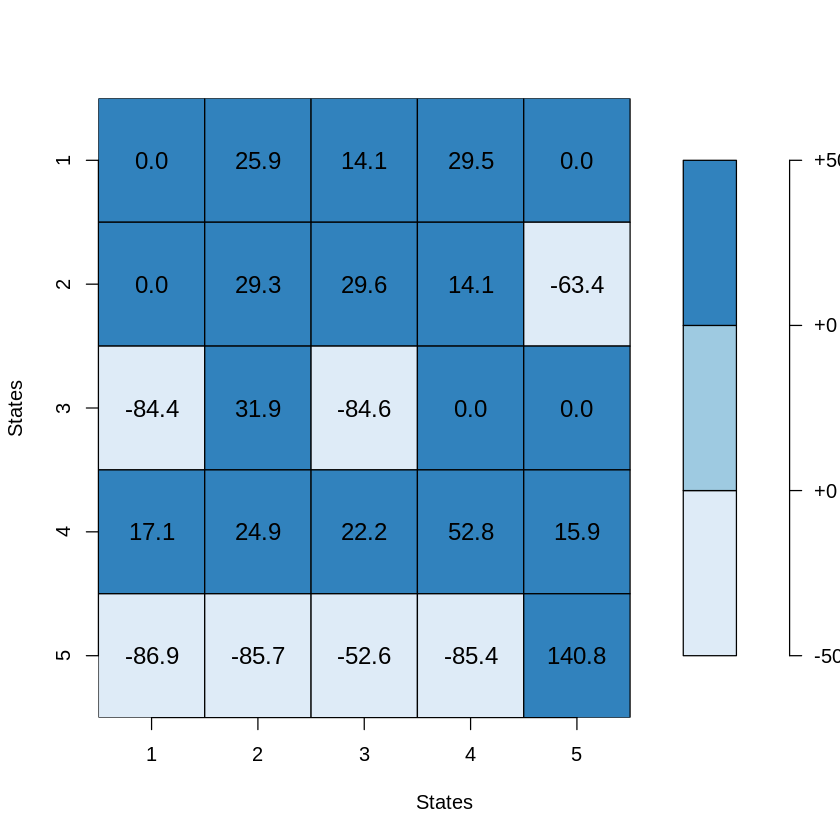



	Step no.:  16
		Current State:  17
		Reward CS:  10
		Possible next states:  12 16 18 22
		Next state:  18
		New Q-Value:  40.4

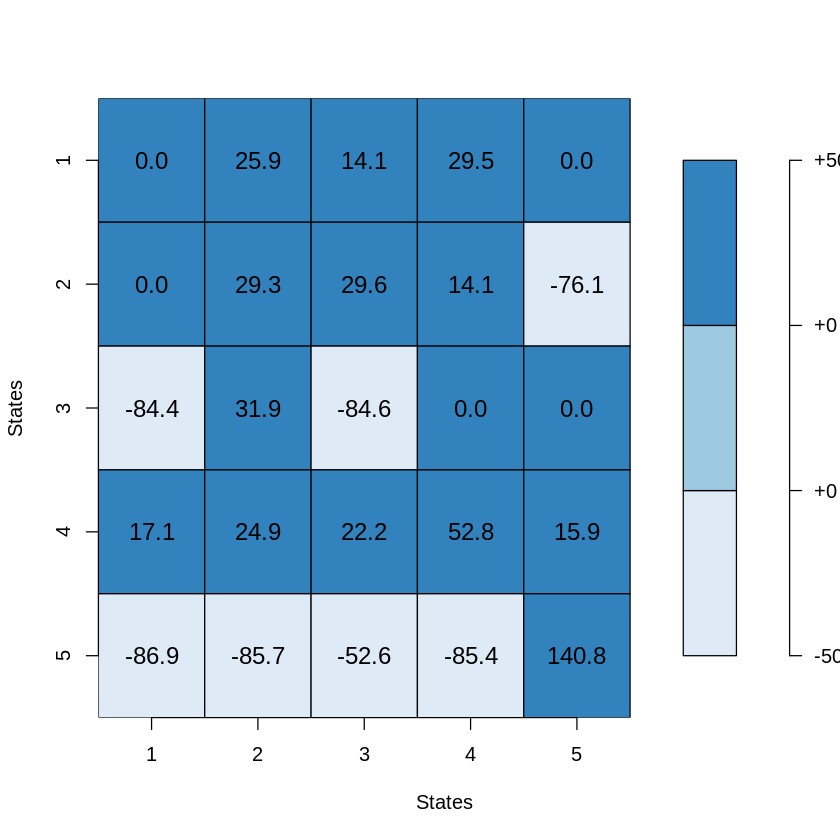



	Step no.:  17
		Current State:  18
		Reward CS:  10
		Possible next states:  13 17 19 23
		Next state:  23
		New Q-Value:  16.9

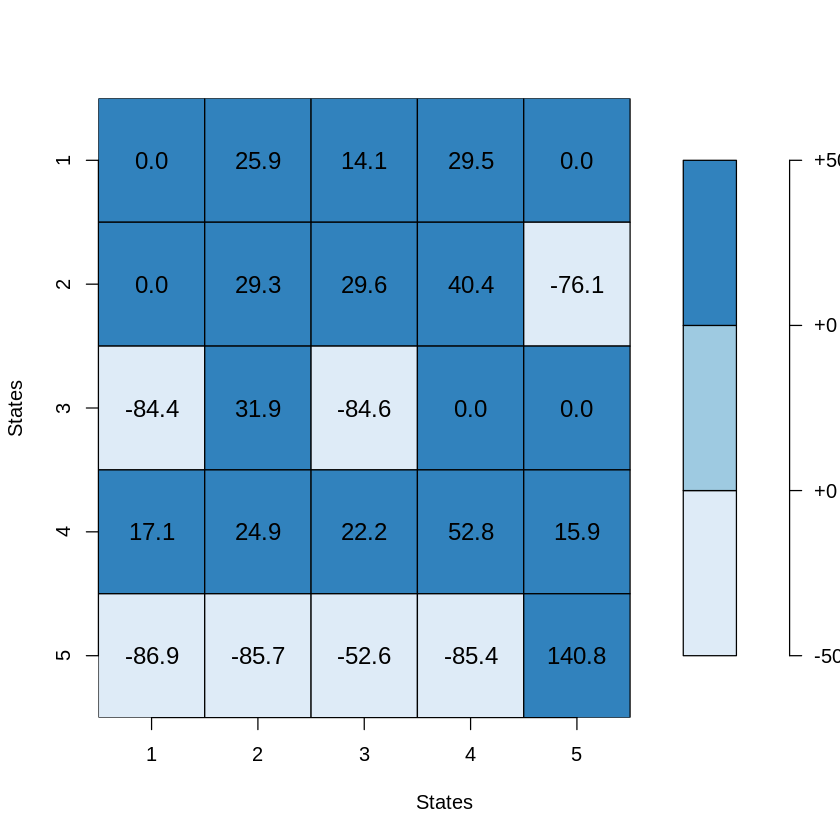



	Step no.:  18
		Current State:  23
		Reward CS:  10
		Possible next states:  18 22 24
		Next state:  18
		New Q-Value:  37.6

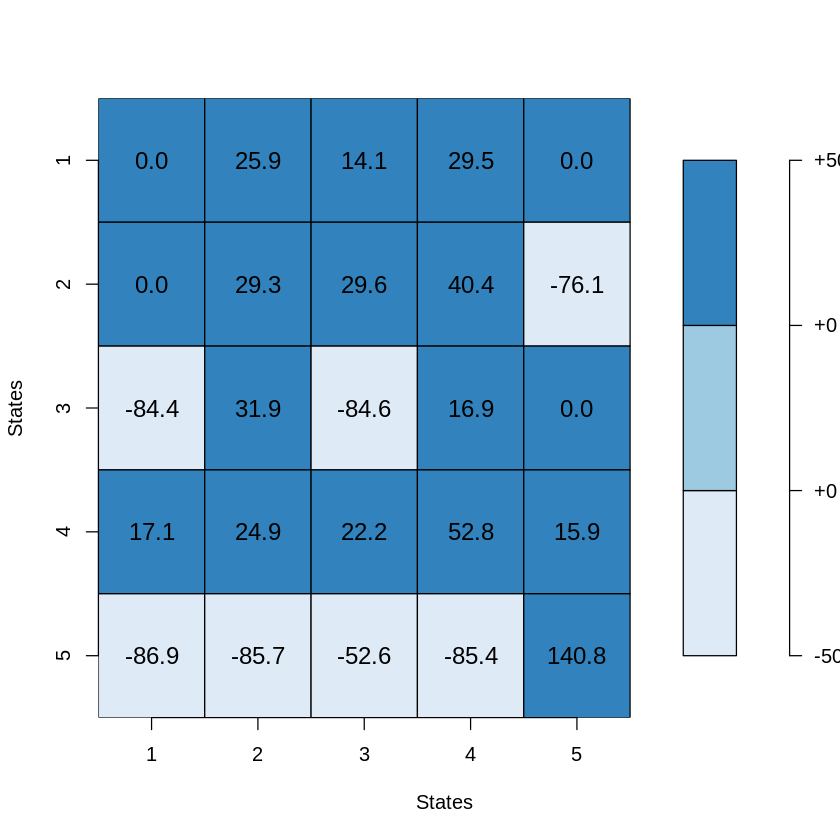



	Step no.:  19
		Current State:  18
		Reward CS:  10
		Possible next states:  13 17 19 23
		Next state:  17
		New Q-Value:  28

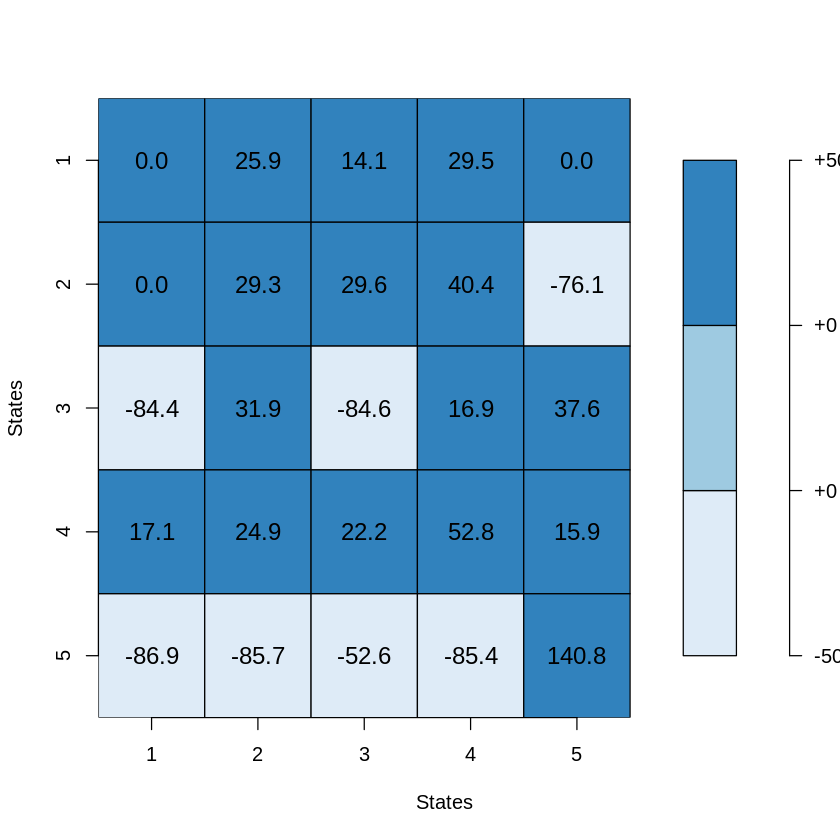



	Step no.:  20
		Current State:  17
		Reward CS:  10
		Possible next states:  12 16 18 22
		Next state:  22
		New Q-Value:  38.7

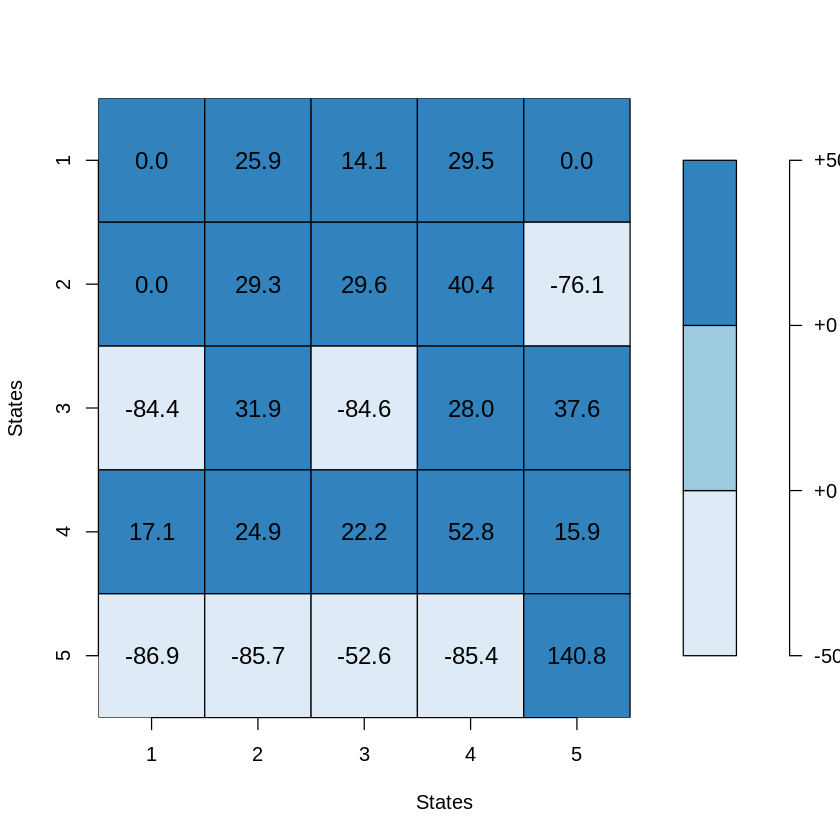



	Step no.:  21
		Current State:  22
		Reward CS:  -100
		Possible next states:  17 21 23
		Next state:  17
		New Q-Value:  -78.6

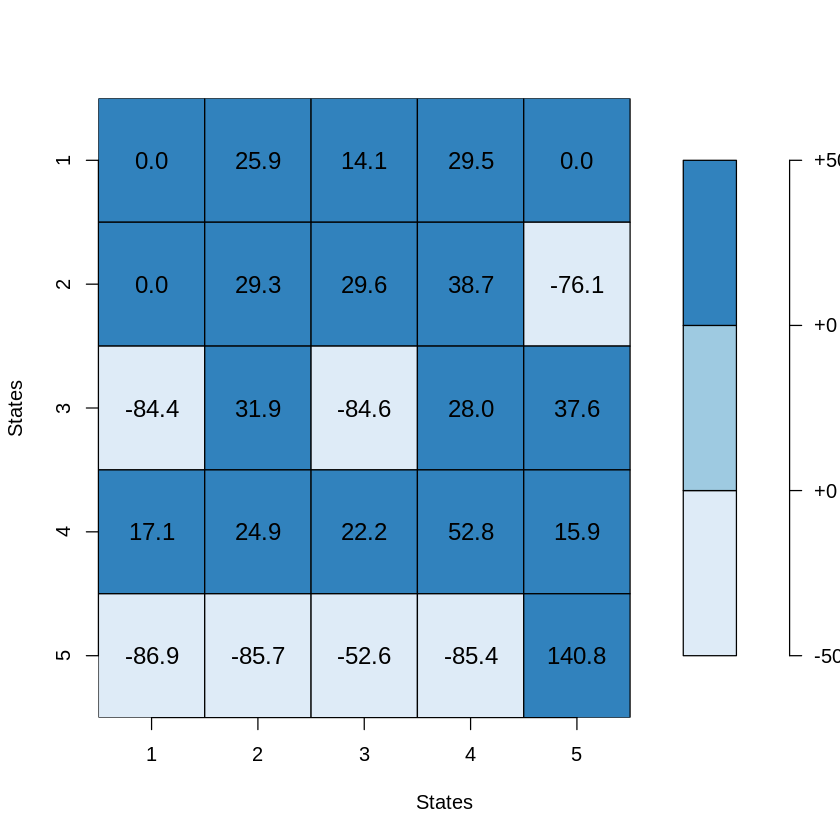


End Episode:  5
Start Episode:  6
	Current state:  1

	Step no.:  1
		Current State:  1
		Reward CS:  0
		Possible next states:  2 6
		Next state:  2
		New Q-Value:  16.4

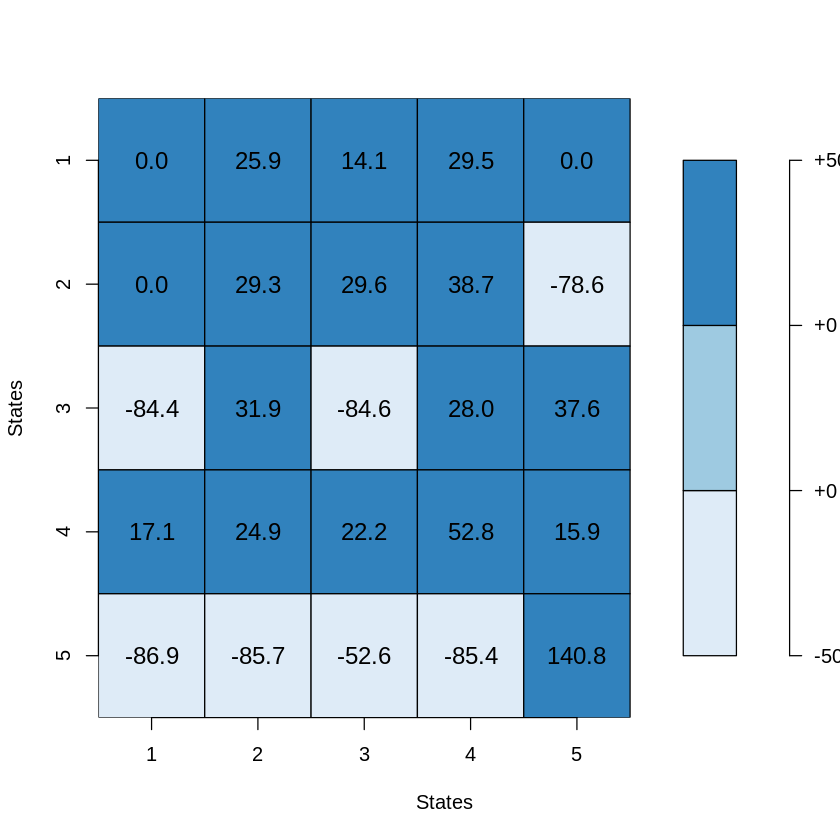



	Step no.:  2
		Current State:  2
		Reward CS:  -100
		Possible next states:  1 3 7
		Next state:  7
		New Q-Value:  -62.1

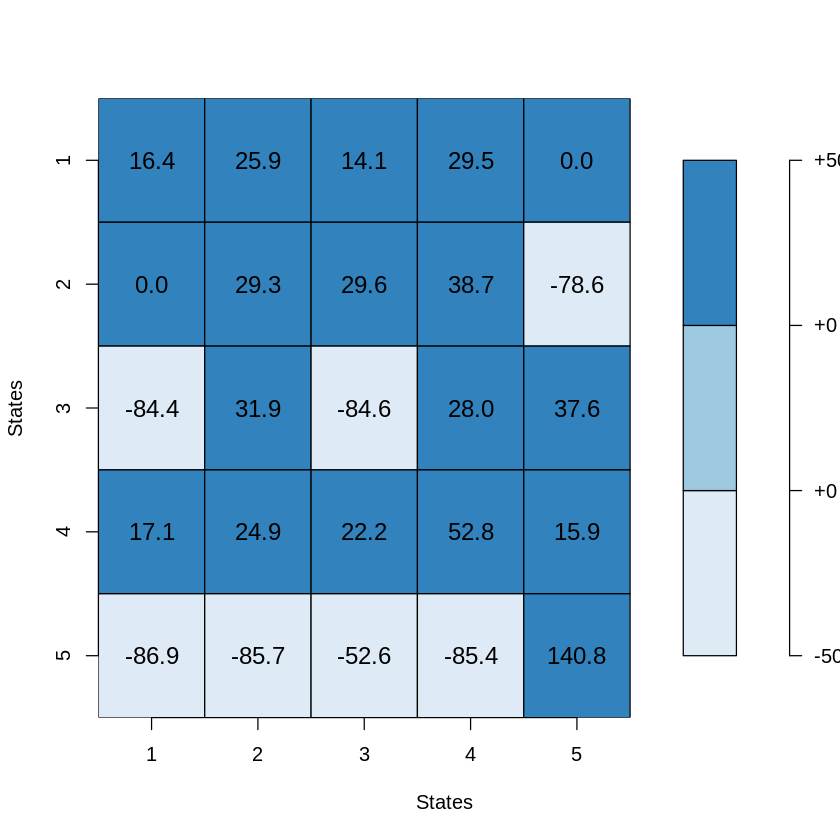



	Step no.:  3
		Current State:  7
		Reward CS:  10
		Possible next states:  2 6 8 12
		Next state:  6
		New Q-Value:  30.3

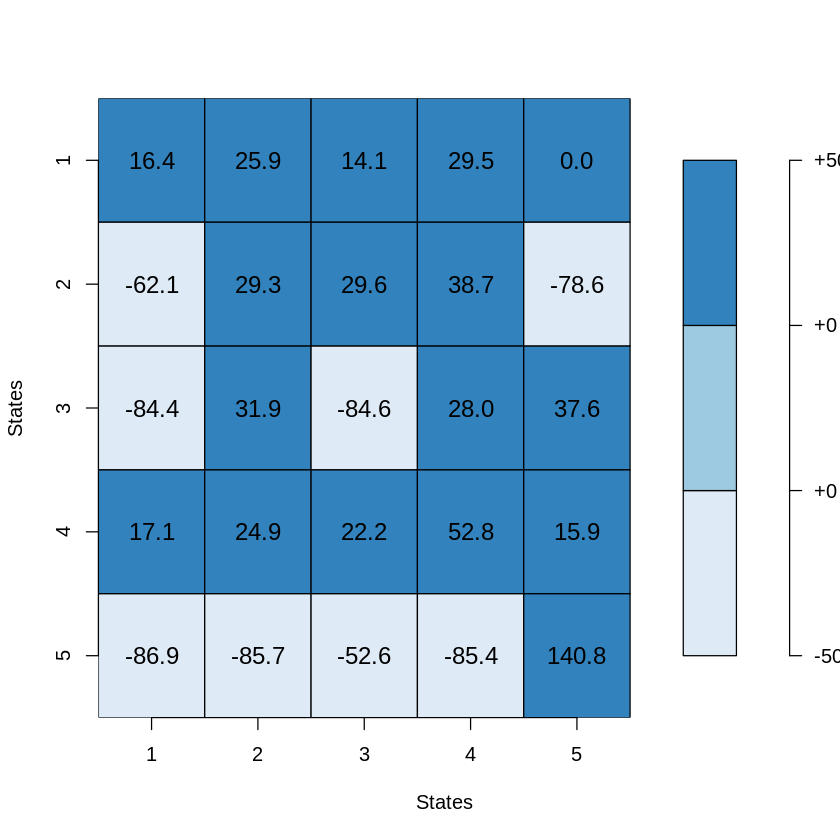



	Step no.:  4
		Current State:  6
		Reward CS:  10
		Possible next states:  1 7 11
		Next state:  1
		New Q-Value:  27.7

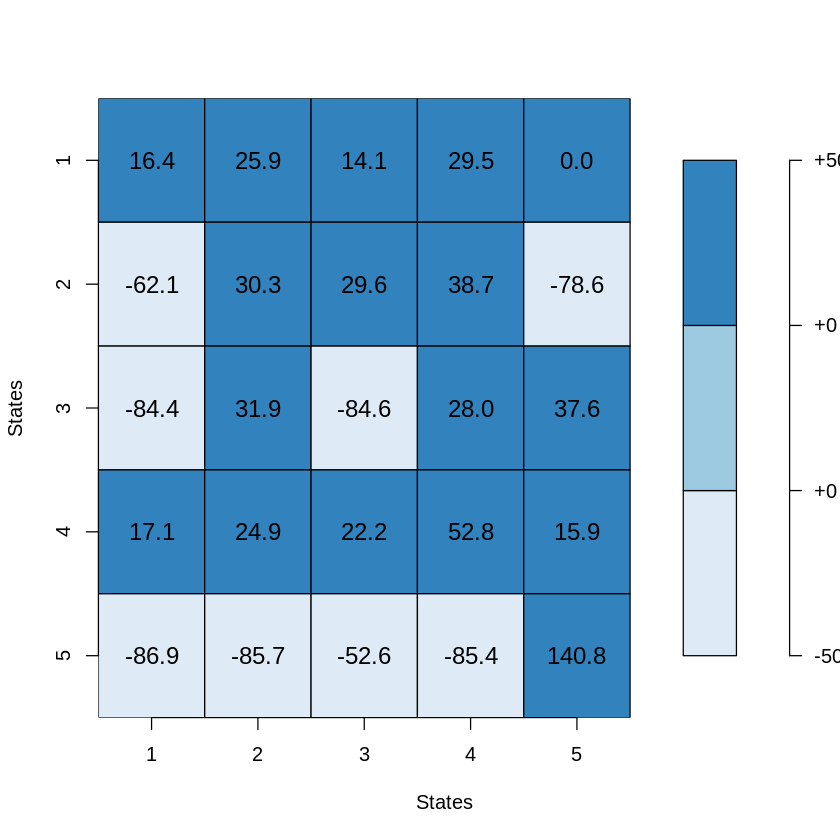



	Step no.:  5
		Current State:  1
		Reward CS:  0
		Possible next states:  2 6
		Next state:  2
		New Q-Value:  20.2

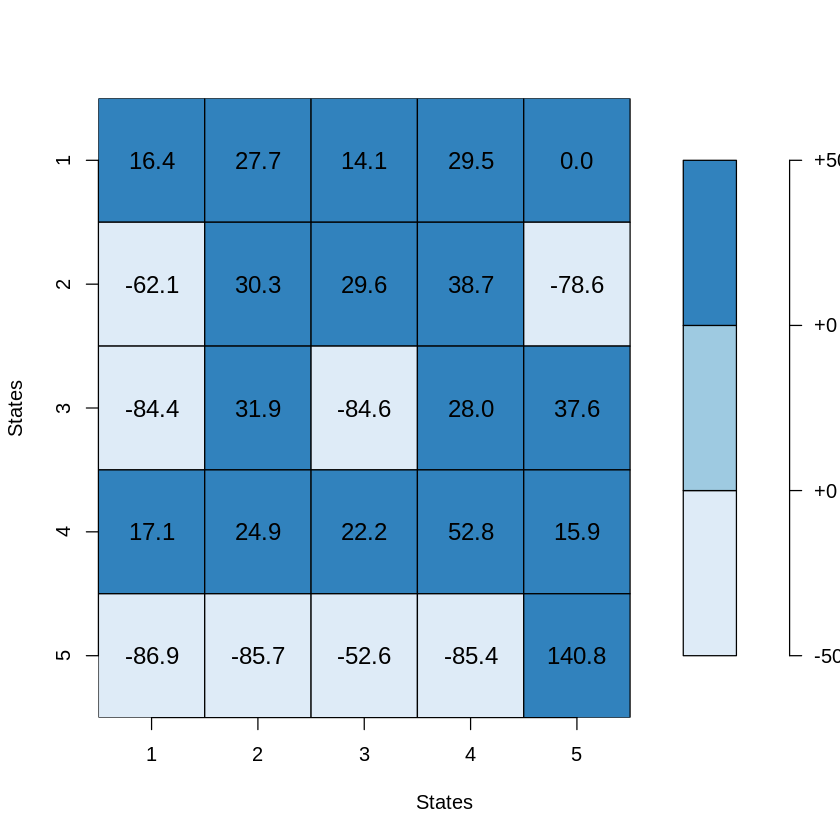



	Step no.:  6
		Current State:  2
		Reward CS:  -100
		Possible next states:  1 3 7
		Next state:  1
		New Q-Value:  -76.9

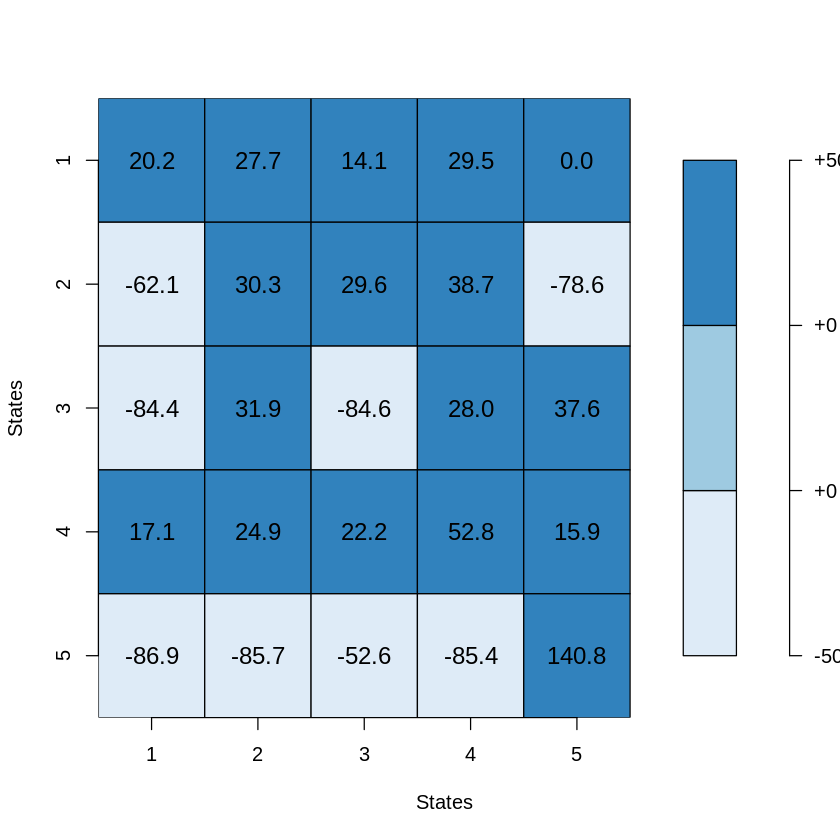



	Step no.:  7
		Current State:  1
		Reward CS:  0
		Possible next states:  2 6
		Next state:  2
		New Q-Value:  21

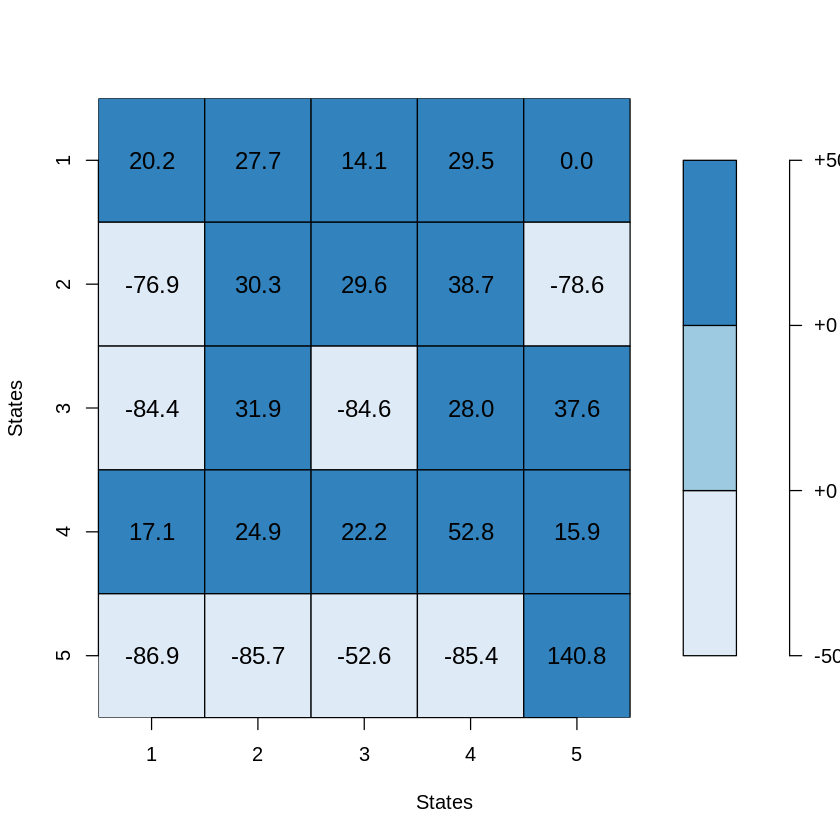



	Step no.:  8
		Current State:  2
		Reward CS:  -100
		Possible next states:  1 3 7
		Next state:  1
		New Q-Value:  -79.9

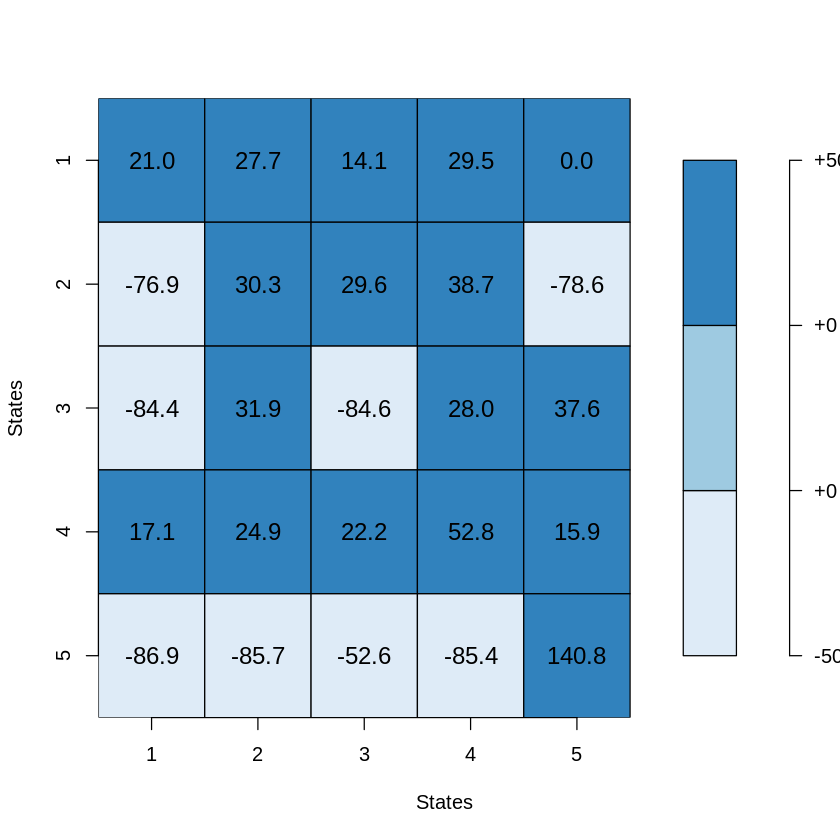



	Step no.:  9
		Current State:  1
		Reward CS:  0
		Possible next states:  2 6
		Next state:  2
		New Q-Value:  21.2

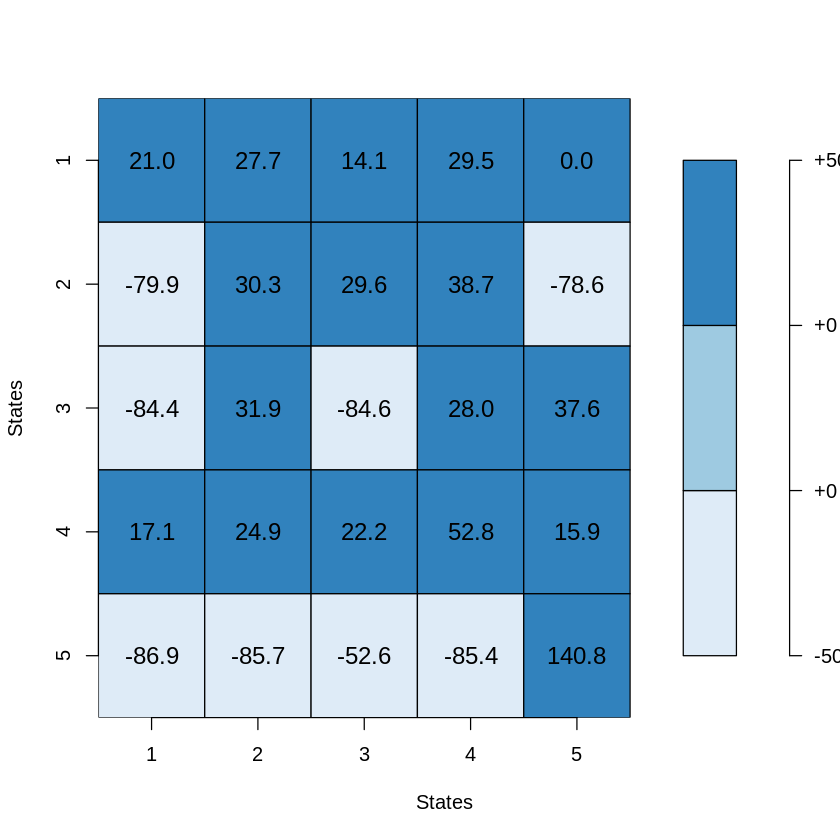



	Step no.:  10
		Current State:  2
		Reward CS:  -100
		Possible next states:  1 3 7
		Next state:  7
		New Q-Value:  -78.1

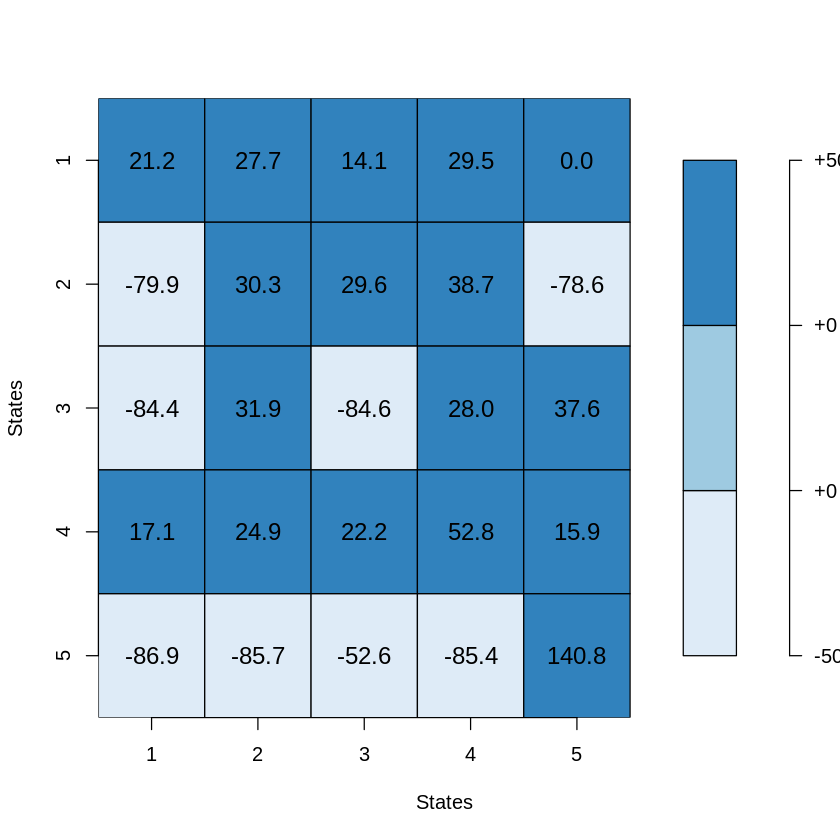



	Step no.:  11
		Current State:  7
		Reward CS:  10
		Possible next states:  2 6 8 12
		Next state:  2
		New Q-Value:  31

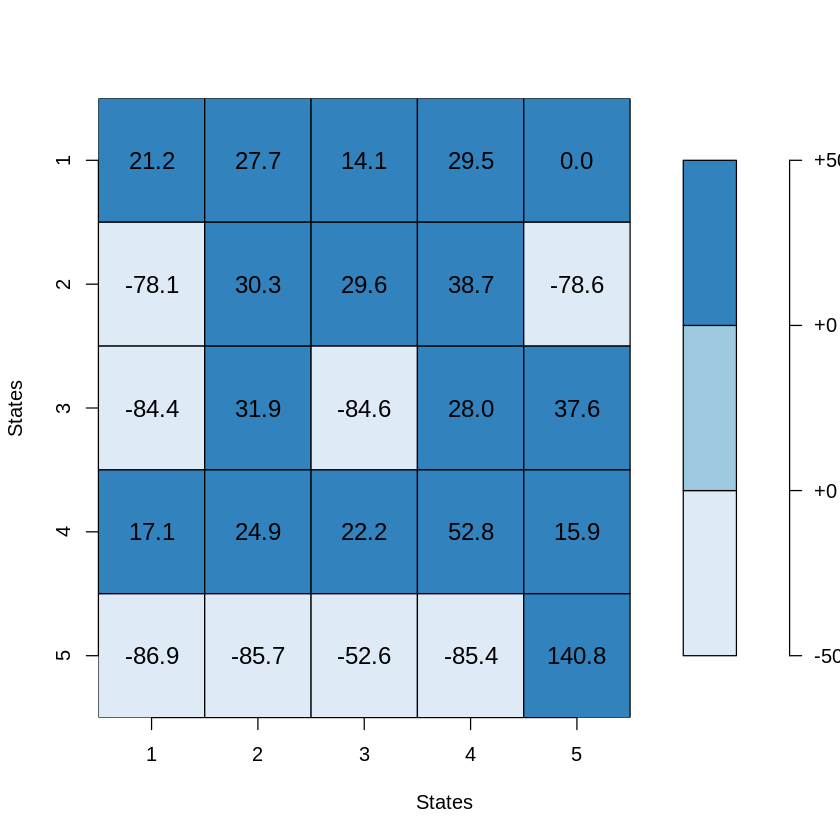



	Step no.:  12
		Current State:  2
		Reward CS:  -100
		Possible next states:  1 3 7
		Next state:  3
		New Q-Value:  -77.8

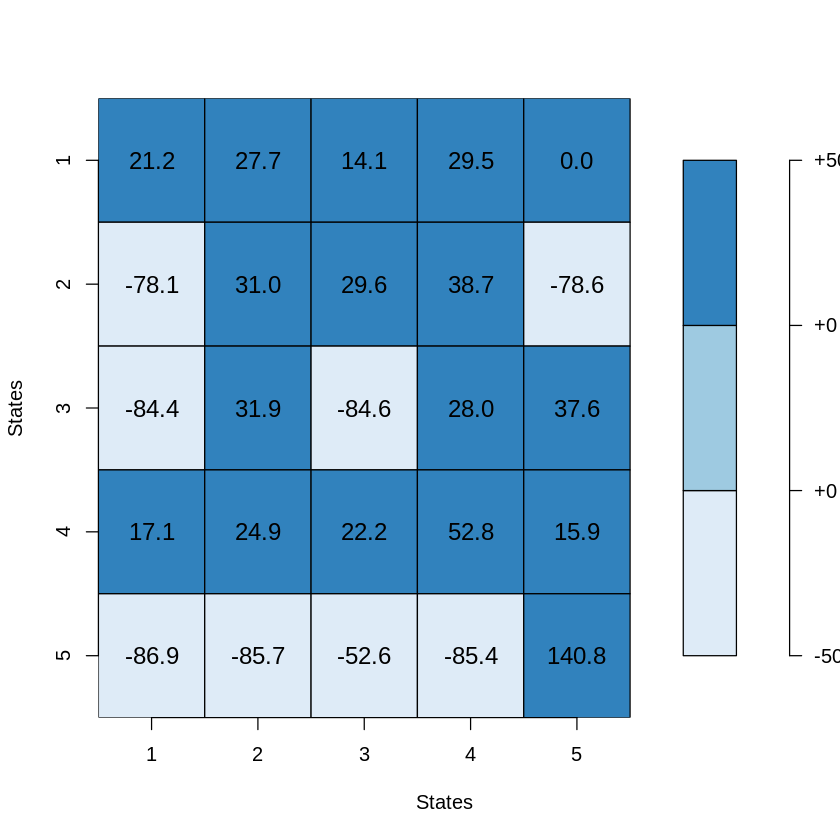



	Step no.:  13
		Current State:  3
		Reward CS:  -100
		Possible next states:  2 4 8
		Next state:  4
		New Q-Value:  -82.9

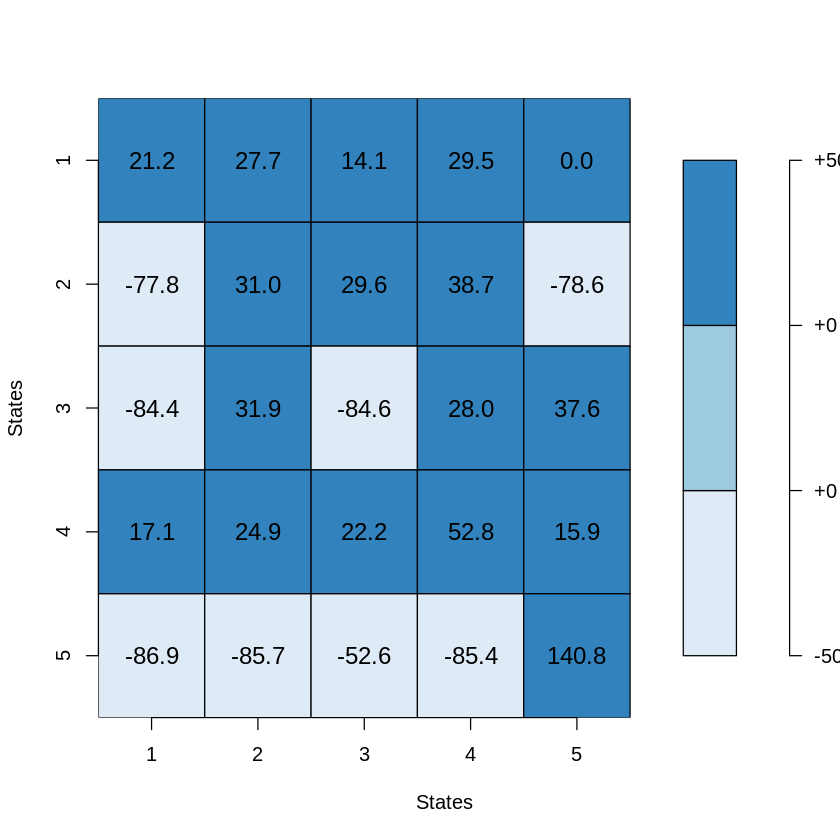



	Step no.:  14
		Current State:  4
		Reward CS:  0
		Possible next states:  3 5 9
		Next state:  3
		New Q-Value:  21.3

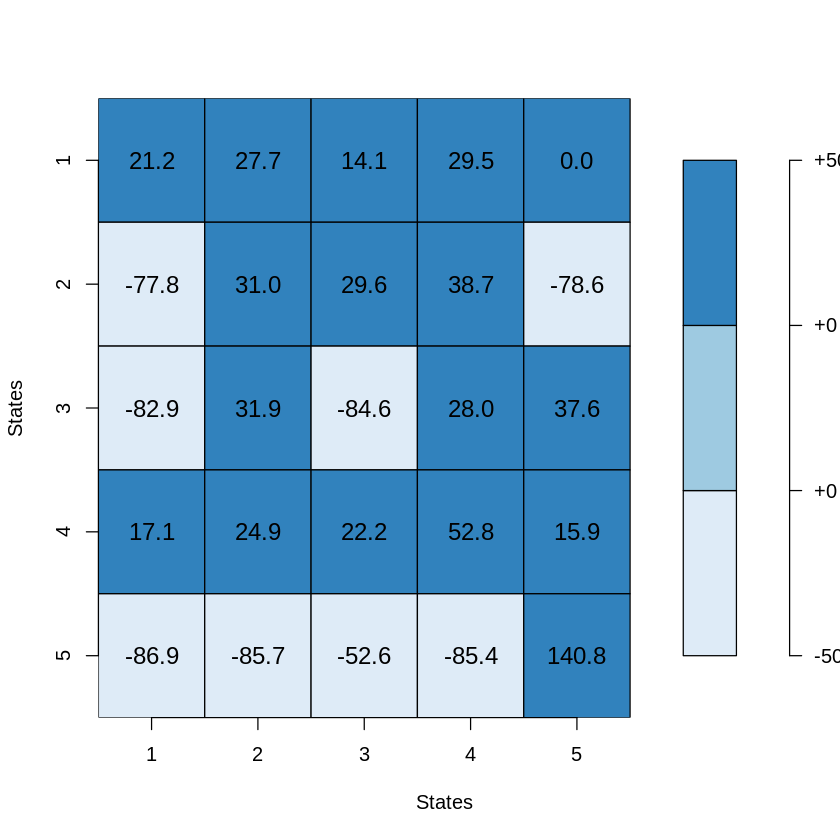



	Step no.:  15
		Current State:  3
		Reward CS:  -100
		Possible next states:  2 4 8
		Next state:  2
		New Q-Value:  -79.2

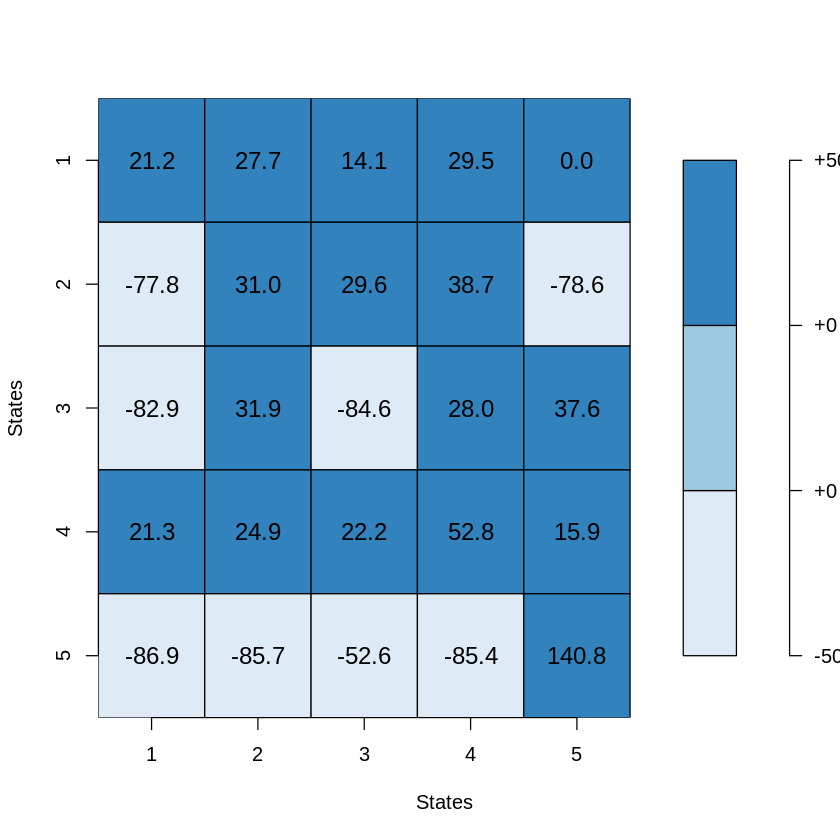



	Step no.:  16
		Current State:  2
		Reward CS:  -100
		Possible next states:  1 3 7
		Next state:  1
		New Q-Value:  -80

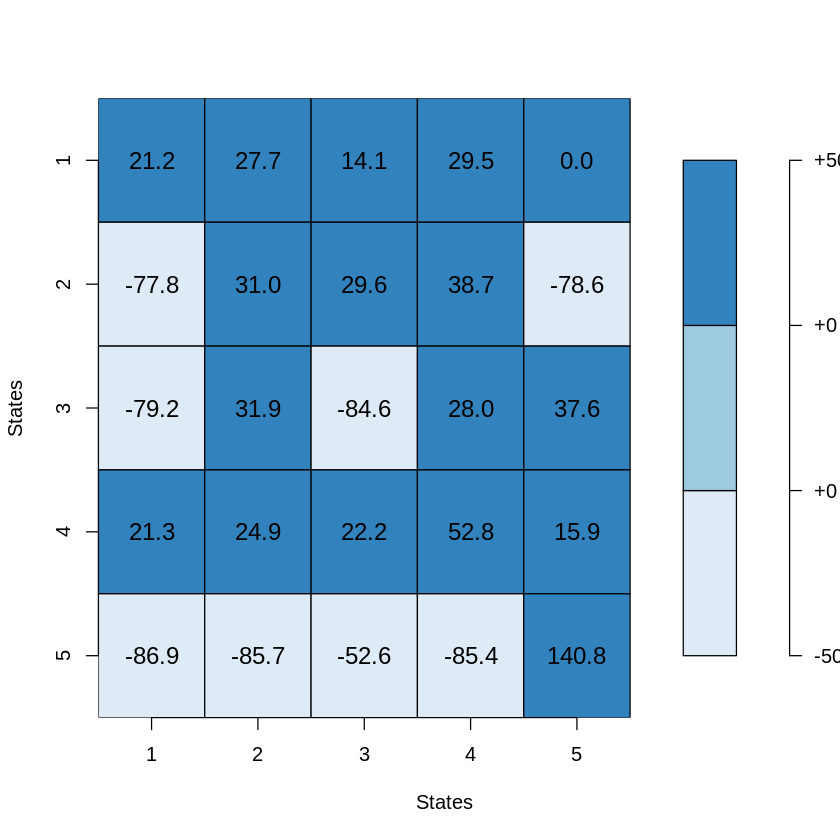



	Step no.:  17
		Current State:  1
		Reward CS:  0
		Possible next states:  2 6
		Next state:  6
		New Q-Value:  21.6

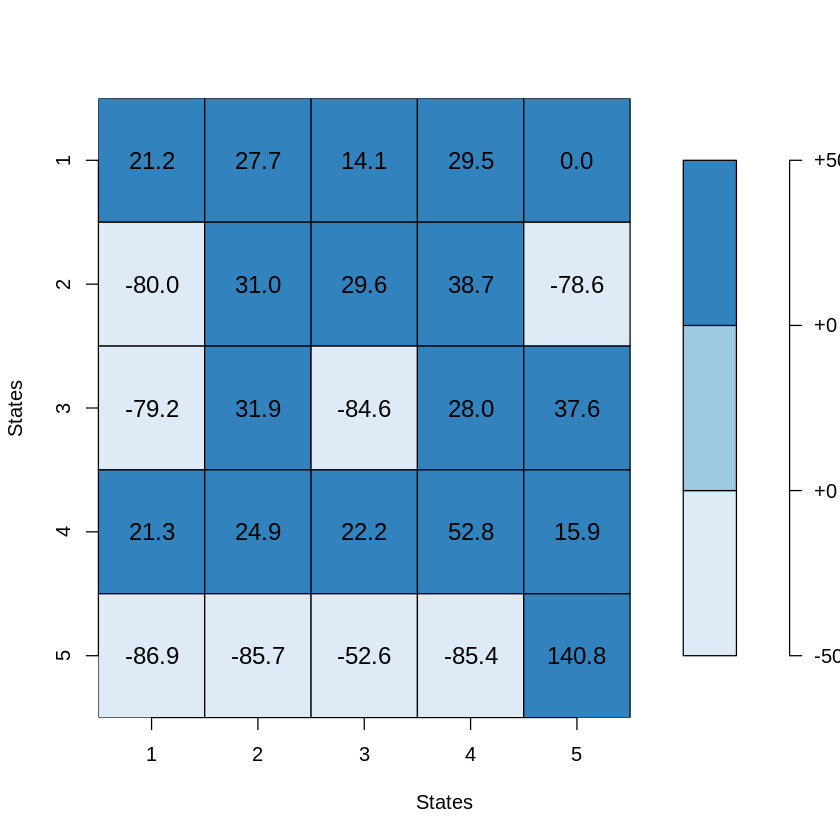



	Step no.:  18
		Current State:  6
		Reward CS:  10
		Possible next states:  1 7 11
		Next state:  11
		New Q-Value:  30.1

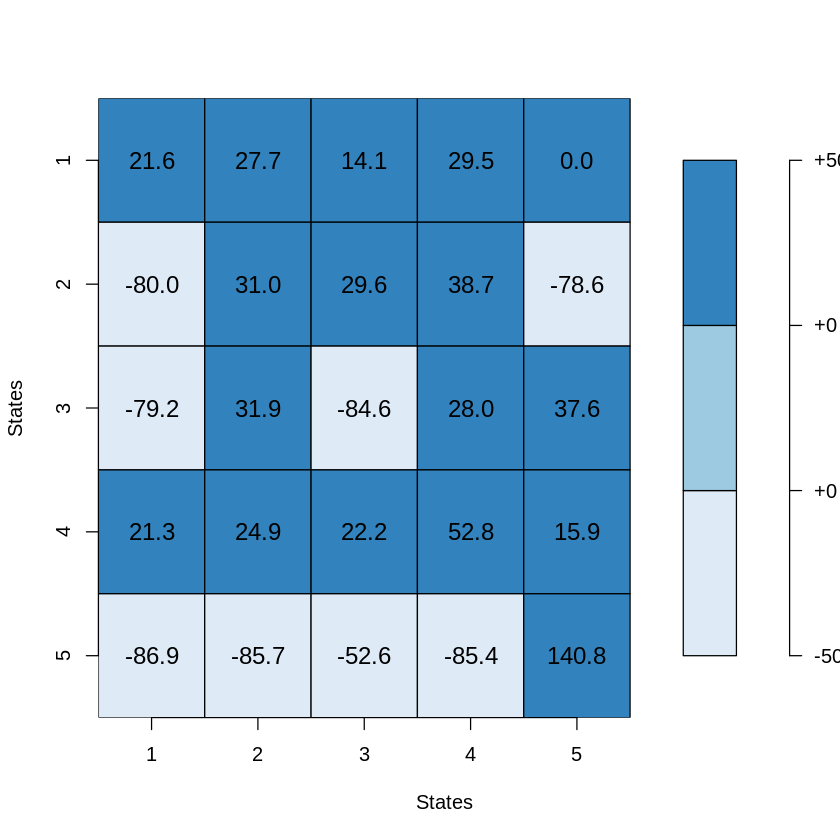



	Step no.:  19
		Current State:  11
		Reward CS:  10
		Possible next states:  6 12 16
		Next state:  6
		New Q-Value:  28.2

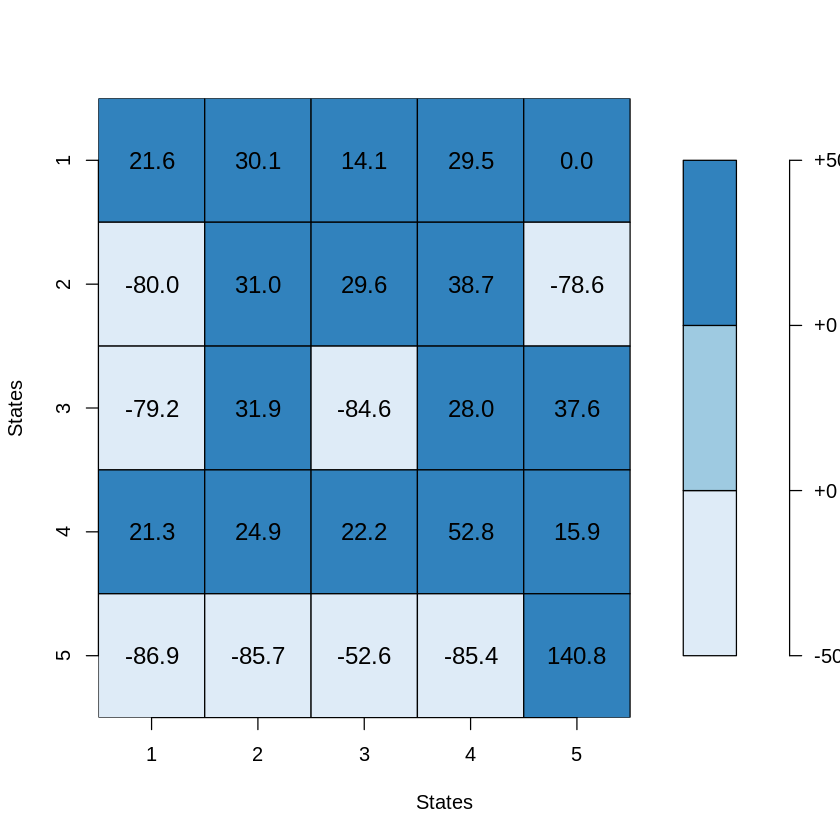



	Step no.:  20
		Current State:  6
		Reward CS:  10
		Possible next states:  1 7 11
		Next state:  1
		New Q-Value:  30.9

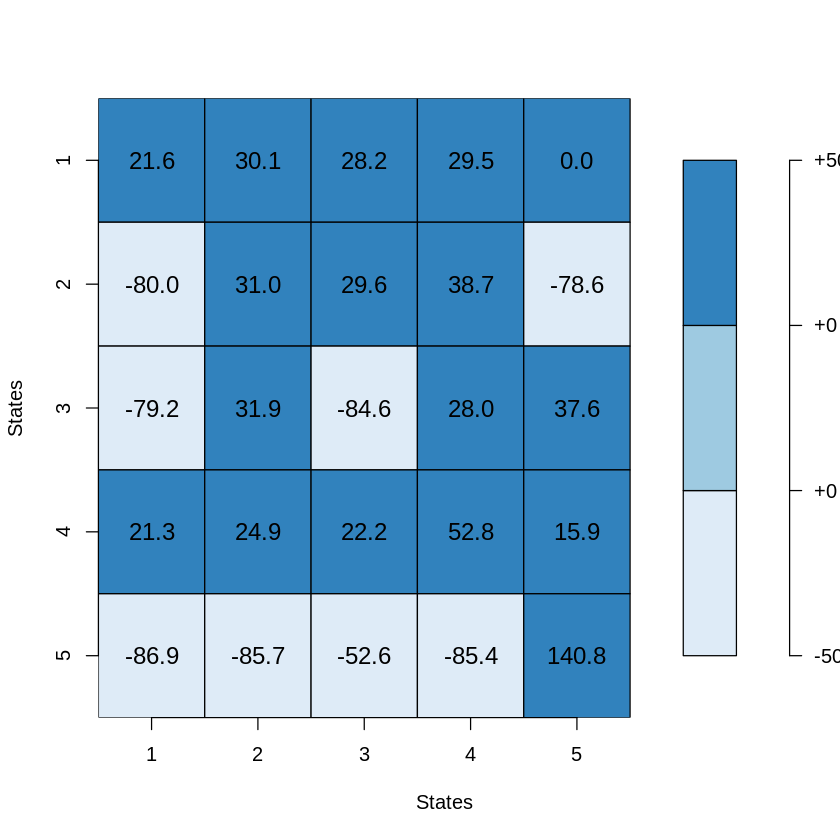



	Step no.:  21
		Current State:  1
		Reward CS:  0
		Possible next states:  2 6
		Next state:  6
		New Q-Value:  21.7

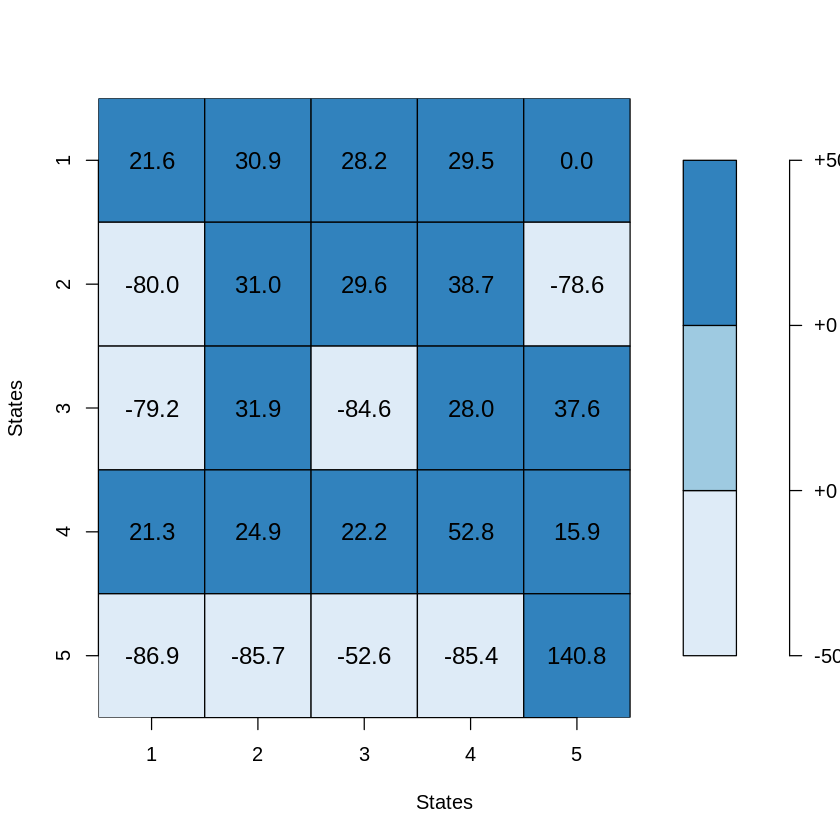


End Episode:  6
Start Episode:  7
	Current state:  4

	Step no.:  1
		Current State:  4
		Reward CS:  0
		Possible next states:  3 5 9
		Next state:  5
		New Q-Value:  16.2

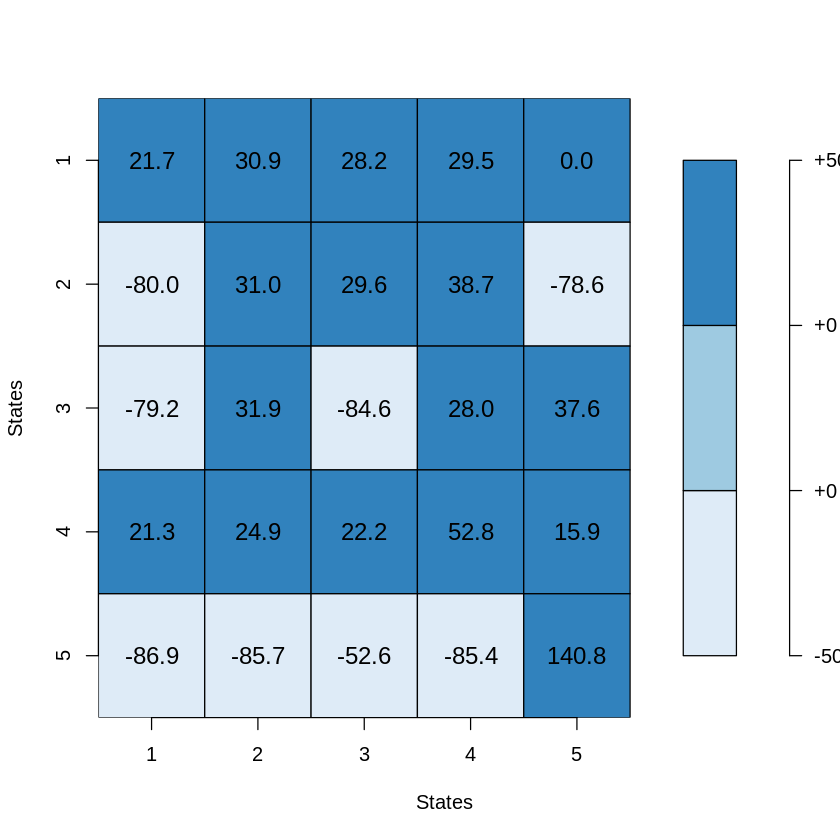



	Step no.:  2
		Current State:  5
		Reward CS:  -100
		Possible next states:  4 10
		Next state:  4
		New Q-Value:  -83.4

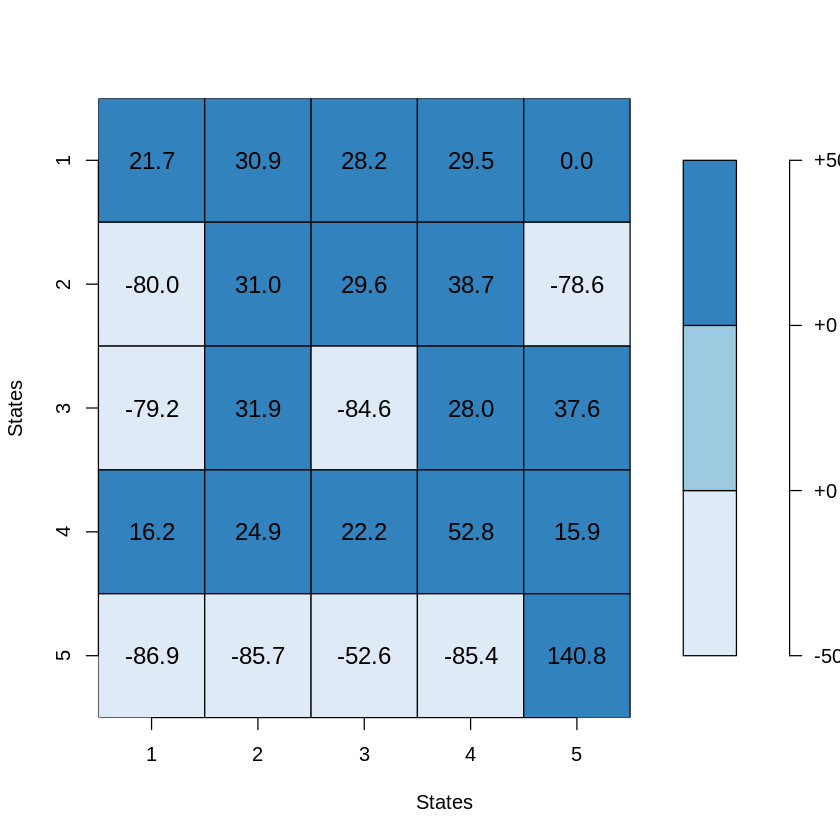



	Step no.:  3
		Current State:  4
		Reward CS:  0
		Possible next states:  3 5 9
		Next state:  5
		New Q-Value:  12.3

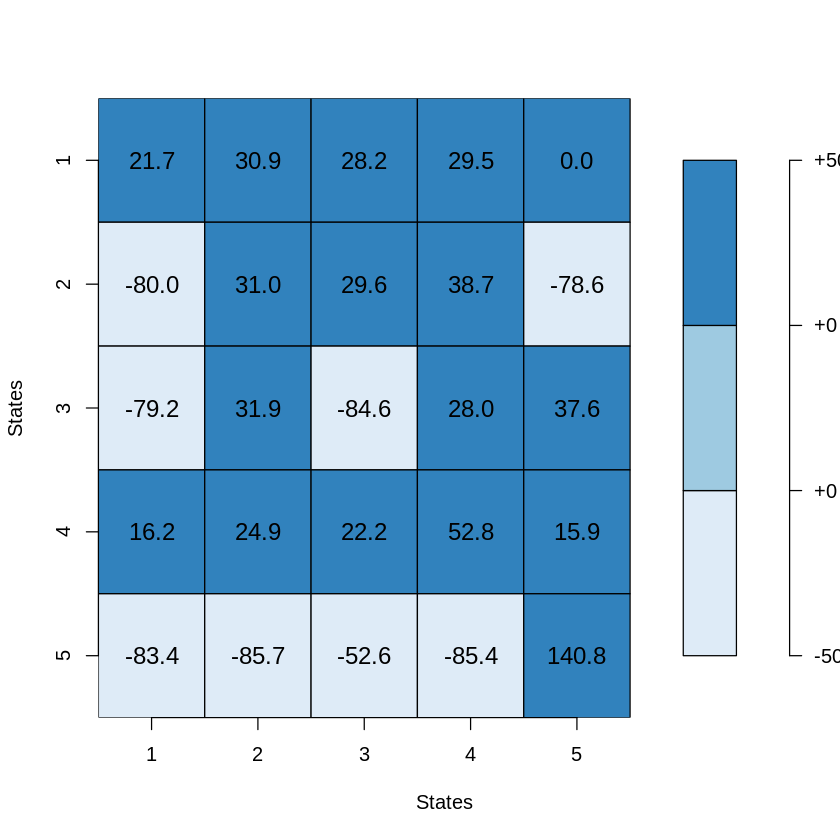



	Step no.:  4
		Current State:  5
		Reward CS:  -100
		Possible next states:  4 10
		Next state:  4
		New Q-Value:  -82.7

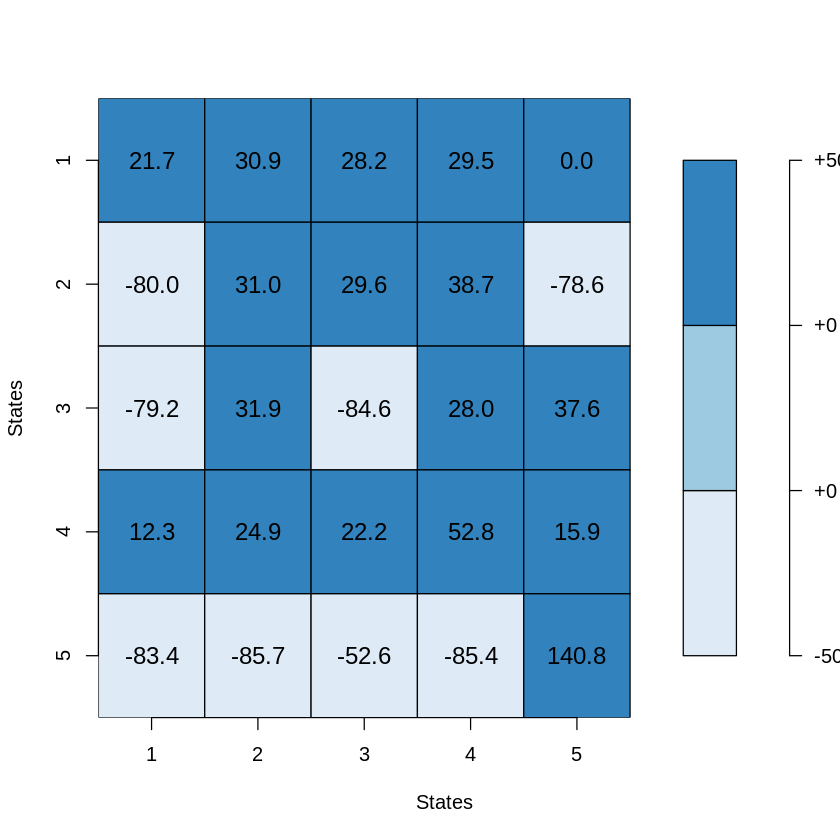



	Step no.:  5
		Current State:  4
		Reward CS:  0
		Possible next states:  3 5 9
		Next state:  9
		New Q-Value:  20.3

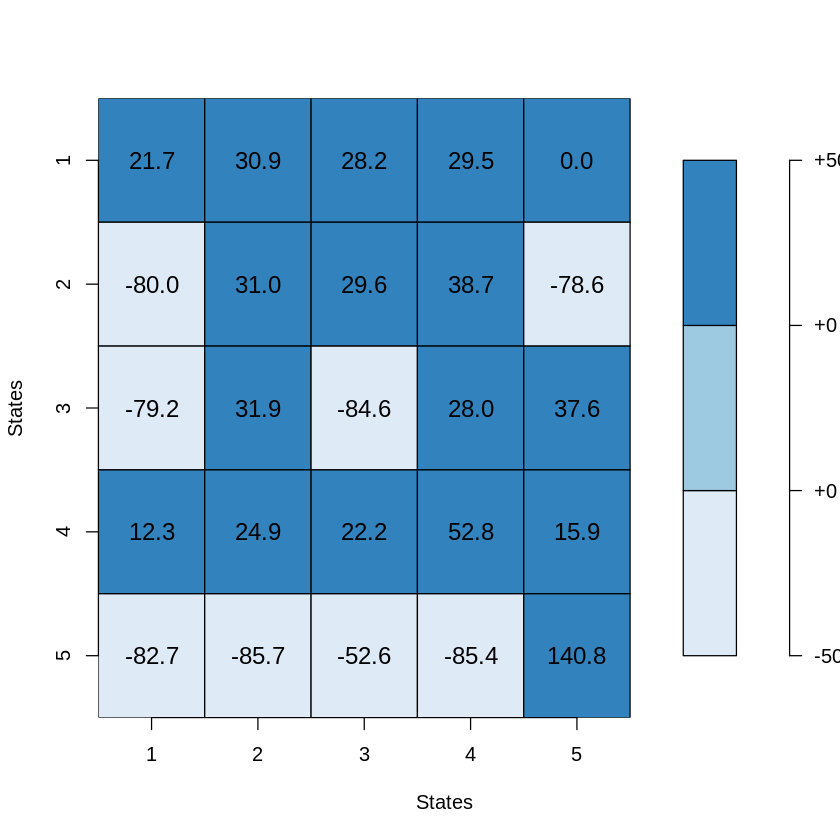



	Step no.:  6
		Current State:  9
		Reward CS:  10
		Possible next states:  4 8 10 14
		Next state:  8
		New Q-Value:  30.3

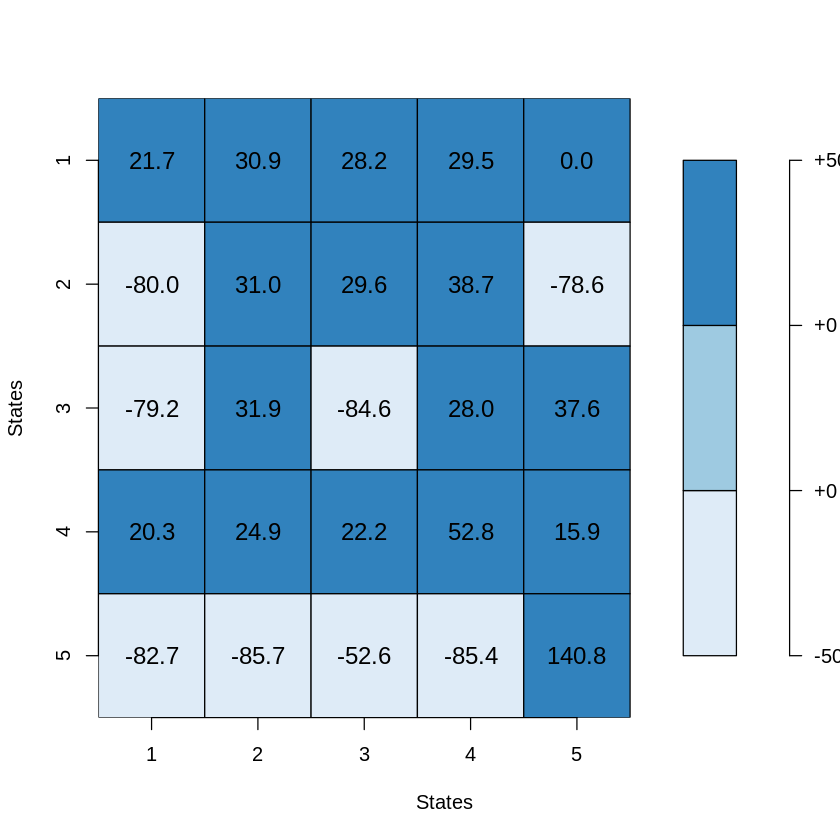



	Step no.:  7
		Current State:  8
		Reward CS:  10
		Possible next states:  3 7 9 13
		Next state:  3
		New Q-Value:  32.2

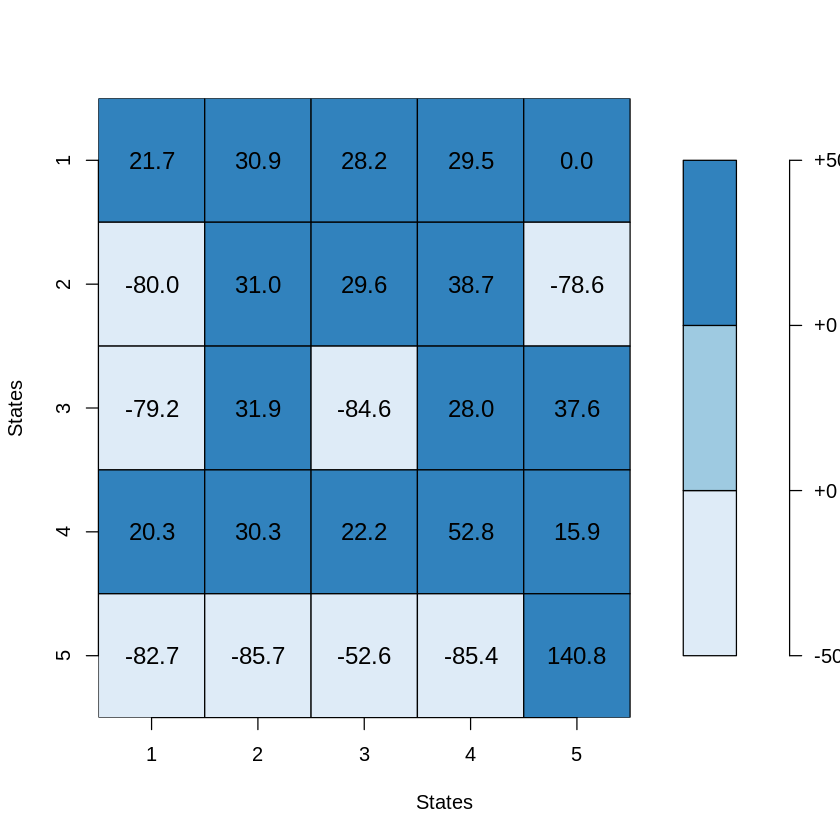



	Step no.:  8
		Current State:  3
		Reward CS:  -100
		Possible next states:  2 4 8
		Next state:  2
		New Q-Value:  -78.5

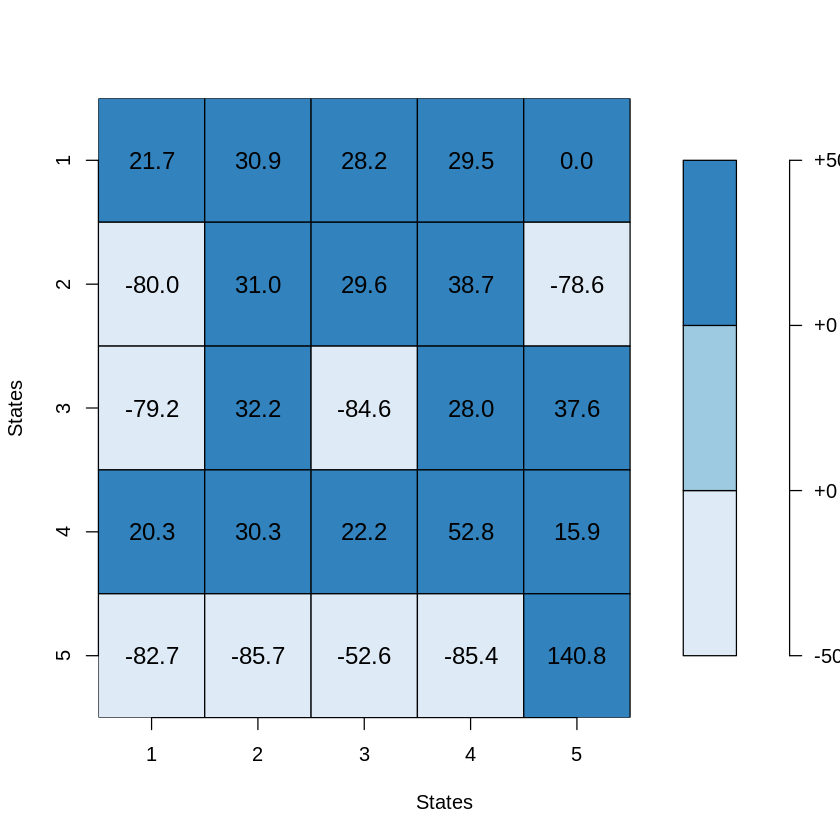



	Step no.:  9
		Current State:  2
		Reward CS:  -100
		Possible next states:  1 3 7
		Next state:  3
		New Q-Value:  -78

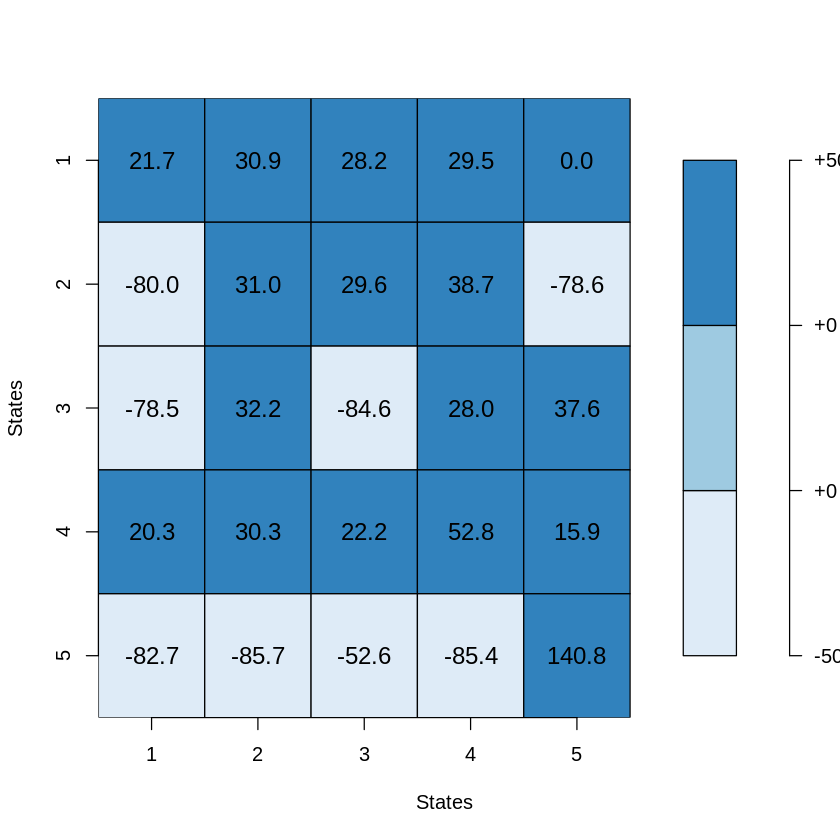



	Step no.:  10
		Current State:  3
		Reward CS:  -100
		Possible next states:  2 4 8
		Next state:  8
		New Q-Value:  -78.3

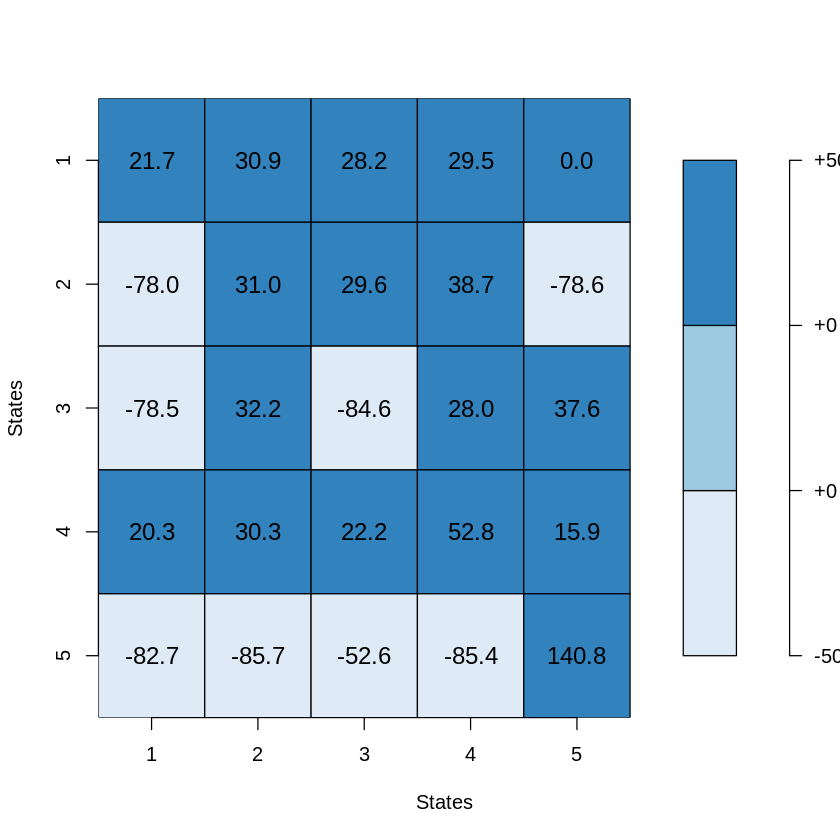



	Step no.:  11
		Current State:  8
		Reward CS:  10
		Possible next states:  3 7 9 13
		Next state:  7
		New Q-Value:  32.5

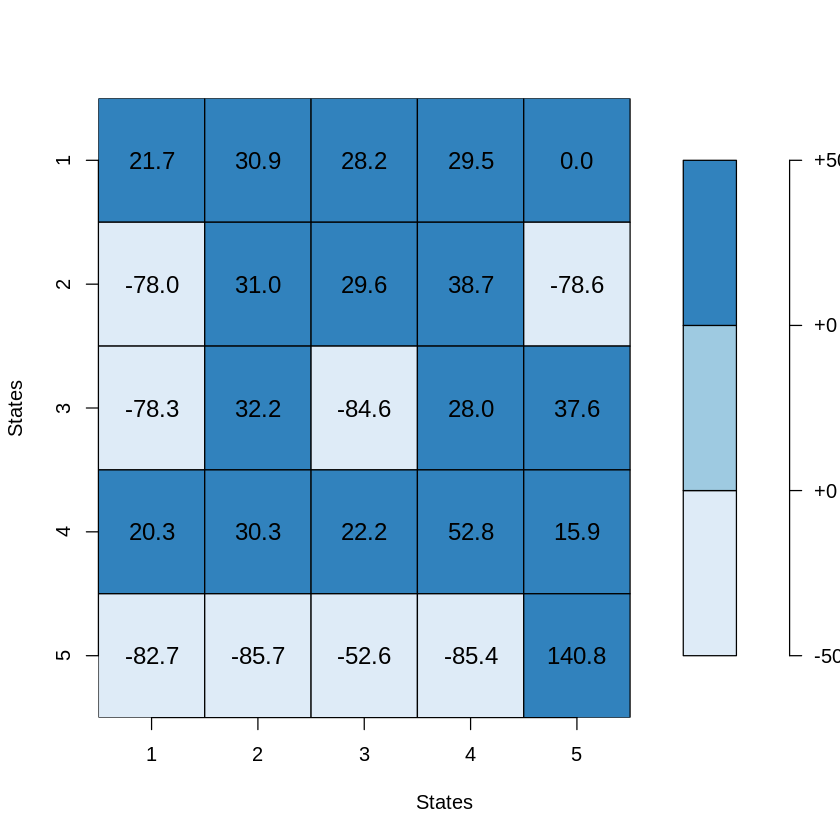



	Step no.:  12
		Current State:  7
		Reward CS:  10
		Possible next states:  2 6 8 12
		Next state:  6
		New Q-Value:  31.6

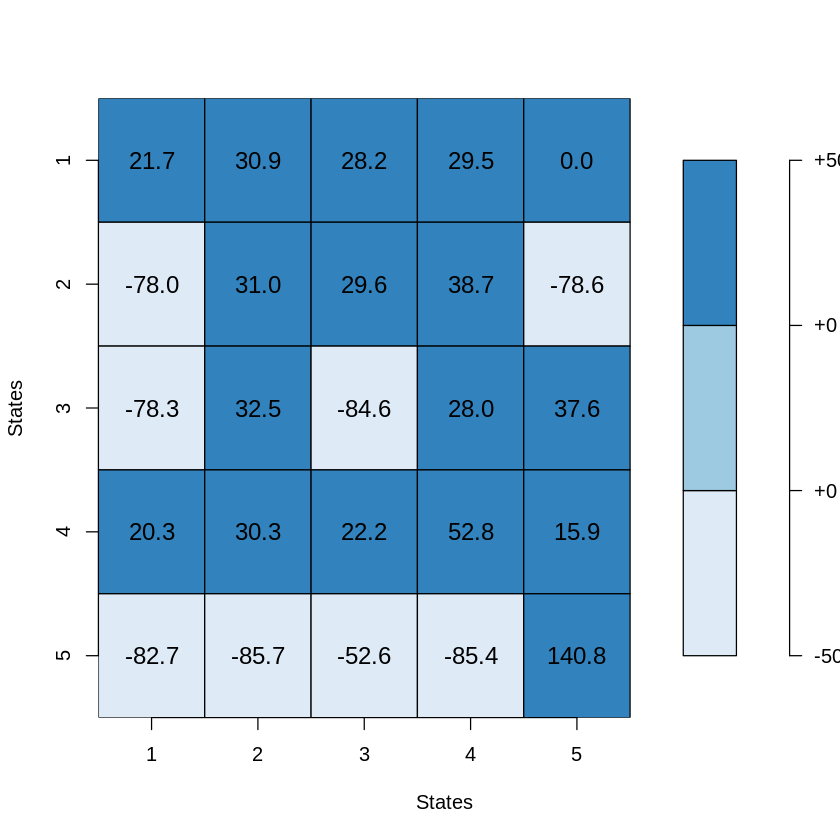



	Step no.:  13
		Current State:  6
		Reward CS:  10
		Possible next states:  1 7 11
		Next state:  11
		New Q-Value:  31.5

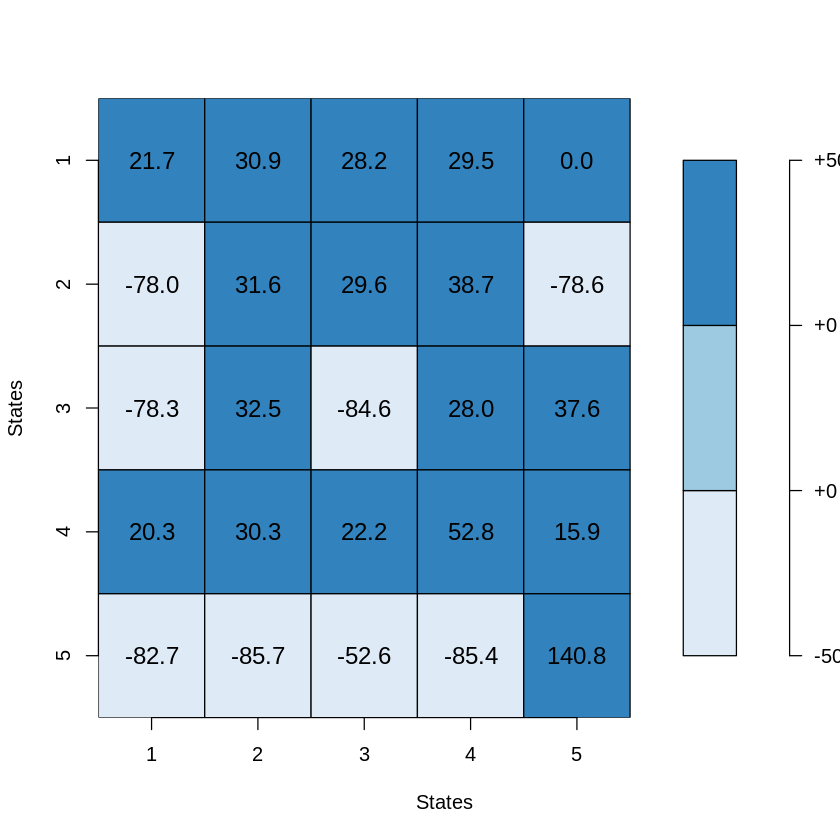



	Step no.:  14
		Current State:  11
		Reward CS:  10
		Possible next states:  6 12 16
		Next state:  16
		New Q-Value:  35.3

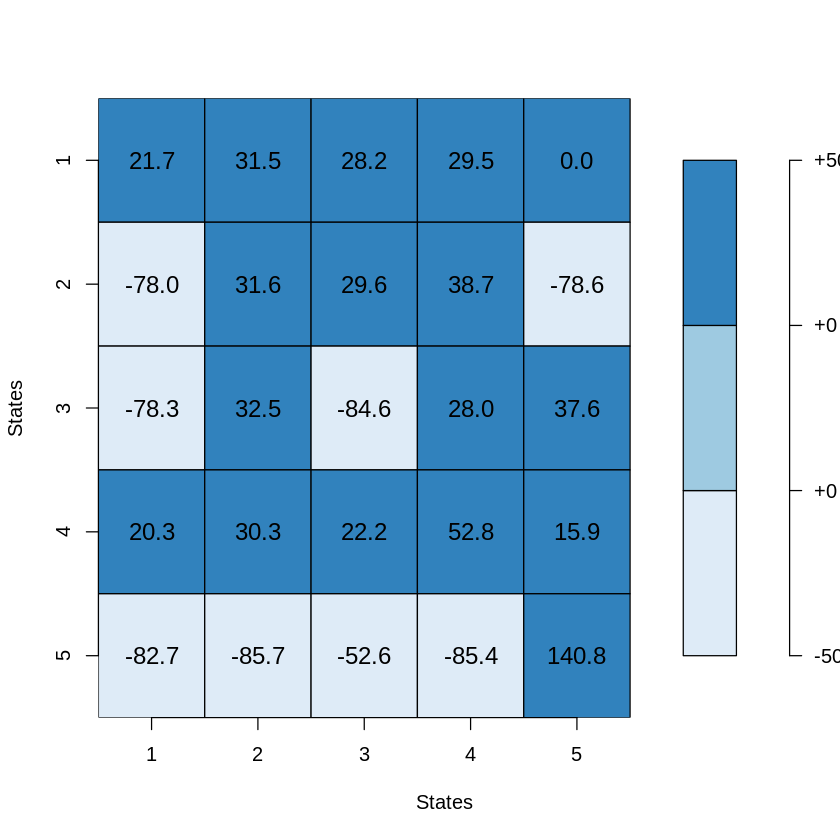



	Step no.:  15
		Current State:  16
		Reward CS:  10
		Possible next states:  11 17 21
		Next state:  21
		New Q-Value:  30.4

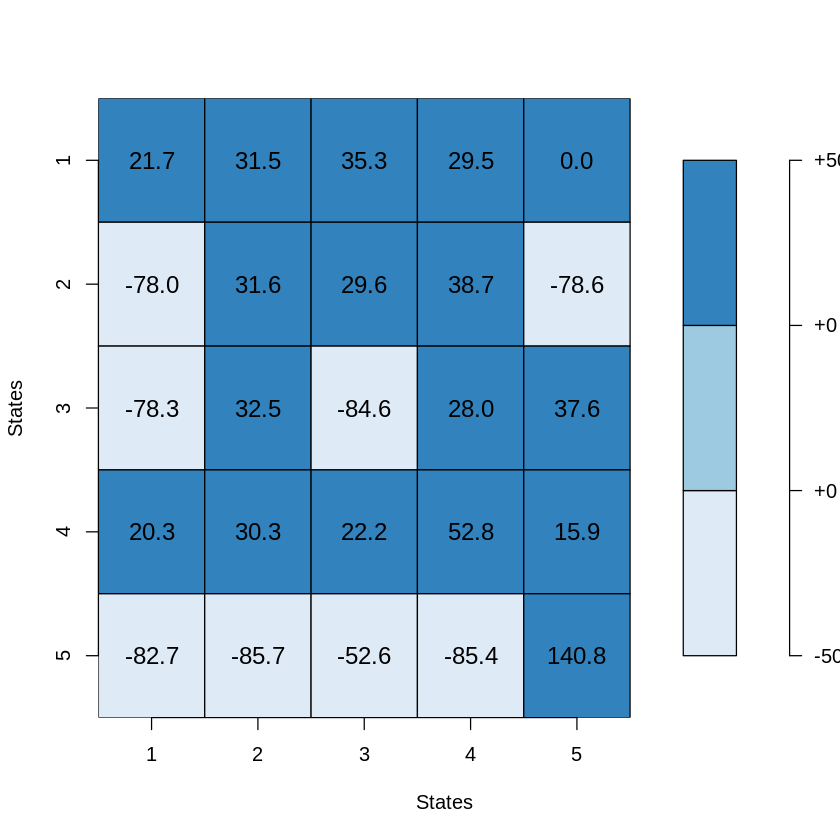



	Step no.:  16
		Current State:  21
		Reward CS:  -100
		Possible next states:  16 22
		Next state:  22
		New Q-Value:  -58.3

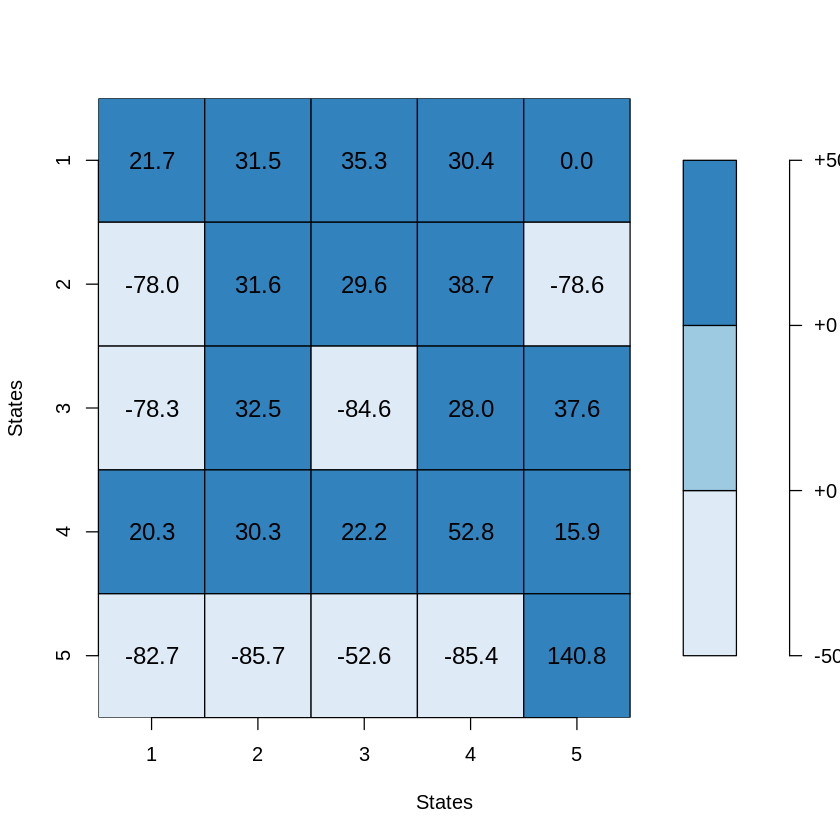



	Step no.:  17
		Current State:  22
		Reward CS:  -100
		Possible next states:  17 21 23
		Next state:  21
		New Q-Value:  -78.7

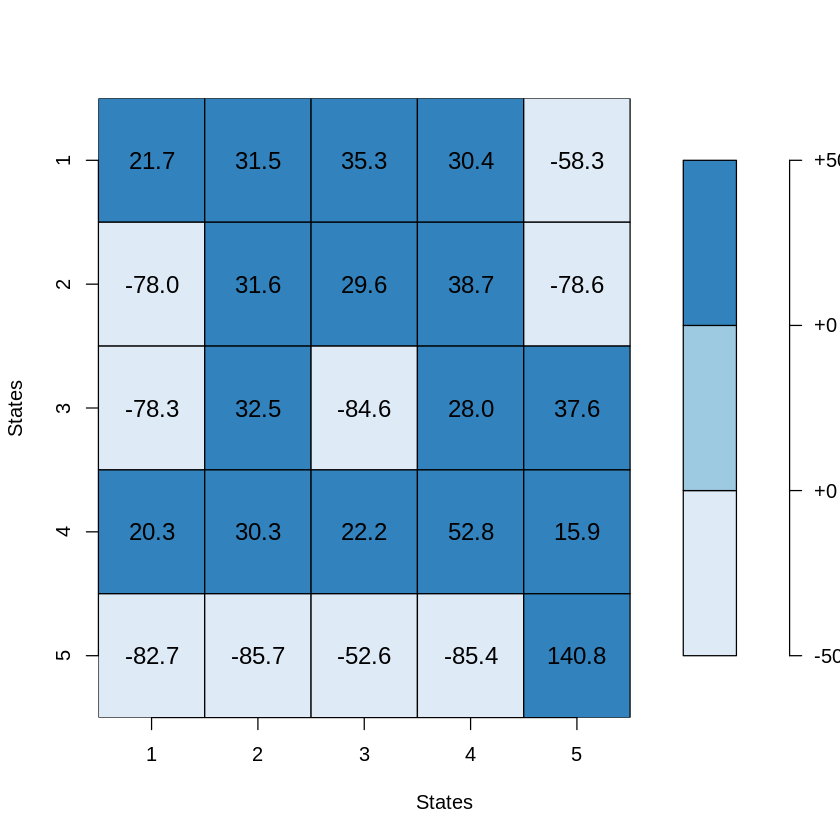



	Step no.:  18
		Current State:  21
		Reward CS:  -100
		Possible next states:  16 22
		Next state:  22
		New Q-Value:  -70

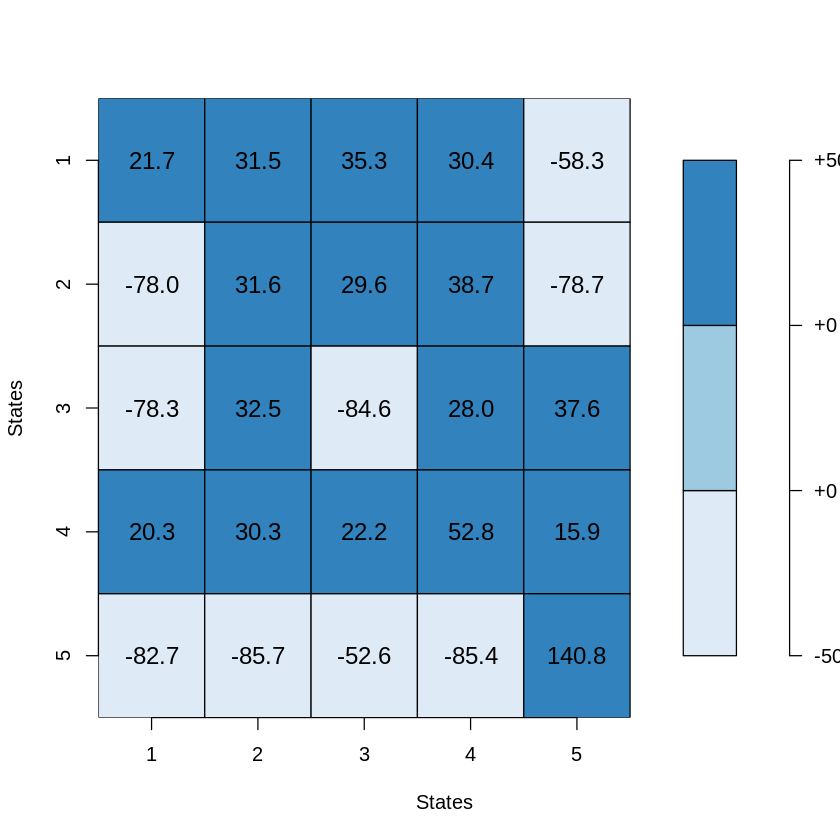



	Step no.:  19
		Current State:  22
		Reward CS:  -100
		Possible next states:  17 21 23
		Next state:  17
		New Q-Value:  -78.7

	Step no.:  20
		Current State:  17
		Reward CS:  10
		Possible next states:  12 16 18 22
		Next state:  16
		New Q-Value:  37.4

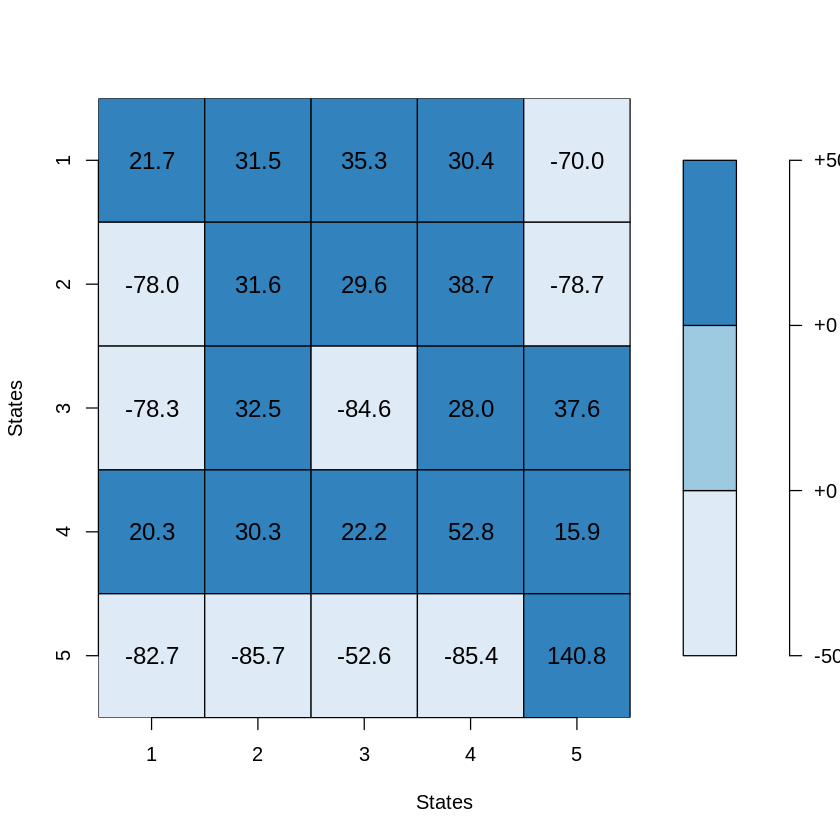



	Step no.:  21
		Current State:  16
		Reward CS:  10
		Possible next states:  11 17 21
		Next state:  11
		New Q-Value:  31.7

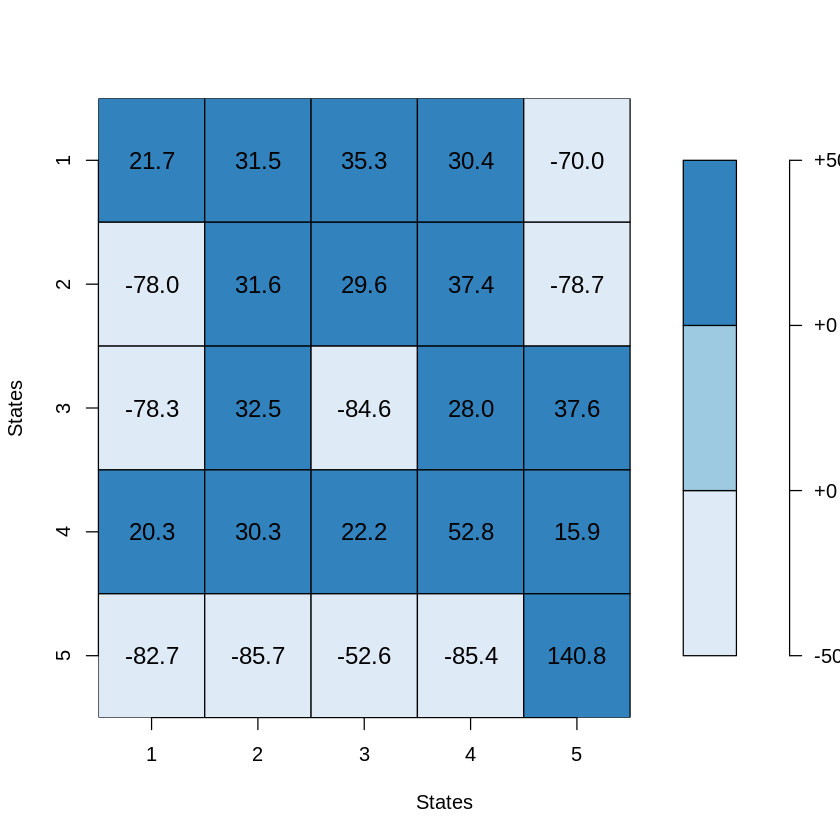


End Episode:  7
Start Episode:  8
	Current state:  24

	Step no.:  1
		Current State:  24
		Reward CS:  10
		Possible next states:  19 23 25
		Next state:  19
		New Q-Value:  26.9

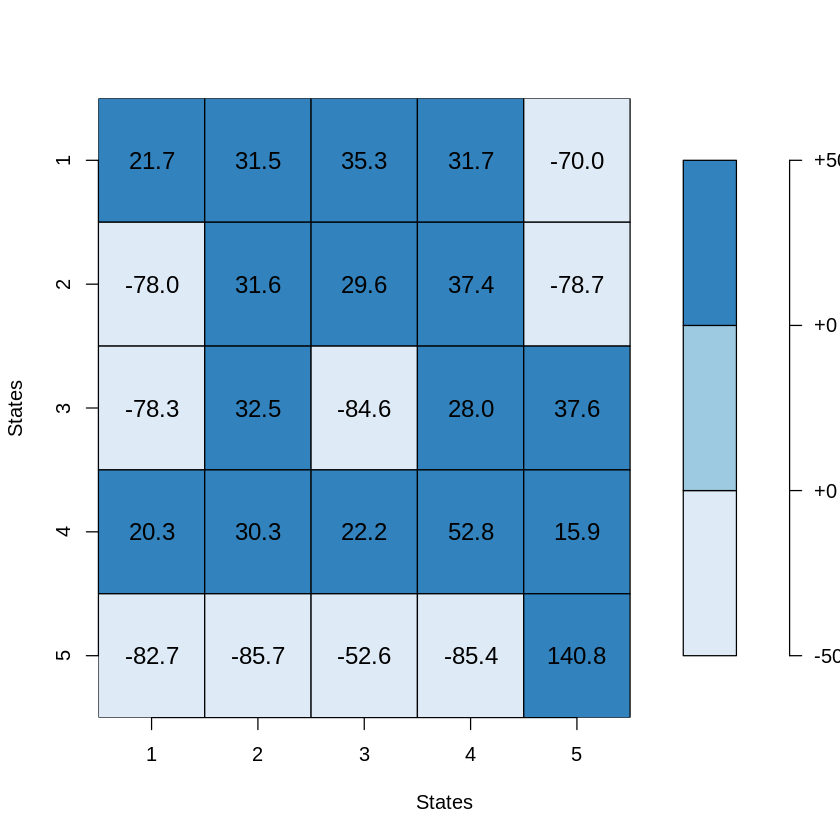



	Step no.:  2
		Current State:  19
		Reward CS:  10
		Possible next states:  14 18 20 24
		Next state:  14
		New Q-Value:  48.1

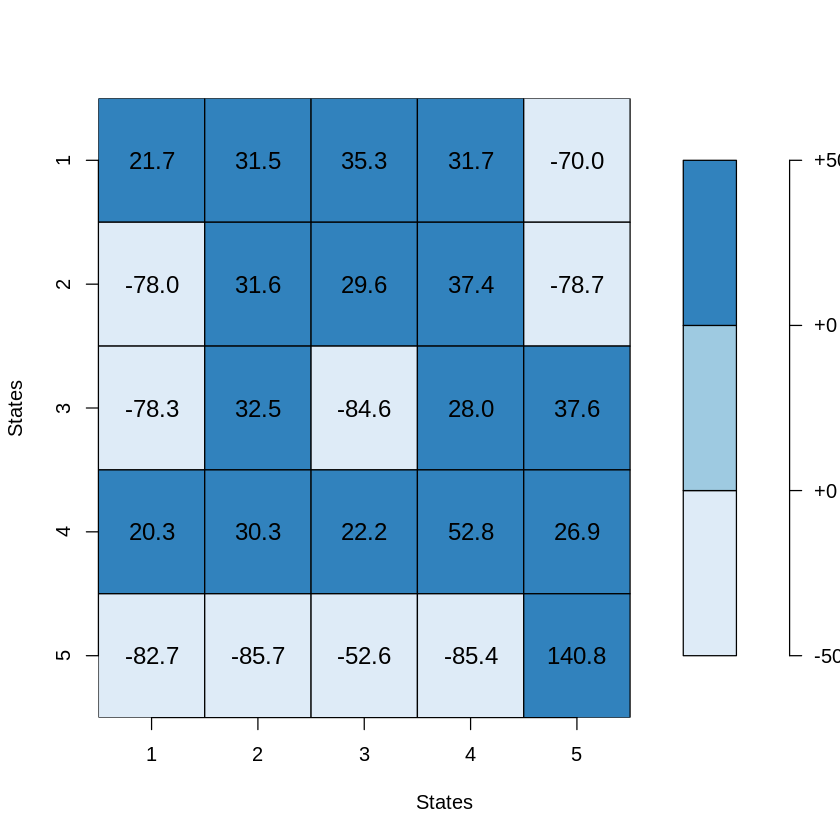



	Step no.:  3
		Current State:  14
		Reward CS:  10
		Possible next states:  9 13 15 19
		Next state:  15
		New Q-Value:  24.9

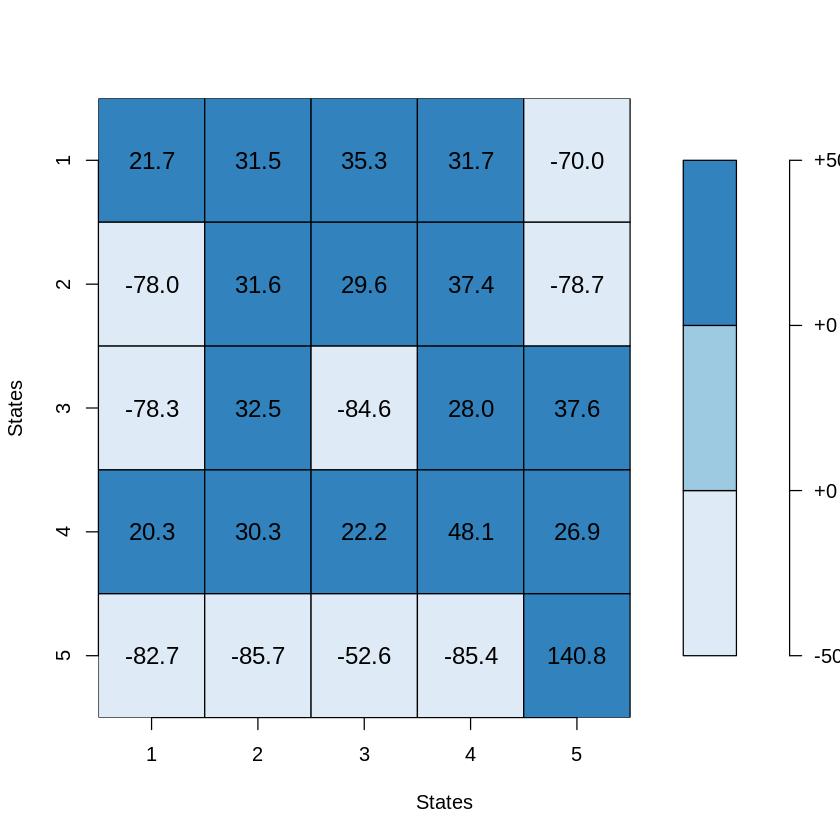



	Step no.:  4
		Current State:  15
		Reward CS:  -100
		Possible next states:  10 14 20
		Next state:  14
		New Q-Value:  -63.6

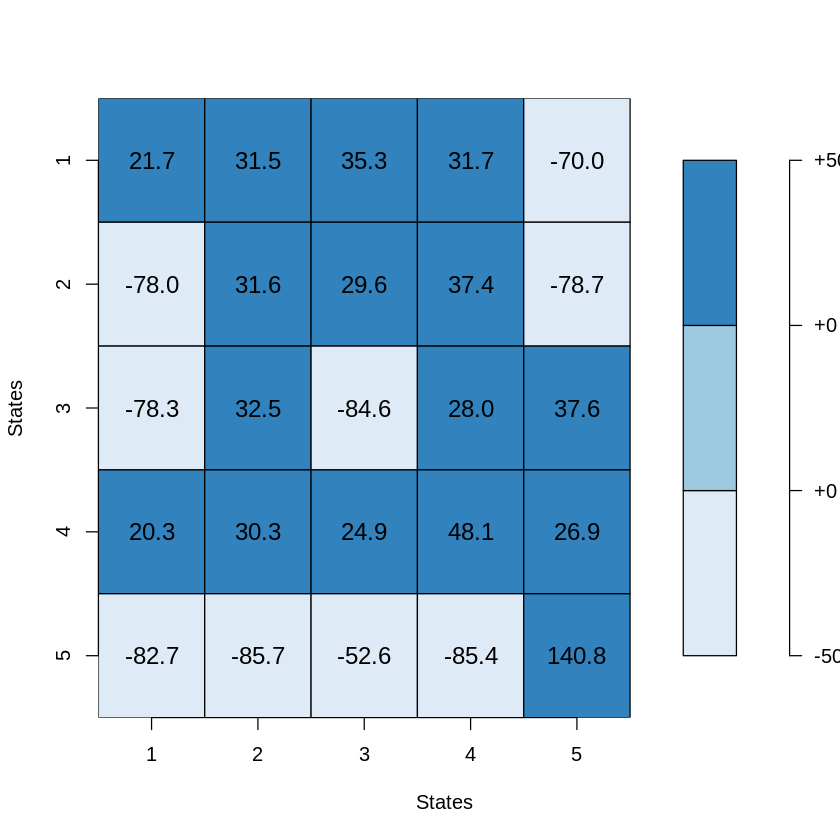



	Step no.:  5
		Current State:  14
		Reward CS:  10
		Possible next states:  9 13 15 19
		Next state:  15
		New Q-Value:  26.9

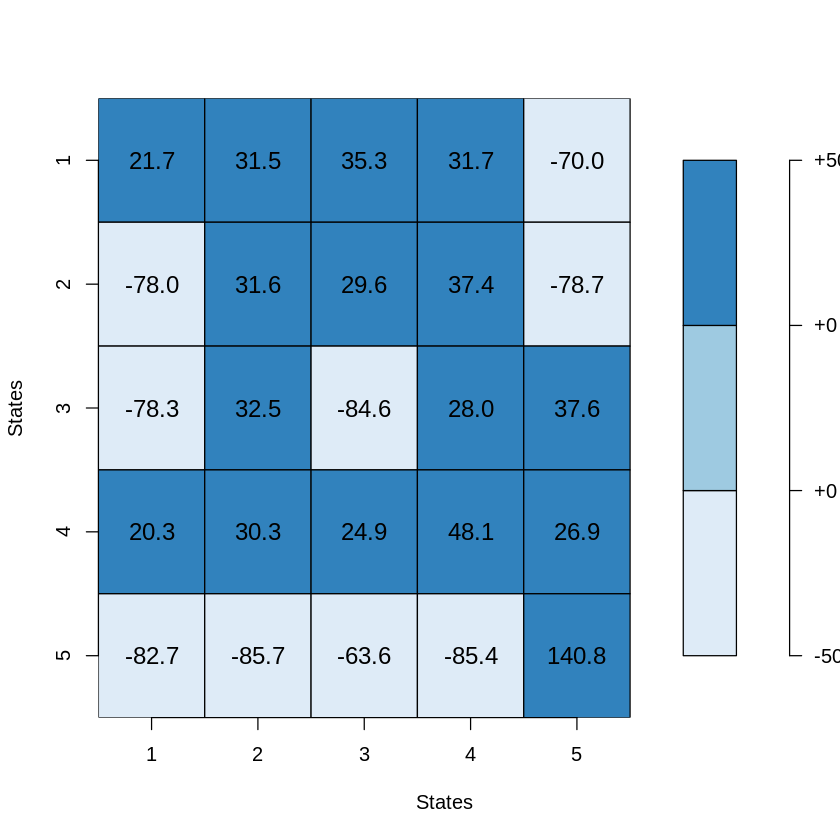



	Step no.:  6
		Current State:  15
		Reward CS:  -100
		Possible next states:  10 14 20
		Next state:  10
		New Q-Value:  -75.8

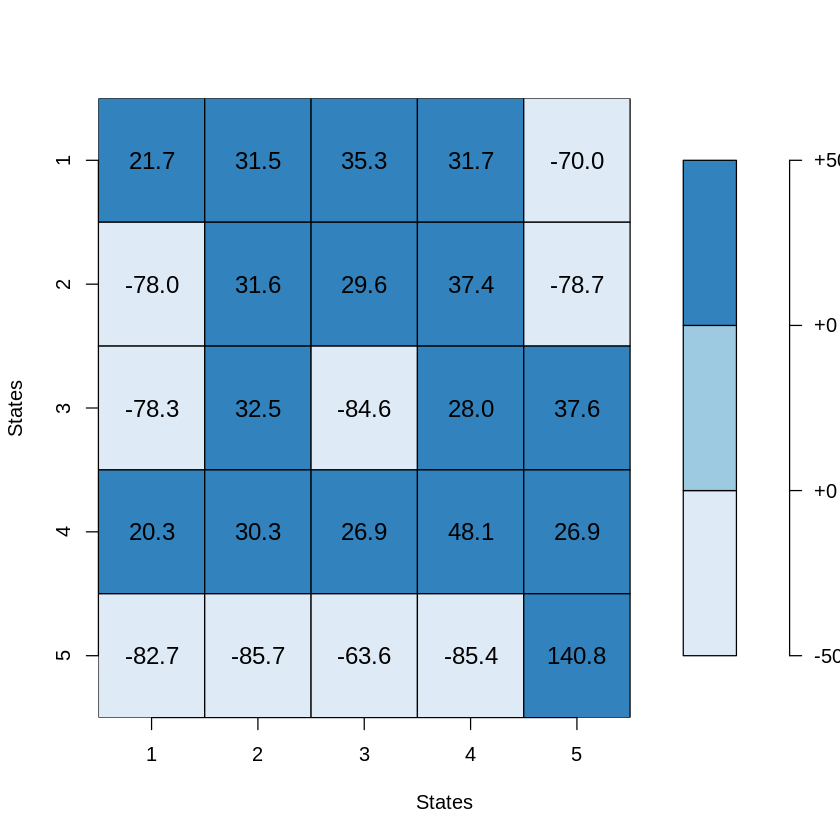



	Step no.:  7
		Current State:  10
		Reward CS:  -100
		Possible next states:  5 9 15
		Next state:  9
		New Q-Value:  -78.9

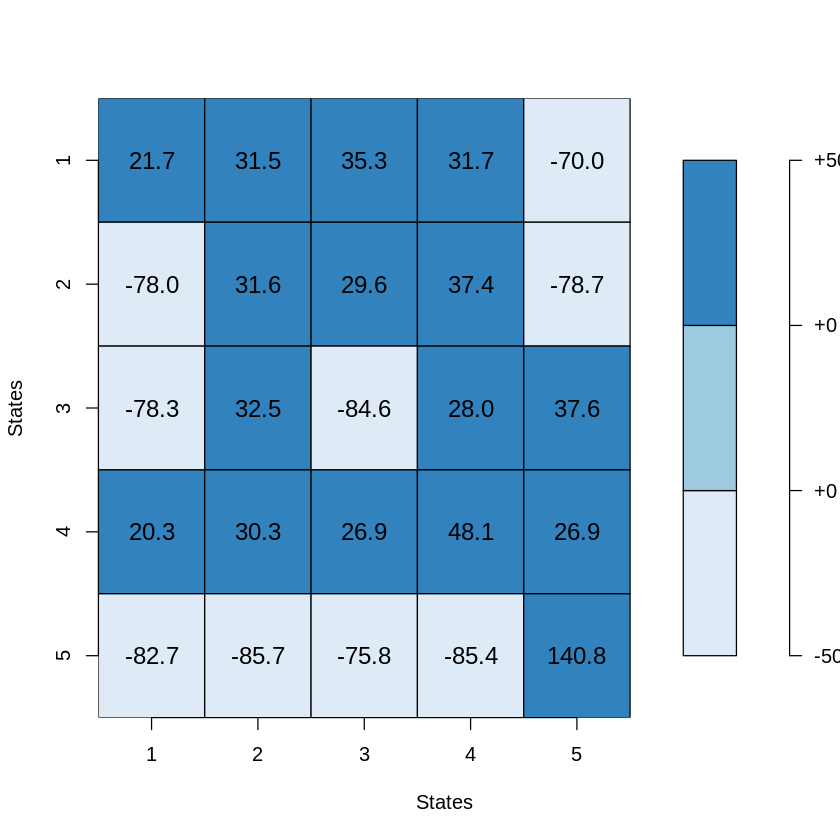



	Step no.:  8
		Current State:  9
		Reward CS:  10
		Possible next states:  4 8 10 14
		Next state:  8
		New Q-Value:  31.8

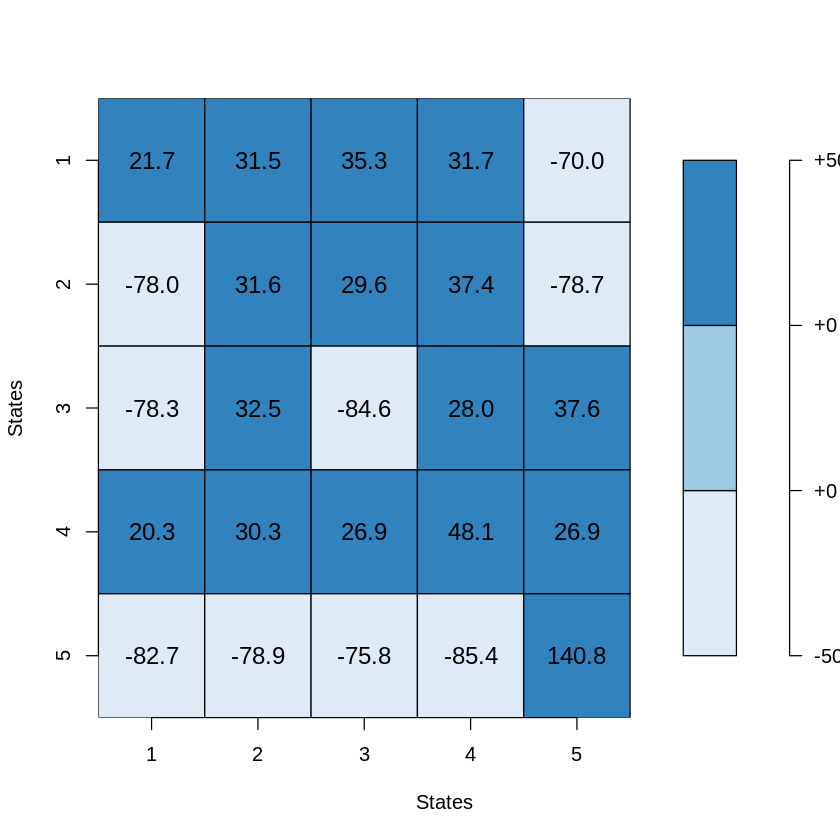



	Step no.:  9
		Current State:  8
		Reward CS:  10
		Possible next states:  3 7 9 13
		Next state:  13
		New Q-Value:  32.7

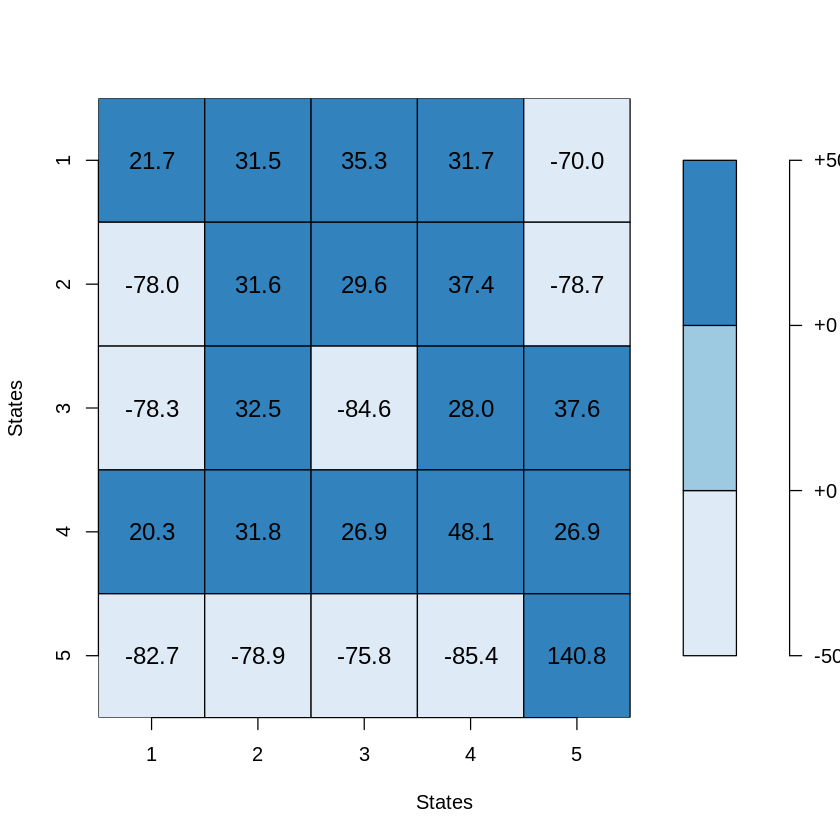



	Step no.:  10
		Current State:  13
		Reward CS:  -100
		Possible next states:  8 12 14 18
		Next state:  14
		New Q-Value:  -70

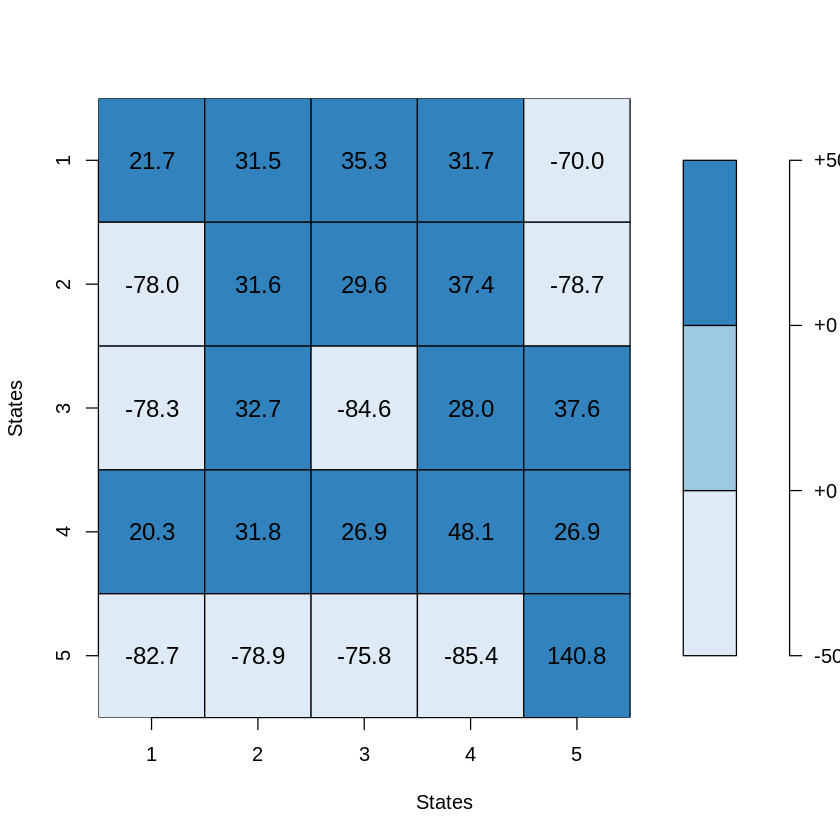



	Step no.:  11
		Current State:  14
		Reward CS:  10
		Possible next states:  9 13 15 19
		Next state:  9
		New Q-Value:  31.7

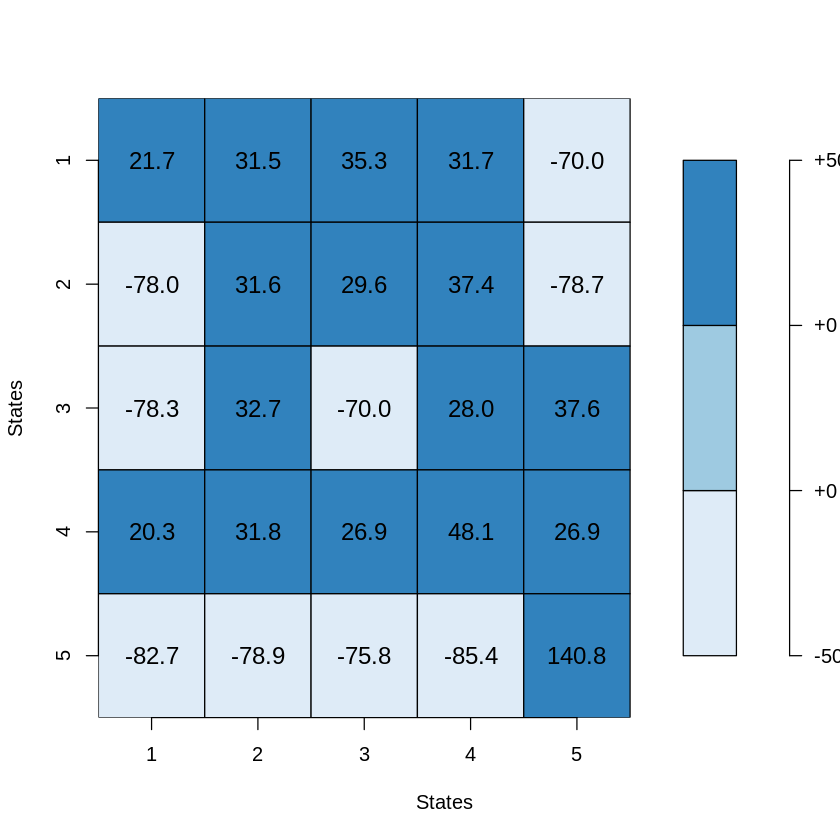



	Step no.:  12
		Current State:  9
		Reward CS:  10
		Possible next states:  4 8 10 14
		Next state:  14
		New Q-Value:  41.3

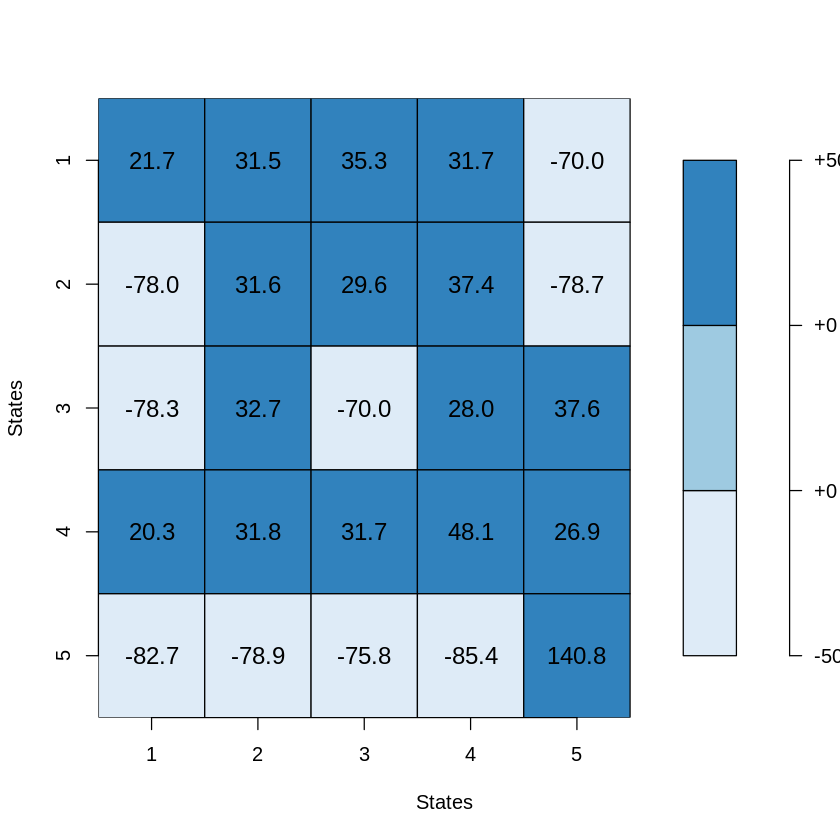



	Step no.:  13
		Current State:  14
		Reward CS:  10
		Possible next states:  9 13 15 19
		Next state:  15
		New Q-Value:  32.1

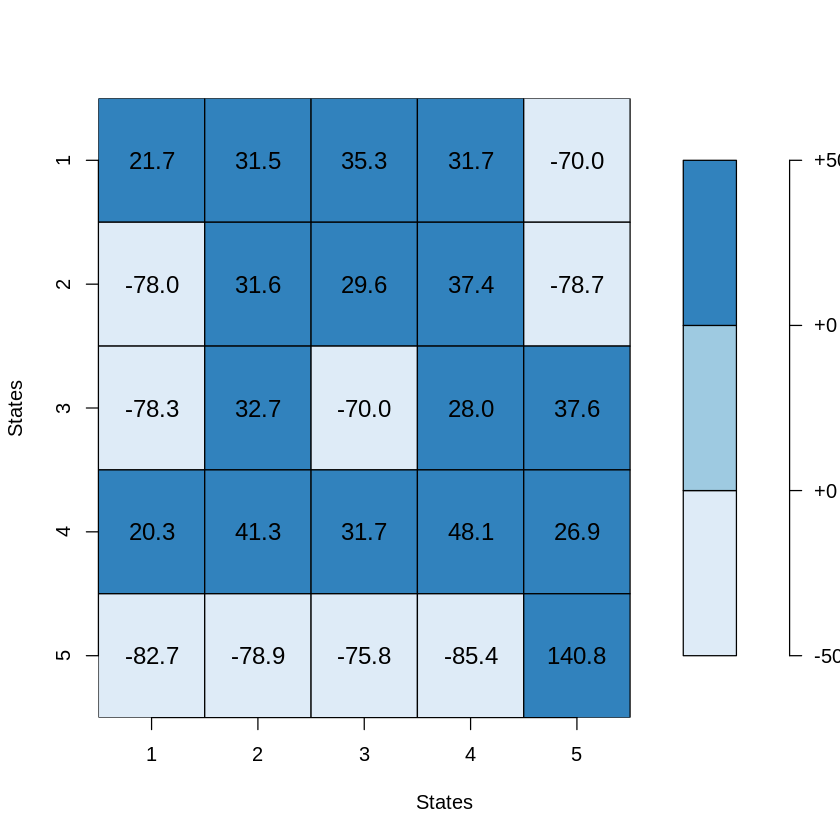



	Step no.:  14
		Current State:  15
		Reward CS:  -100
		Possible next states:  10 14 20
		Next state:  10
		New Q-Value:  -72

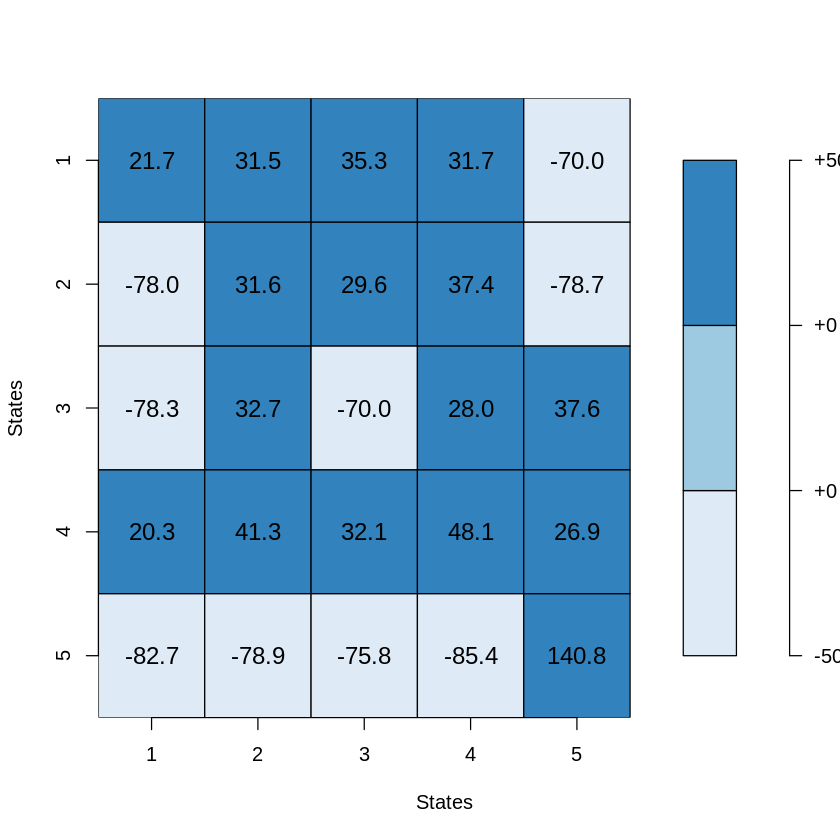



	Step no.:  15
		Current State:  10
		Reward CS:  -100
		Possible next states:  5 9 15
		Next state:  5
		New Q-Value:  -84.4

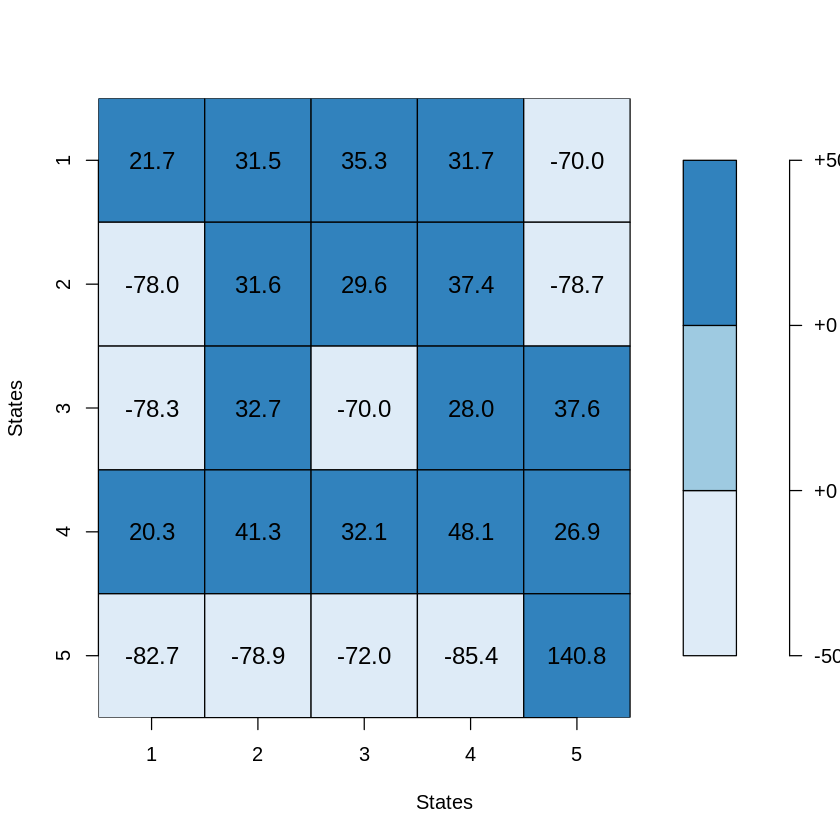



	Step no.:  16
		Current State:  5
		Reward CS:  -100
		Possible next states:  4 10
		Next state:  4
		New Q-Value:  -73.4

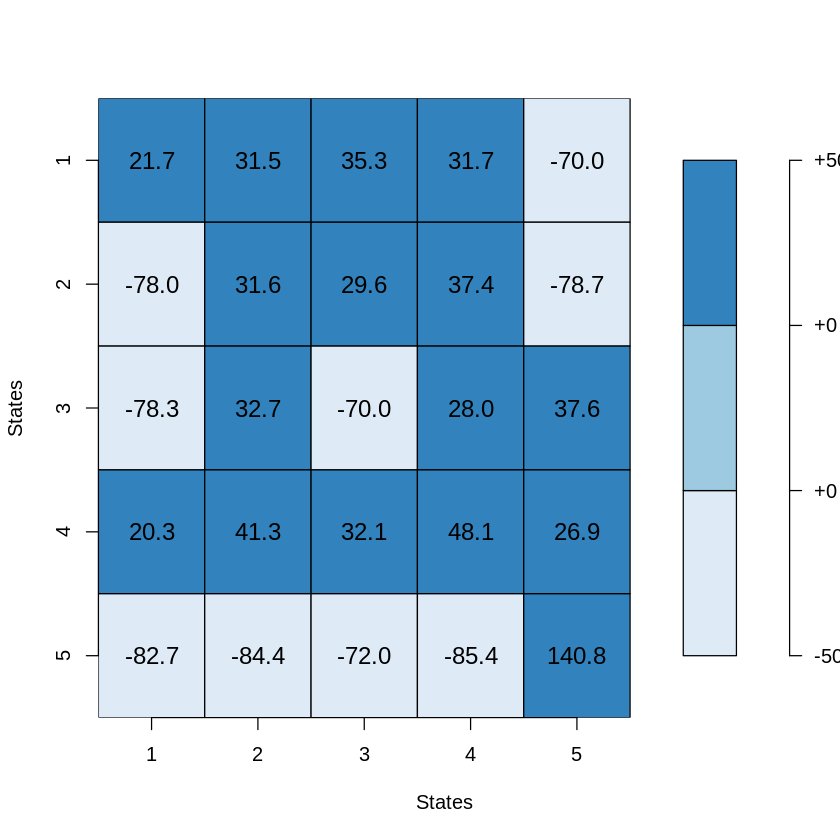



	Step no.:  17
		Current State:  4
		Reward CS:  0
		Possible next states:  3 5 9
		Next state:  9
		New Q-Value:  22.4

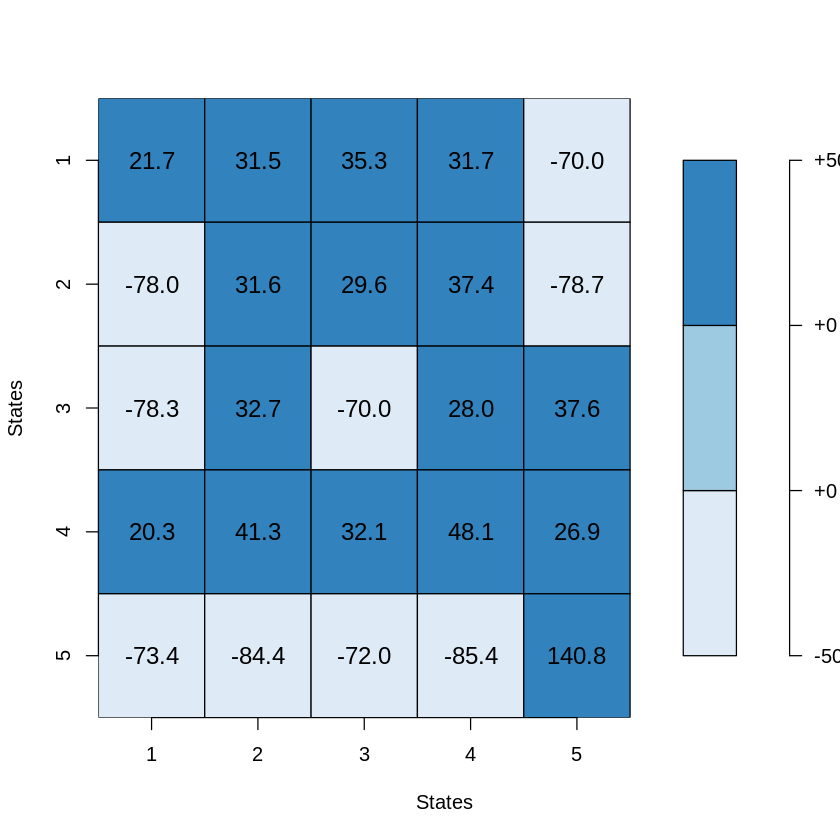



	Step no.:  18
		Current State:  9
		Reward CS:  10
		Possible next states:  4 8 10 14
		Next state:  14
		New Q-Value:  43.2

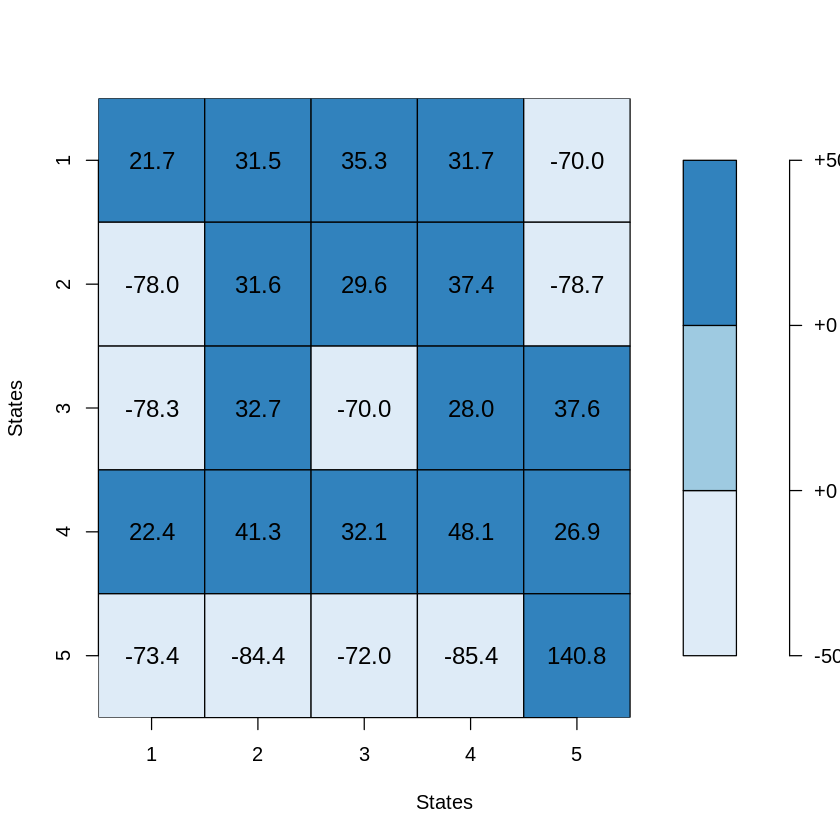



	Step no.:  19
		Current State:  14
		Reward CS:  10
		Possible next states:  9 13 15 19
		Next state:  15
		New Q-Value:  32.4

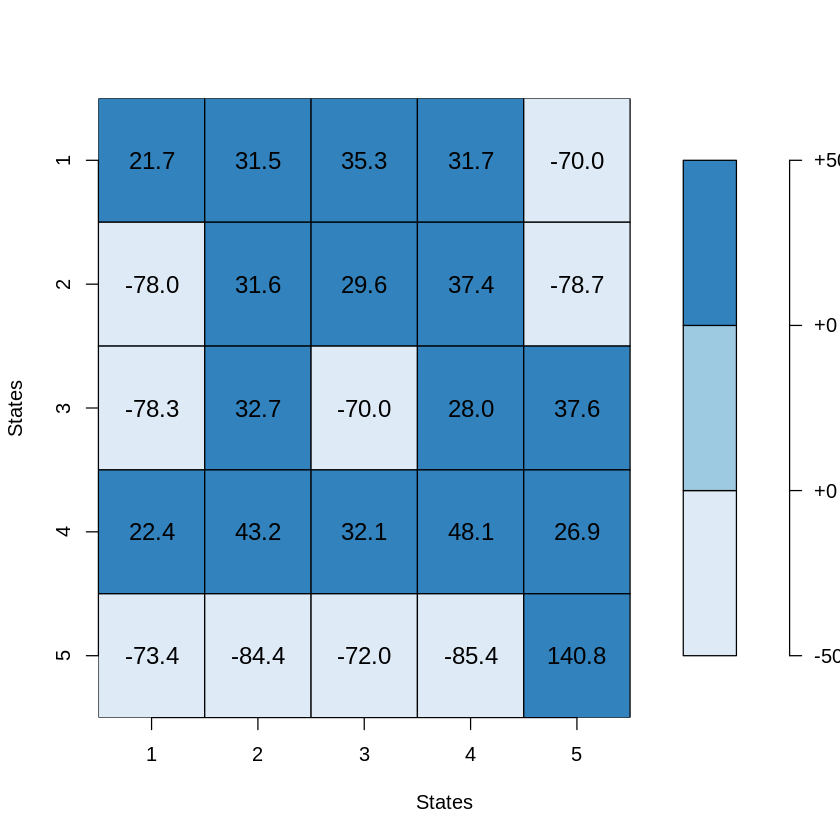



	Step no.:  20
		Current State:  15
		Reward CS:  -100
		Possible next states:  10 14 20
		Next state:  20
		New Q-Value:  -15.6

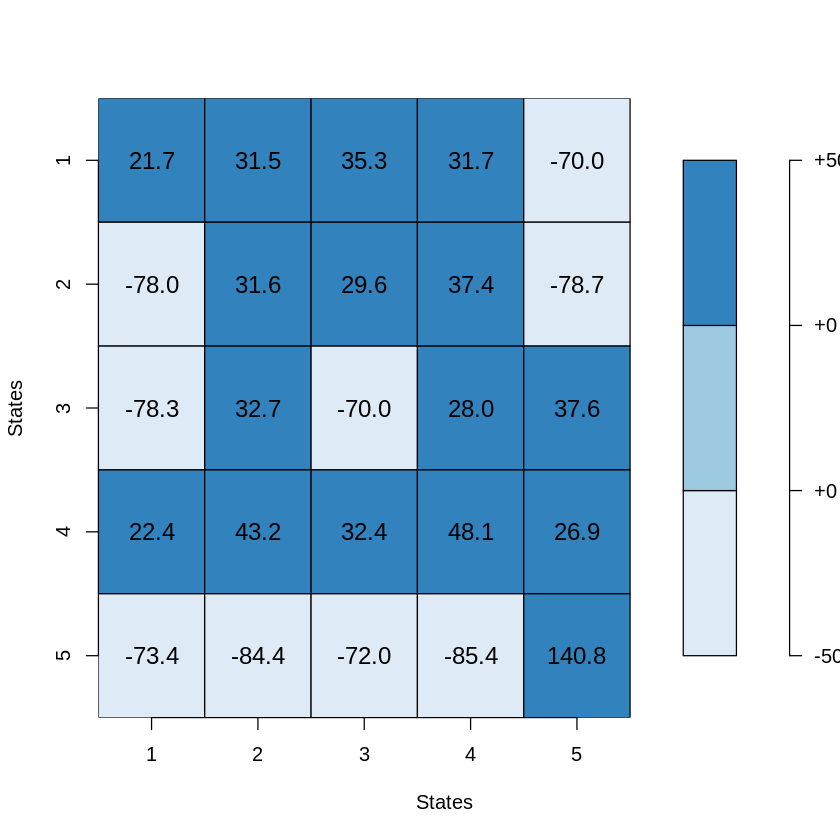



	Step no.:  21
		Current State:  20
		Reward CS:  -100
		Possible next states:  15 19 25
		Next state:  15
		New Q-Value:  -78.9

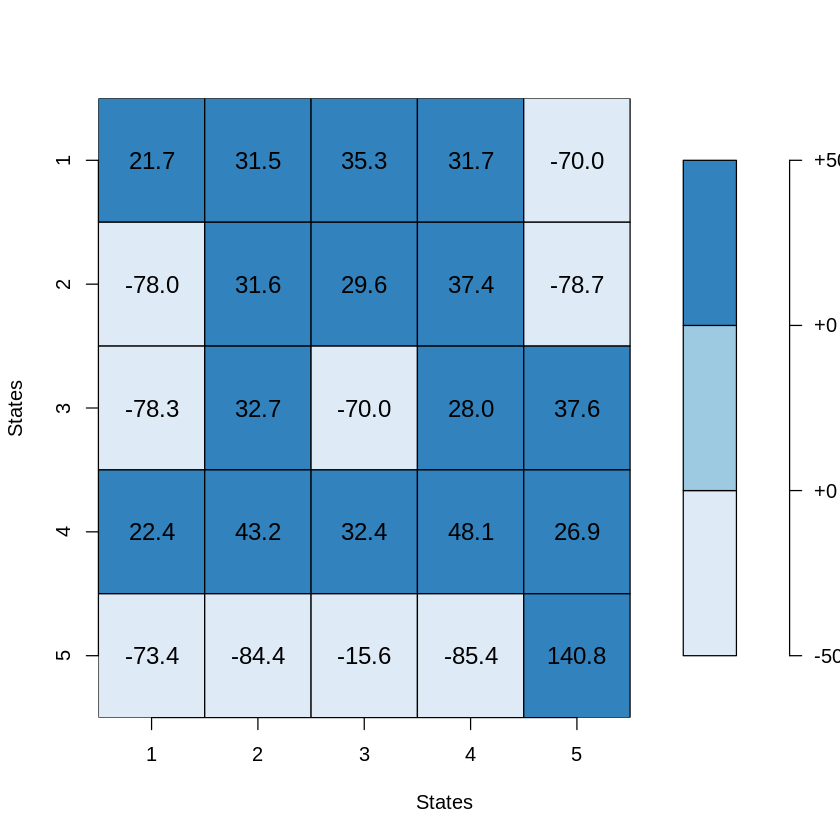


End Episode:  8
Start Episode:  9
	Current state:  9

	Step no.:  1
		Current State:  9
		Reward CS:  10
		Possible next states:  4 8 10 14
		Next state:  10
		New Q-Value:  40.8

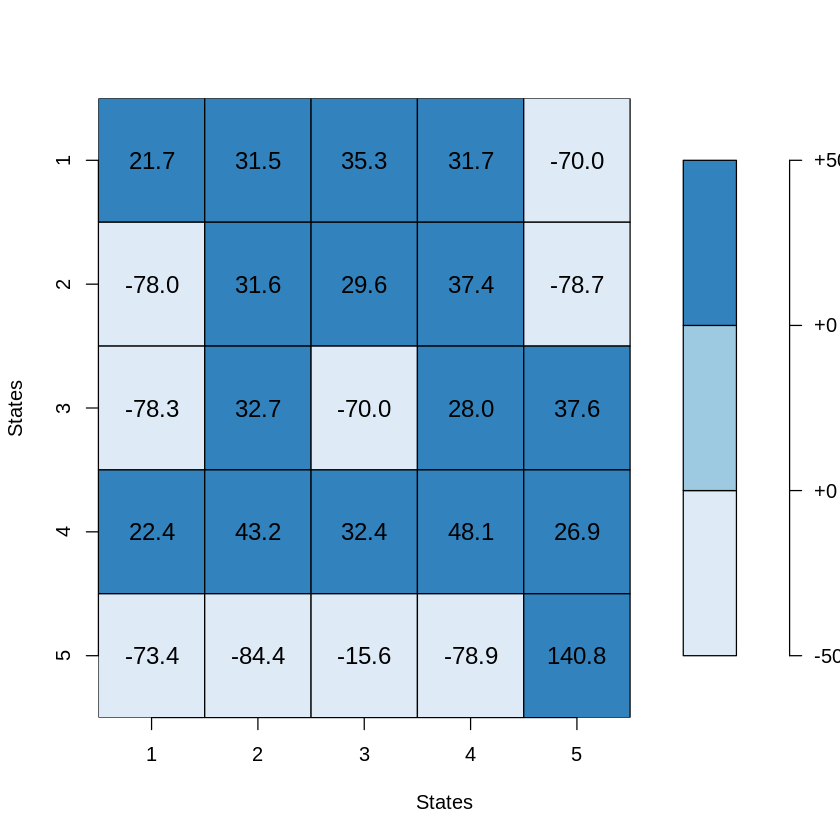



	Step no.:  2
		Current State:  10
		Reward CS:  -100
		Possible next states:  5 9 15
		Next state:  15
		New Q-Value:  -78.7

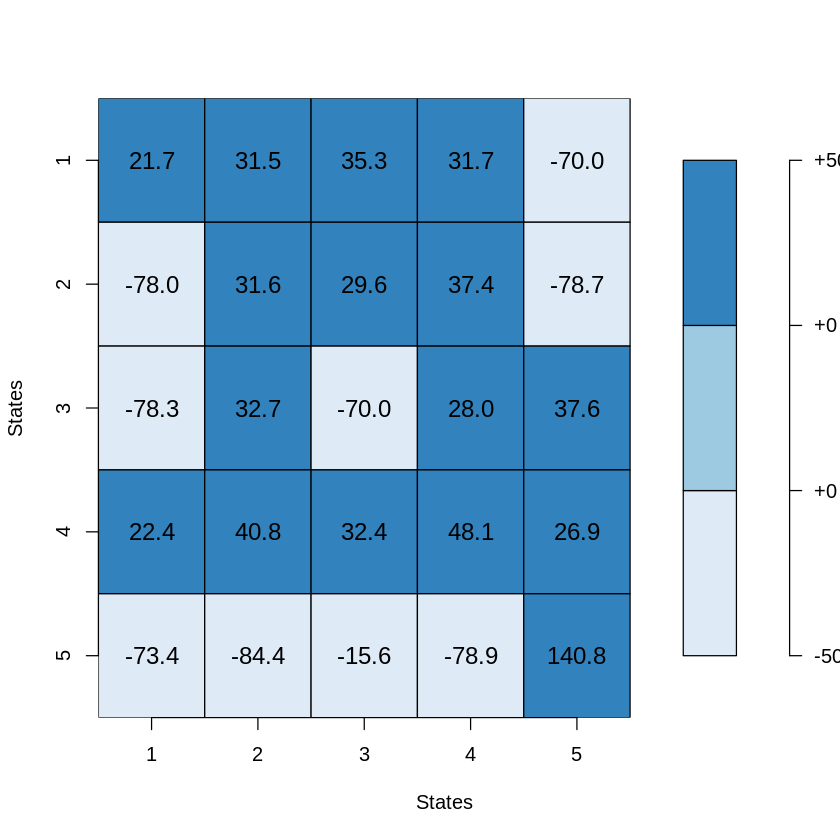



	Step no.:  3
		Current State:  15
		Reward CS:  -100
		Possible next states:  10 14 20
		Next state:  20
		New Q-Value:  -4.3

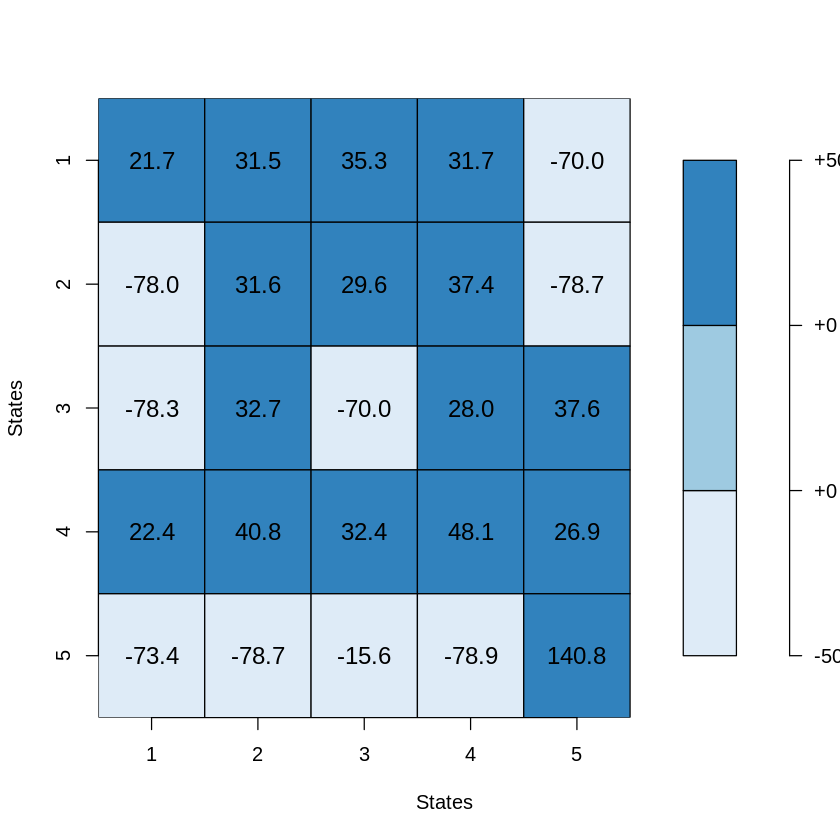



	Step no.:  4
		Current State:  20
		Reward CS:  -100
		Possible next states:  15 19 25
		Next state:  25
		New Q-Value:  -80.7

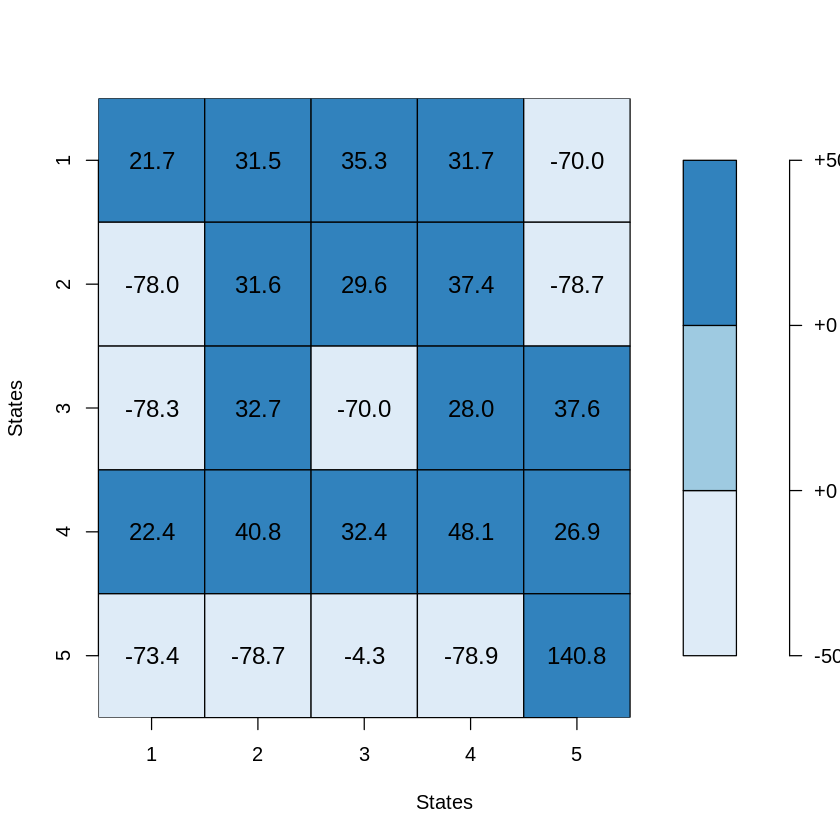



	Step no.:  5
		Current State:  25
		Reward CS:  100
		Possible next states:  20 24
		Next state:  20
		New Q-Value:  187

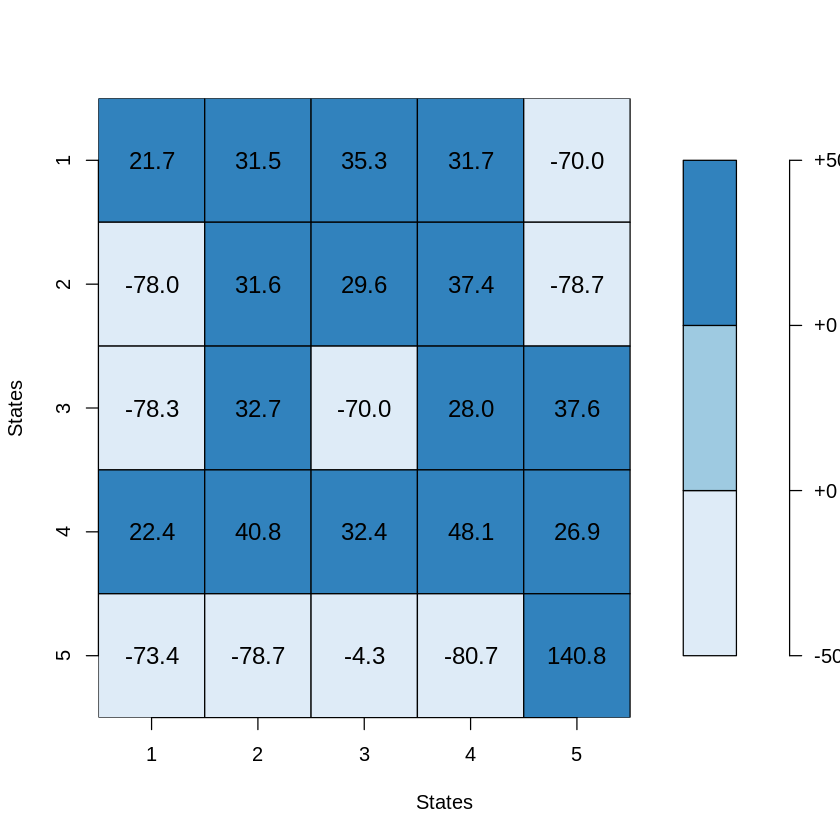


End Episode:  9
Start Episode:  10
	Current state:  24

	Step no.:  1
		Current State:  24
		Reward CS:  10
		Possible next states:  19 23 25
		Next state:  25
		New Q-Value:  28.4

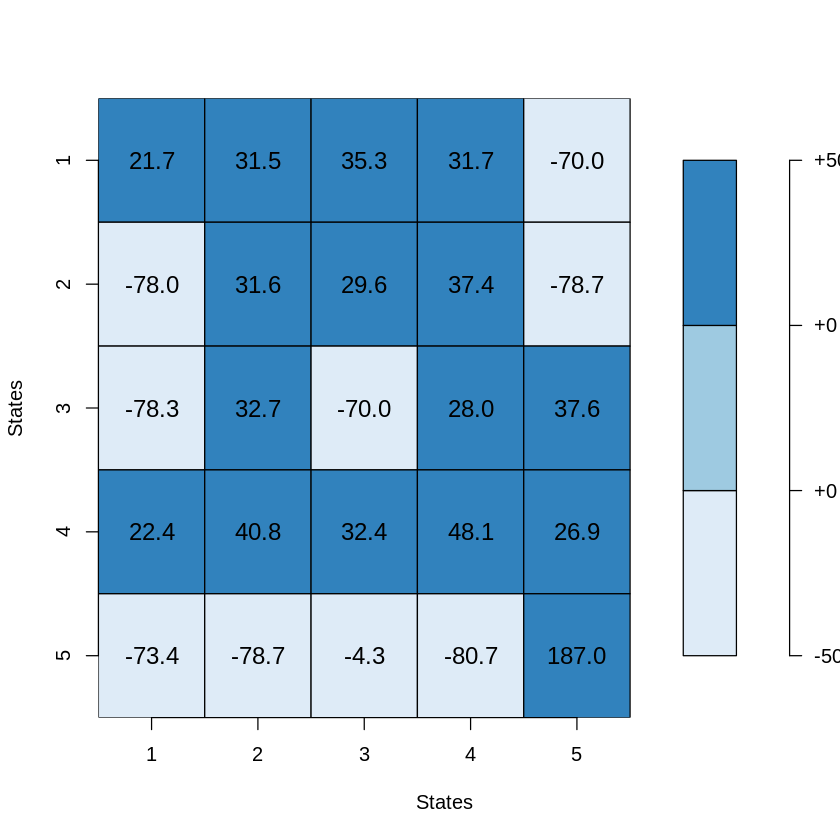



	Step no.:  2
		Current State:  25
		Reward CS:  100
		Possible next states:  20 24
		Next state:  24
		New Q-Value:  222.1

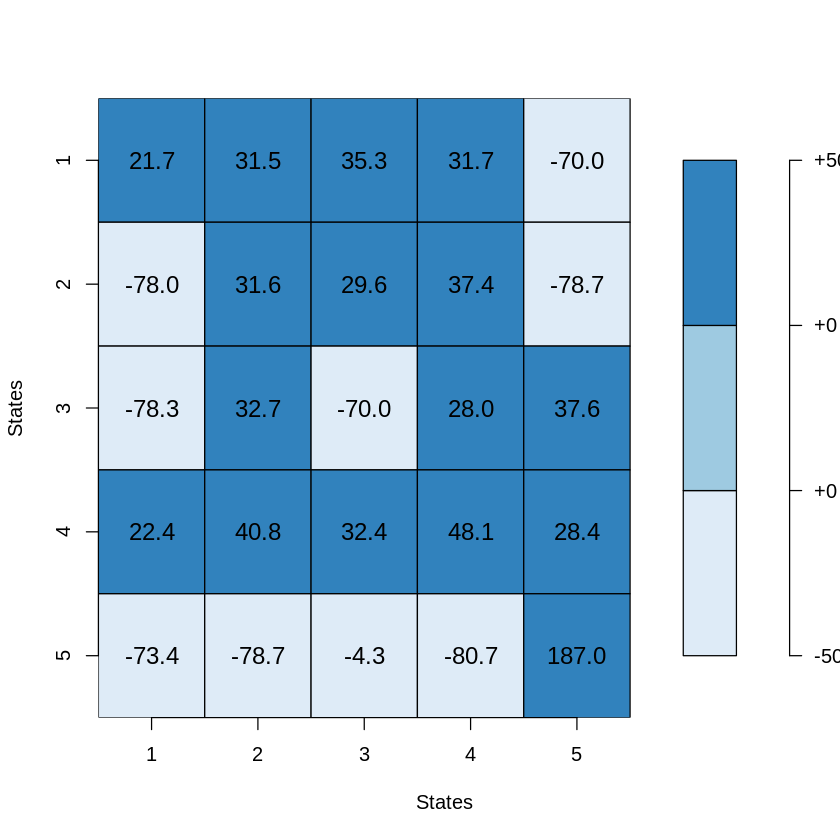


End Episode:  10

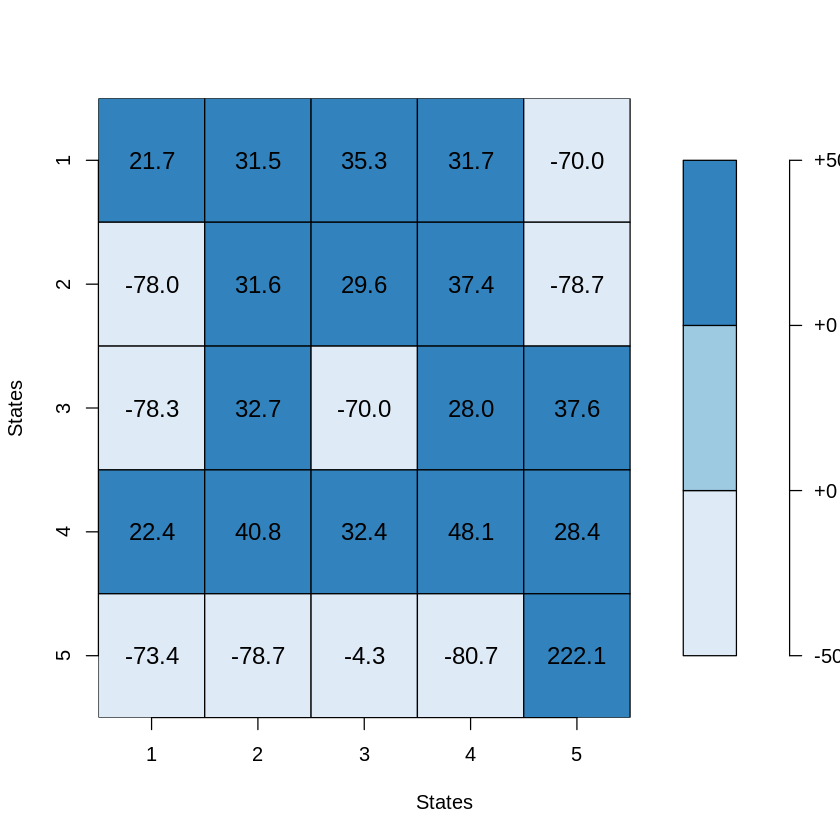

In [ ]:
N <- 10 # No. of Episode

alpha <- 0.8 # Learning Rate

gamma <- 0.7 # Discount Factor


for (i in 1:N) {

 current_episode <- i;

 cat("\nStart Episode: ", current_episode)



 ## choose next state from possible actions at current state

 cs <- sample(state_seq$state, 1)

 cat("\n\tCurrent state: ", cs)

 step_num <- 1;

 while (T) {

 cat("\n\n\tStep no.: ", step_num)

 cat("\n\t\tCurrent State: ", cs)

 reward <- rewards[cs]

 if(reward == 0 | is.na(reward) | length(reward) == 0 ){

 reward <- 0

 }

 cat("\n\t\tReward CS: ", reward)

 next.states <- getNextStates(cs);

 cat("\n\t\tPossible next states: ", next.states)



 # next.states

 # If we have any states present, else choose randomly.

 if (length(next.states) == 1) {

 ns <- next.states

 } else {

 ns <- sample(next.states, 1)

 }

 cat("\n\t\tNext state: ", ns)



 # Update Q values for next states.

 Q[cs] <- round(Q[cs] + alpha * (reward +

 gamma * max(Q[getNextStates(ns)])-Q[cs]),1);

cat("\n\t\tNew Q-Value: ", Q[cs])
 plot_matrix(Q,1)

 Sys.sleep(0.2)

 if (cs == goal | step_num > 20) {

 break;

 }

 cs <- ns;

 step_num <- step_num + 1;

 }

 cat("\nEnd Episode: ", current_episode)

}

6. Final Q table

Once the Q matrix is updated, Agent may choose max rewarding next states and reach the goal with the correct and shortest path.

Also, we can observe that our Goal state 25 has the maximum Q value.